**Attrition:** Attrition happens when people leave a company, either by retiring or resigning, and they aren't replaced, so the workforce gets smaller.

**Objective:**
* When a company reduces its staff because of attrition, it's often called a hiring freeze. This means they're not hiring new people to replace the ones who left. It's seen as a less disruptive way to cut costs compared to laying off employees.
* In this notebook our aim will be to analyze the dataset completely wrt each and feature and find the reason behind the employee attrition
* And what the top factors which leads to the employee attrition?


<br/>
<font color = "brown" size = 5> Data Dictionary </font>

1. EmployeeNumber: Unique identifier for each employee.
2. Attrition: Binary variable indicating whether the employee has left the company (Yes/No).
3. Age: Age of the employee.
3. BusinessTravel: Frequency of business travel (e.g., 'Travel Frequently', 'Travel Rarely', 'Non-Travel').
4. DailyRate: Daily rate of pay for the employee.
5. Department: Department in which the employee works (e.g., 'Sales', 'Research & Development', 'Human Resources').
6. DistanceFromHome: Distance from the employee's home to the workplace.
7. Education: Level of education (e.g., 1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor').
8. EducationField: Field of education (e.g., 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources').
9. EmployeeCount: Number of employees (constant value, possibly 1 in your dataset).
10. EnvironmentSatisfaction: Employee's satisfaction with the work environment (1 to 4 scale).
11. Gender: Gender of the employee.
12. HourlyRate: Hourly rate of pay for the employee.
13. JobInvolvement: Level of job involvement (1 to 4 scale).
14. JobLevel: Job level or position in the company hierarchy.
15. JobRole: Role or position in the company (e.g., 'Sales Executive', 'Research Scientist', 'Human Resources').
16. JobSatisfaction: Employee's satisfaction with their job (1 to 4 scale).
17. MaritalStatus: Marital status of the employee.
18. MonthlyIncome: Monthly income of the employee.
19. MonthlyRate: Monthly rate of pay for the employee.
20. NumCompaniesWorked: Number of companies the employee has worked for.
21. Over18: Whether the employee is over 18 years old (constant value, possibly 'Yes' in your dataset).
22. OverTime: Whether the employee works overtime (Yes/No).
23. PercentSalaryHike: Percentage increase in salary.
24. PerformanceRating: Employee performance rating (1 to 4 scale).
25. RelationshipSatisfaction: Employee's satisfaction with their relationships at work (1 to 4 scale).
26. StandardHours: Standard number of working hours.
27. StockOptionLevel: Level of stock options granted to the employee.
28. TotalWorkingYears: Total number of years the employee has been working.
29. TrainingTimesLastYear: Number of times the employee was trained last year.
30. WorkLifeBalance: Employee's perceived balance between work and personal life (1 to 4 scale).
31. YearsAtCompany: Number of years the employee has been with the company.
32. YearsInCurrentRole: Number of years the employee has been in their current role.
33. YearsSinceLastPromotion: Number of years since the employee's last promotion.
34. YearsWithCurrManager: Number of years the employee has been with their current manager.

<font color = "brown" size = 5>Importing Libraries</font>

In [1]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Reading the input data file
data = pd.read_csv("C:\\Users\\hp\\Downloads\\HR_Employee_Attrition.csv") 
data

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0                  1       Yes   41      Travel_Rarely       1102   
1                  2        No   49  Travel_Frequently        279   
2                  3       Yes   37      Travel_Rarely       1373   
3                  4        No   33  Travel_Frequently       1392   
4                  5        No   27      Travel_Rarely        591   
...              ...       ...  ...                ...        ...   
2935            2936        No   36  Travel_Frequently        884   
2936            2937        No   39      Travel_Rarely        613   
2937            2938        No   27      Travel_Rarely        155   
2938            2939        No   49  Travel_Frequently       1023   
2939            2940        No   34      Travel_Rarely        628   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales                 1          2  Life Sciences   
1     Research & Development                 8          1  Life Sciences   
2     Research & Development                 2          2          Other   
3     Research & Development                 3          4  Life Sciences   
4     Research & Development                 2          1        Medical   
...                      ...               ...        ...            ...   
2935  Research & Development                23          2        Medical   
2936  Research & Development                 6          1        Medical   
2937  Research & Development                 4          3  Life Sciences   
2938                   Sales                 2          3        Medical   
2939  Research & Development                 8          3        Medical   

      EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0                 1  ...                         1            80   
1                 1  ...                         4            80   
2                 1  ...                         2            80   
3                 1  ...                         3            80   
4                 1  ...                         4            80   
...             ...  ...                       ...           ...   
2935              1  ...                         3            80   
2936              1  ...                         1            80   
2937              1  ...                         2            80   
2938              1  ...                         4            80   
2939              1  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
2935                 1                 17                      3   
2936                 1                  9                      5   
2937                 1                  6                      0   
2938                 0                 17                      3   
2939                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
2935               3               5                  2   
2936               3               7                  7   
2937               3               6                  2   
2938               2               9    

In [3]:
# let us make another copy of data
df = data.copy()
df.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
pd.set_option('Display.max_column', None)
df.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0              1                        2  Female          94               3   
1              1                        3    Male          61               2   
2              1                        4    Male          92               2   
3              1                        4  Female          56               3   
4              1                        1    Male          40               3   

   JobLevel                JobRole  JobSatisfaction MaritalStatus  \
0         2        Sales Executive                4        Single   
1         2     Research Scientist                2       Married   
2         1  Laboratory Technician                3        Single   
3         1     Research Scientist                3       Married   
4         1  Laboratory Technician                2       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
0           5993        19479                   8      Y      Yes   
1           5130        24907                   1      Y       No   
2           2090         2396                   6      Y      Yes   
3           2909        23159                   1      Y      Yes   
4           3468        16632                   9      Y       No   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

<font color = "blue" size = 4>Checking the numbers of rows and columns</font>

In [5]:
#checking the shape of data
df.shape

(2940, 35)

<font color = "blue" size = 4>Lets have a look at column names</font>

In [6]:
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<font color = "blue" size = 4>Checking column type and missing values</font>

In [7]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

<font color = "black" size = 3>Observations</font>



*   There are 2940 rows and 35 columns
*   There are nine independent object variable, twenty six numerical independent variable.


<font color = "blue" size = 4>Check Duplicates</font>

In [8]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    2940
dtype: int64
2940


<font color = "blue" size = 4>Lets check the null values</font>

In [9]:
df.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<font color = "black" size = 4>Observation</font>
 We can see that there are no null values in this data set

<Axes: xlabel='BusinessTravel', ylabel='count'>

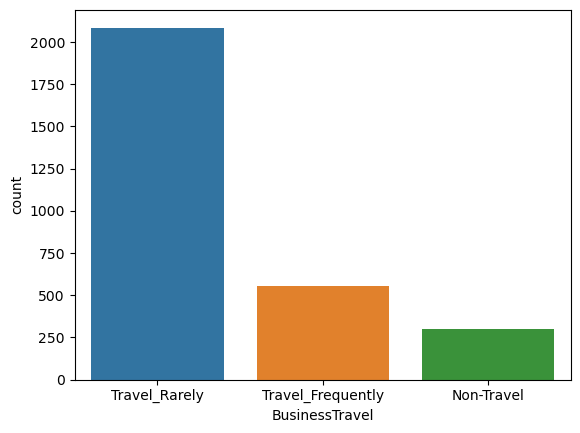

In [21]:
sns.countplot(x= 'BusinessTravel', data= df)

<Axes: xlabel='Gender', ylabel='count'>

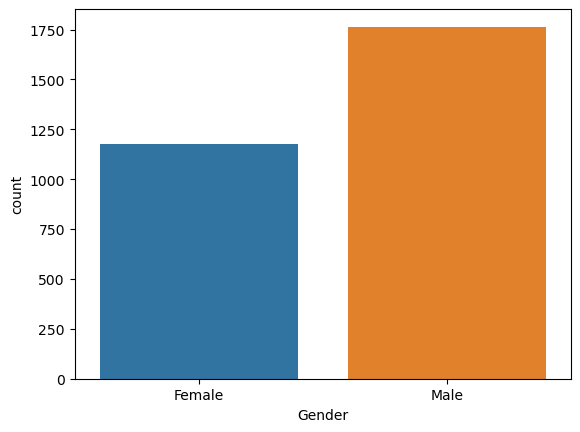

In [22]:
sns.countplot(x= 'Gender', data= df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

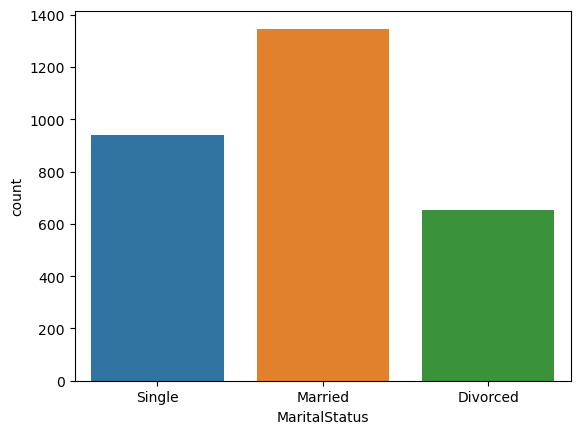

In [23]:
sns.countplot(x= 'MaritalStatus', data= df)

<font color = "blue" size = 4>Checking the unique values</font>

In [10]:
# Check the unique values in each column of the dataframe.
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<br/>
<font color = "brown" size = 5>Statistical Summary</font>

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

count unique                     top  freq  \
EmployeeNumber           2940.000    NaN                     NaN   NaN   
Attrition                    2940      2                      No  2466   
Age                      2940.000    NaN                     NaN   NaN   
BusinessTravel               2940      3           Travel_Rarely  2086   
DailyRate                2940.000    NaN                     NaN   NaN   
Department                   2940      3  Research & Development  1922   
DistanceFromHome         2940.000    NaN                     NaN   NaN   
Education                2940.000    NaN                     NaN   NaN   
EducationField               2940      6           Life Sciences  1212   
EmployeeCount            2940.000    NaN                     NaN   NaN   
EnvironmentSatisfaction  2940.000    NaN                     NaN   NaN   
Gender                       2940      2                    Male  1764   
HourlyRate               2940.000    NaN                     NaN   NaN   
JobInvolvement           2940.000    NaN                     NaN   NaN   
JobLevel                 2940.000    NaN                     NaN   NaN   
JobRole                      2940      9         Sales Executive   652   
JobSatisfaction          2940.000    NaN                     NaN   NaN   
MaritalStatus                2940      3                 Married  1346   
MonthlyIncome            2940.000    NaN                     NaN   NaN   
MonthlyRate              2940.000    NaN                     NaN   NaN   
NumCompaniesWorked       2940.000    NaN                     NaN   NaN   
Over18                       2940      1                       Y  2940   
OverTime                     2940      2                      No  2108   
PercentSalaryHike        2940.000    NaN                     NaN   NaN   
PerformanceRating        2940.000    NaN                     NaN   NaN   
RelationshipSatisfaction 2940.000    NaN                     NaN   NaN   
StandardHours            2940.000    NaN                     NaN   NaN   
StockOptionLevel         2940.000    NaN                     NaN   NaN   
TotalWorkingYears        2940.000    NaN                     NaN   NaN   
TrainingTimesLastYear    2940.000    NaN                     NaN   NaN   
WorkLifeBalance          2940.000    NaN                     NaN   NaN   
YearsAtCompany           2940.000    NaN                     NaN   NaN   
YearsInCurrentRole       2940.000    NaN                     NaN   NaN   
YearsSinceLastPromotion  2940.000    NaN                     NaN   NaN   
YearsWithCurrManager     2940.000    NaN                     NaN   NaN   

                              mean      std      min      25%       50%  \
EmployeeNumber            1470.500  848.849    1.000  735.750  1470.500   
Attrition                      NaN      NaN      NaN      NaN       NaN   
Age                         36.924    9.134   18.000   30.000    36.000   
BusinessTravel                 NaN      NaN      NaN      NaN       NaN   
DailyRate                  802.486  403.440  102.000  465.000   802.000   
Department                     NaN      NaN      NaN      NaN       NaN   
DistanceFromHome             9.193    8.105    1.000    2.000     7.000   
Education                    2.913    1.024    1.000    2.000     3.000   
EducationField                 NaN      NaN      NaN      NaN       NaN   
EmployeeCount                1.000    0.000    1.000    1.000     1.000   
EnvironmentSatisfaction      2.722    1.093    1.000    2.000     3.000   
Gender                         NaN      NaN      NaN      NaN       NaN   
HourlyRate                  65.891   20.326   30.000   48.000    66.000   
JobInvolvement               2.730    0.711    1.000    2.000     3.000   
JobLevel                     2.064    1.107    1.000    1.000     2.000   
JobRole                        NaN      NaN      NaN      NaN       NaN   
JobSatisfaction              2.729    1.103    1.000    2.000     3.000   
MaritalStatus

<font size =3> Insights: </font>
 
 **Numerical Columns:**

-  **EmployeeNumber:** This column represents unique employee numbers, with a mean of 1470.5 and a standard deviation of 848.849.
- **Age:** The average age of employees is approximately 36.92 years, with a standard deviation of 9.134.
- **DailyRate:** Average daily rate is around 802.49 with a standard deviation of 403.44.
- **DistanceFromHome:** The average distance from home is approximately 9.19 miles with a standard deviation of 8.105.
- **Education:** The average education level is approximately 2.91 with a standard deviation of 1.024.
- **EmployeeCount:** All values are 1.0, which suggests it may not be a very informative column.
- **EnvironmentSatisfaction:** Average satisfaction with the work environment is approximately 2.72 with a standard deviation of 1.093.
- **HourlyRate:** Average hourly rate is about 65.89 with a standard deviation of 20.33.
- **JobInvolvement:** Average job involvement score is approximately 2.73 with a standard deviation of 0.711.
- **JobLevel:** The average job level is around 2.06 with a standard deviation of 1.107.
- **JobSatisfaction:** Average job satisfaction rating is approximately 2.73 with a standard deviation of 1.103.
- **MonthlyIncome:** The average monthly income is approximately 6502.93 with a standard deviation of 4707.156.
- **MonthlyRate:** Average monthly rate is around 14313.10 with a standard deviation of 7116.575.
- **NumCompaniesWorked:** On average, employees have worked in around 2.69 companies with a standard deviation of 2.498.
- **PercentSalaryHike:** Average percent salary hike is approximately 15.21% with a standard deviation of 3.659.
- **PerformanceRating:** Average performance rating is approximately 3.15 with a standard deviation of 0.361.
- **RelationshipSatisfaction:** Average relationship satisfaction rating is approximately 2.71 with a standard deviation of 1.081.
- **StandardHours:** All values are 80, indicating standard hours.
- **StockOptionLevel:** Average stock option level is approximately 0.794 with a standard deviation of 0.852.
- **TotalWorkingYears:** The average total working years is approximately 11.28 with a standard deviation of 7.779.
- **TrainingTimesLastYear:** On average, employees had training around 2.80 times last year with a standard deviation of 1.289.
- **WorkLifeBalance:** Average work-life balance rating is approximately 2.76 with a standard deviation of 0.706.
- **YearsAtCompany:** Average years at the company is approximately 7.01 with a standard deviation of 6.125.
- **YearsInCurrentRole:** Average years in the current role is approximately 4.23 with a standard deviation of 3.623.
- **YearsSinceLastPromotion:** Average years since last promotion is approximately 2.19 with a standard deviation of 3.222.
- **YearsWithCurrManager:** Average years with the current manager is approximately 4.12 with a standard deviation of 3.568.

**Categorical Columns:**

- **Attrition:** Contains two unique values: 'Yes' and 'No'.
- **BusinessTravel:** Contains three unique values: 'Travel_Rarely', 'Travel_Frequently', and 'Non-Travel'.
- **Department:** Contains three unique values: 'Research & Development', 'Sales', and 'Human Resources'.
- **EducationField:** Contains six unique values indicating different fields of education.
- **Gender:** Contains two unique values: 'Male' and 'Female'.
- **JobRole:** Contains nine unique job roles.
- **MaritalStatus:** Contains three unique marital statuses: 'Married', 'Single', and 'Divorced'.
- **Over18:** Contains only one unique value 'Y'.
- **OverTime:** Contains two unique values: 'Yes' and 'No'.

<font color = "blue" size = 4>Lets Explore the Target Variable</font>

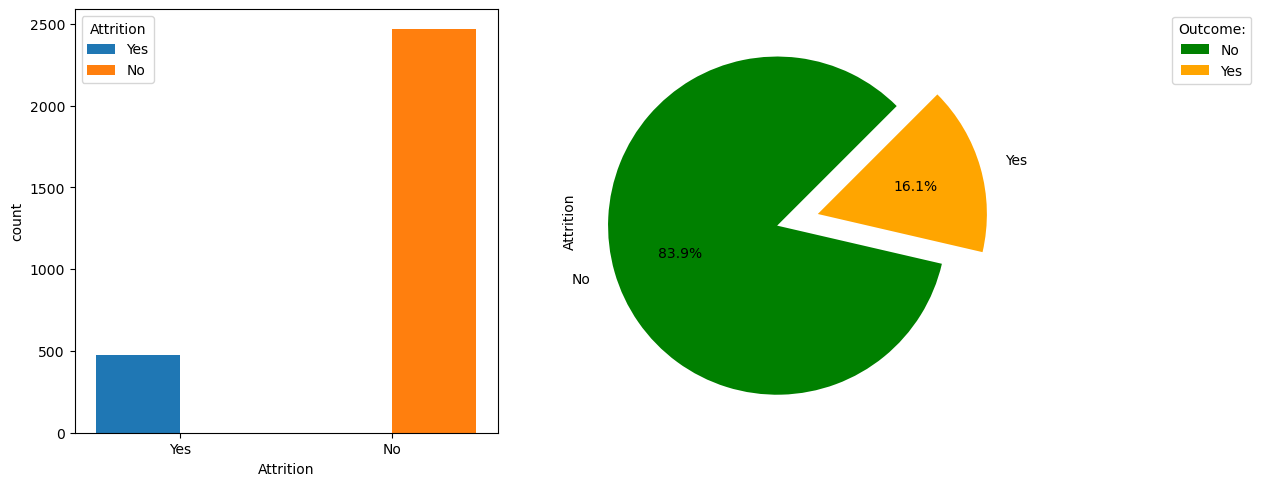

In [12]:
# Create a figure with two subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5))

# Plot a count plot (bar plot) of the target class 'Attrition' on the first subplot (ax1)
sns.countplot(x=df['Attrition'], data=df, saturation=1, hue='Attrition', ax=ax1)

# Plot a pie chart of the target class 'Attrition' on the second subplot (ax2)
# Set colors for the pie chart slices
colors = ['green', 'orange']
# Specify the extent to which each slice should be exploded from the center
explode = [0.1, 0.15]
# Specify labels for the pie chart slices
labels = ['No', 'Yes']
# Plot the pie chart with percentages formatted to one decimal place
df['Attrition'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=45,
                                    colors=colors, explode=explode, labels=labels, labeldistance=1.15)
# Add a legend to the pie chart
ax2.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))

# Display the plot
plt.show()


This indicates that approximately 83.9% of the instances in the dataset correspond to cases where no employee attrition was made, while around 16.1% of the instances correspond to cases where a employee attrition was made.

<font color = "blue" size = 4>Dropping the following columns:</font>

In [13]:
columns_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
# Dropping the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

1.**EmployeeNumber:** This column is likely just an identifier for each employee and doesn't contain information relevant to predicting attrition.

2.**EmployeeCount:** If this column contains the same value for all records (e.g., all employees have a count of 1), it won't provide any useful information for prediction.

3.**Over18:** If all employees are over 18 years old (which is likely), this column won't provide any discriminatory power for prediction.

4.**StandardHours:** If all employees have the same standard hours of work, this column won't contribute to predicting attrition.

<br/>
<font color = "brown" size = 5>Exploratory Data Analysis (EDA)</font>

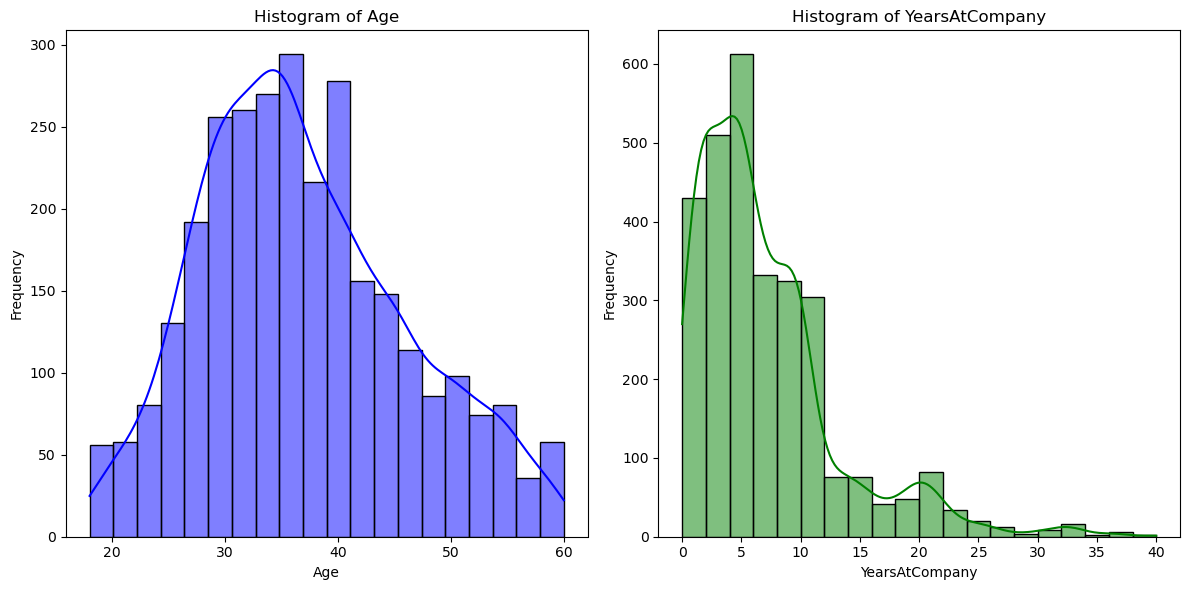

In [14]:
# plotting the histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='YearsAtCompany', bins=20, kde=True, color='green')
plt.title('Histogram of YearsAtCompany')
plt.xlabel('YearsAtCompany')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**observations:**

1.The histogram on the left shows the distribution of age. The x-axis shows age, and the y-axis shows the frequency of people in that age range. For example, there are more people between the ages of 30 and 40 than any other age range.

2.The histogram on the right shows the distribution of the number of years people have been with the company. The x-axis shows the number of years, and the y-axis shows the frequency of people who have been with the company for that number of years. For example, there are more people who have been with the company for 5-10 years than any other range.

3.The age distribution is skewed to the left. This means that there are more younger people than older people.

4.The distribution of the number of years people have been with the company is also skewed to the left. This means that there are more people who have been with the company for a shorter amount of time than people who have been with the company for a longer amount of time.

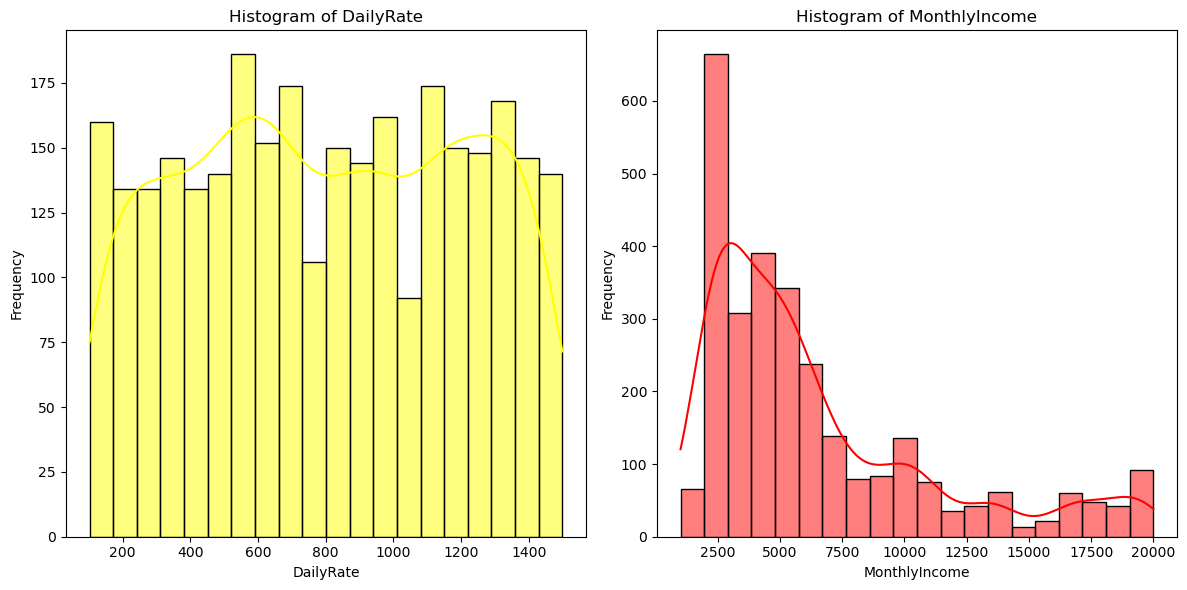

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DailyRate', bins=20, kde=True, color='yellow')
plt.title('Histogram of DailyRate')
plt.xlabel('DailyRate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyIncome', bins=20, kde=True, color='red')
plt.title('Histogram of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**observations:**

**Histogram of DailyRate:**

1.Distribution: The distribution of daily rates is left-skewed, meaning there are more people with lower daily rates than higher daily rates.

2.Range: The daily rates range from around 200 to 1400.

3.Most frequent daily rate: The most frequent daily rate is between 400 and 600.

**Histogram of MonthlyIncome:**

1.Distribution: The distribution of monthly incomes is also left-skewed, but less so than the daily rates.

2.Range: The monthly incomes range from around 2500 to 20000.

3.Most frequent monthly income: The most frequent monthly income is between 5000 and 7500.

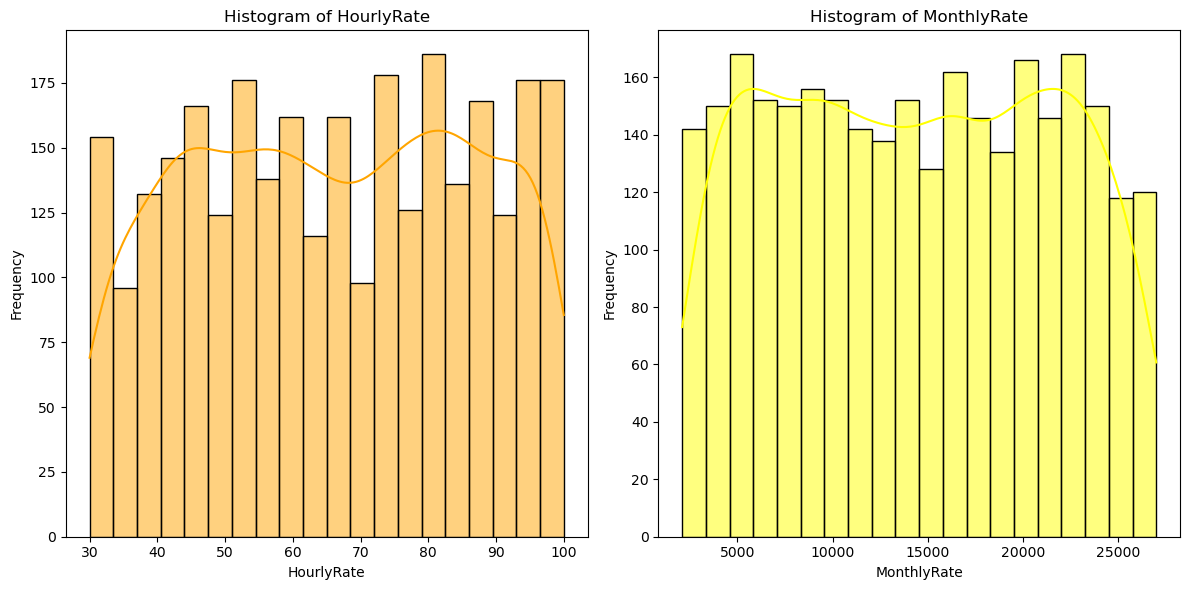

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='HourlyRate', bins=20, kde=True, color='orange')
plt.title('Histogram of HourlyRate')
plt.xlabel('HourlyRate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyRate', bins=20, kde=True, color='yellow')
plt.title('Histogram of MonthlyRate')
plt.xlabel('MonthlyRate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**observations:**

**Histogram 1: Hourly Rate**

1.Distribution: The distribution of hourly rates is left-skewed, meaning there are more people with lower hourly rates than higher hourly rates. The leftmost bin starts at 0 and extends to 30, while the rightmost bin extends from 90 to 100. This suggests that a majority of people earn less than 30 per hour, while a smaller number earn between 90 and 100 per hour.

2.Range: The hourly rates range from 0 to 100.

3.Most frequent hourly rate: The most frequent hourly rate is between 20 and 30.

**Histogram 2: Monthly Rate**

1.Distribution: The distribution of monthly rates is also left-skewed, but less so than the hourly rates. The leftmost bin starts at 0 and extends to 5,000, while the rightmost bin extends from 20,000 to 25,000. This suggests that a larger portion of people earn between 5,000 and 10,000 per month compared to those earning less than 5,000.

2.Range: The monthly rates range from 0 to 25,000.

Most frequent monthly rate: The most frequent monthly rate is between 5,000 and 7,500.

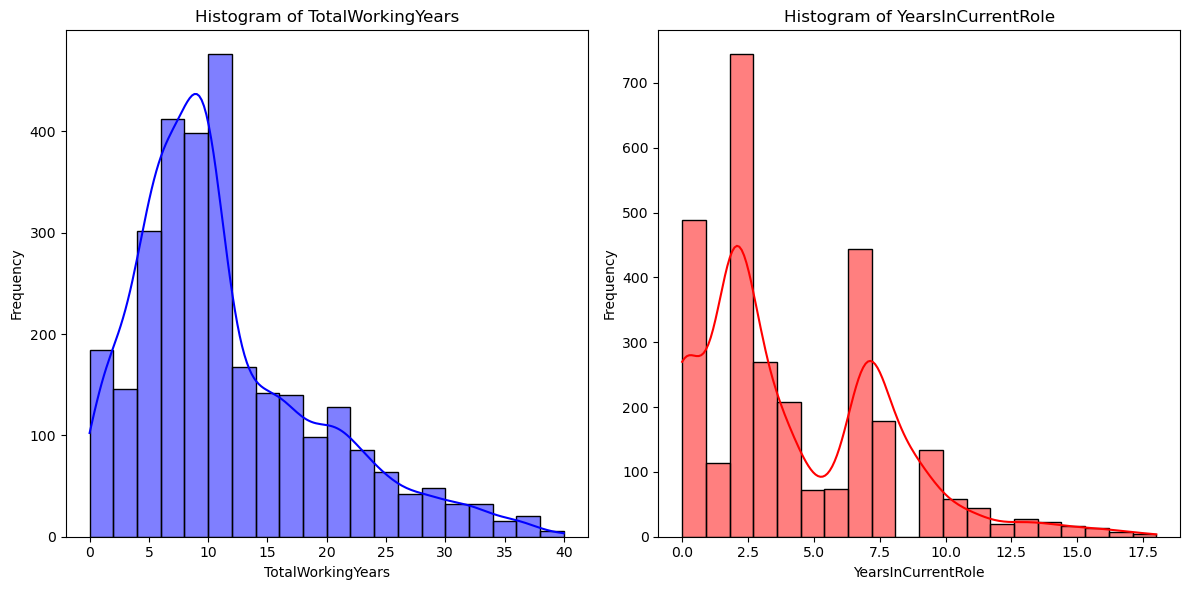

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='TotalWorkingYears', bins=20, kde=True, color='blue')
plt.title('Histogram of TotalWorkingYears')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='YearsInCurrentRole', bins=20, kde=True, color='red')
plt.title('Histogram of YearsInCurrentRole')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**observations:**

**Distribution of working years:**

1.All employees: The distribution is right-skewed, meaning there are more people with fewer years of working experience than those with more experience. The most frequent number of working years falls between 5 and 10 years. There are also a significant number of people with 0-5 years of experience and a smaller number with 15 or more years.

2.Employees with prior managerial experience: The distribution is also right-skewed, but to a lesser extent than the "All employees" group. The most frequent number of working years falls between 10 and 15 years. There are also a considerable number of people with 5-10 years of experience and a smaller number with 0-5 years or more than 15 years.

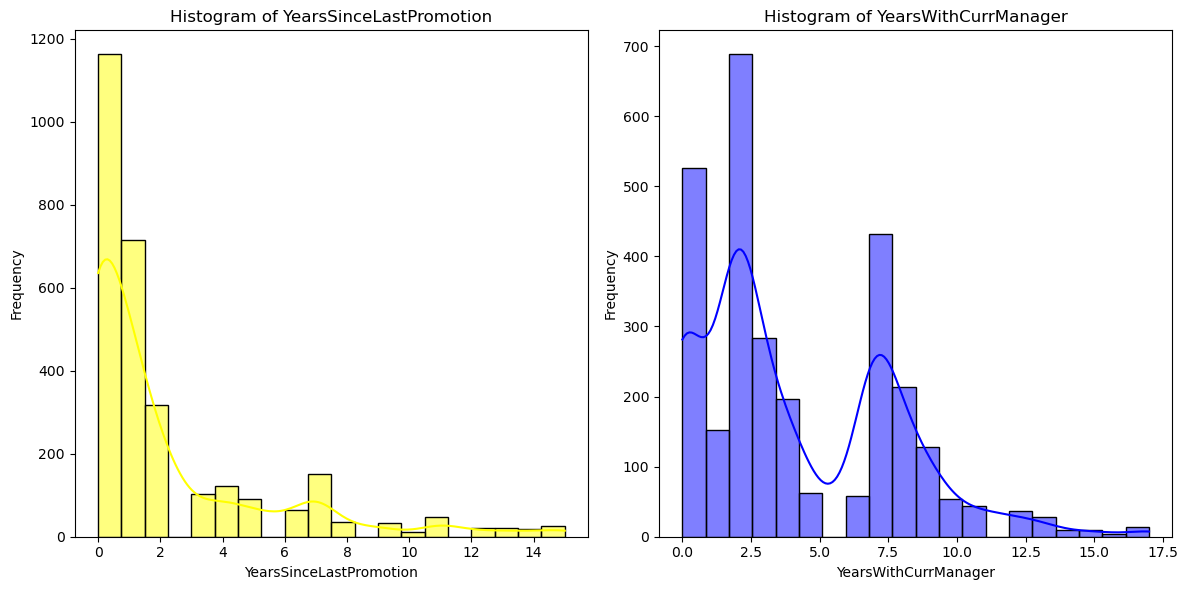

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='YearsSinceLastPromotion', bins=20, kde=True, color='yellow')
plt.title('Histogram of YearsSinceLastPromotion')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='YearsWithCurrManager', bins=20, kde=True, color='blue')
plt.title('Histogram of YearsWithCurrManager')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**observations:**

**Distribution of YearsSinceLastPromotion:**

1.All employees: The distribution is right-skewed, meaning there are more people with fewer years of working experience than those with more experience. The most frequent number of working years falls between 5 and 10 years. There are also a significant number of people with 0-5 years of experience and a smaller number with 15 or more years.

2.Distribution of YearsWithCurrManager: The distribution is also right-skewed, but to a lesser extent than the "All employees" group. The most frequent number of working years falls between 10 and 15 years. There are also a considerable number of people with 5-10 years of experience and a smaller number with 0-5 years or more than 15 years.

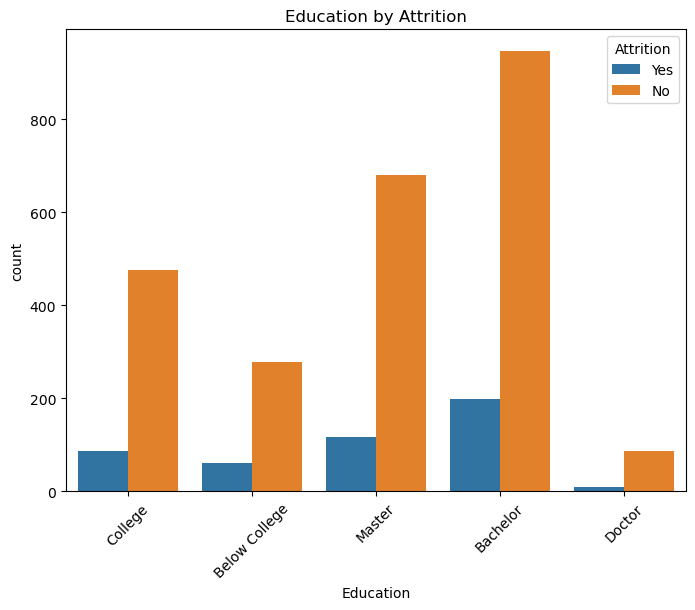

In [19]:
edu_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Education'].map(edu_map), hue='Attrition', data= df)
plt.title('Education by Attrition')
plt.xticks(rotation=45)
plt.show()

**Observation:**

* Employees from the Bachelors are more then from Masters background. Attrition wrt to Bachelor can be see more because they have more and more expectation from company and it will be interesting to see the reason behind this in dataset.

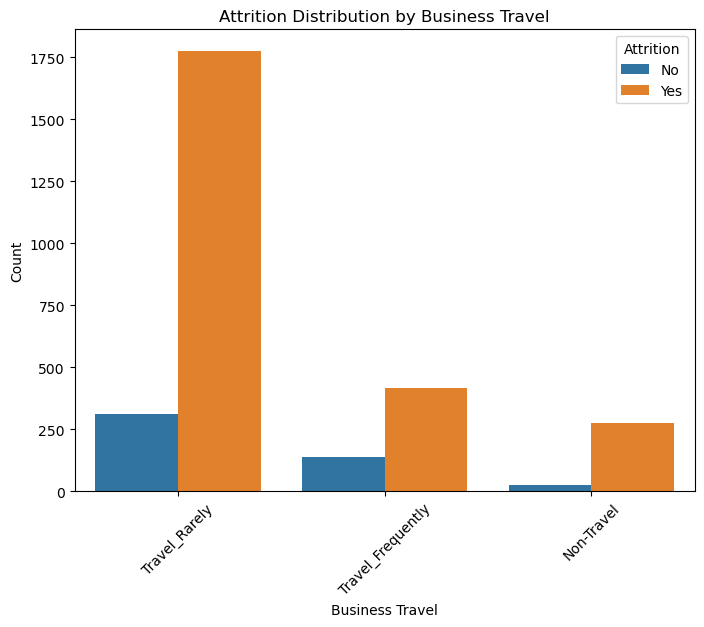

In [20]:
# Create a count plot for Attrition vs. BusinessTravel
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition Distribution by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

**observations:**

1.The countplot shows the distribution of attrition by business travel for employees. The x-axis shows whether the employee travels rarely, frequently, or not at all, and the y-axis shows the number of employees who left the company (attrition).

2.There is a significantly higher number of employees who travel rarely that left the company compared to those who travel frequently or do not travel at all. This suggests that employees who travel rarely may be less satisfied with their jobs or have a higher workload, which could lead them to leave the company.

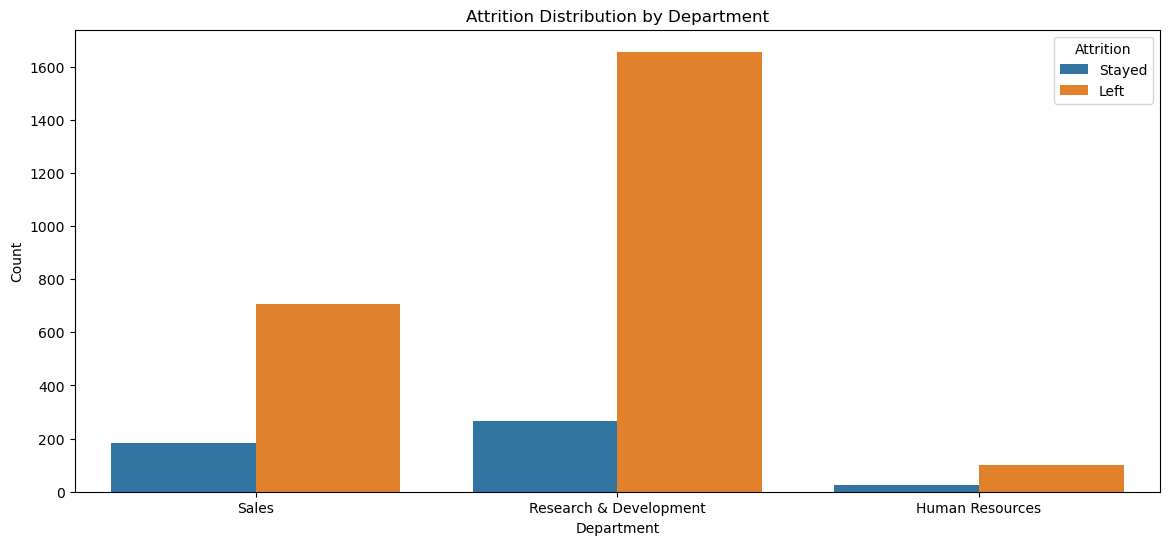

In [21]:
# Create a bar plot of attrition vs. department
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

**observations:**

1.Overall, the Sales department has the highest number of employees who left the company (attrition), followed by Human Resources and then Research & Development. This might suggest that employees in the Sales department are less satisfied with their jobs, have a higher workload, or are more likely to find other opportunities. However, it is important to consider other factors that could influence attrition rates, such as department size, team dynamics, and company culture.

2.There is a relatively even distribution of attrition within the Research & Development department, regardless of whether the employee stayed or left. This could indicate that there are no specific factors within the department that are strongly influencing attrition.

3.The Human Resources department has a higher proportion of employees who stayed with the company compared to those who left. This might suggest that employees in HR are more satisfied with their jobs or feel more invested in the company's mission.

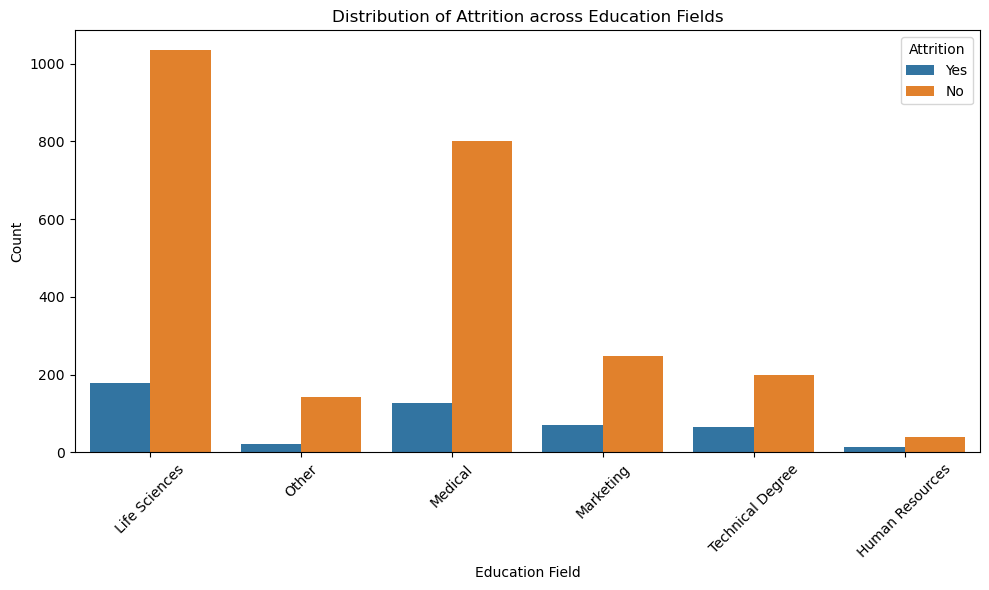

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('Distribution of Attrition across Education Fields')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

**observations:**

1.Overall, the “Life Sciences” field has the highest number of people who left the company (attrition), followed by “Other” and then “Medical” fields. This might suggest that employees in these fields are less satisfied with their jobs, have a higher workload, or are more likely to find other opportunities. However, it is important to consider other factors that could influence attrition rates, such as salary, company culture, and job growth opportunities within each field.

2.The “Technical Degree” and “Human Resources” fields have a relatively even distribution of people who left and stayed. This could indicate that there are no specific factors within these fields that are strongly influencing attrition.

3.There seems to be a pattern where fields with a higher number of people who left the company also tend to have a higher number of people who stayed. This could be due to a number of factors, such as the size of the field or the specific companies that employ people in those fields.

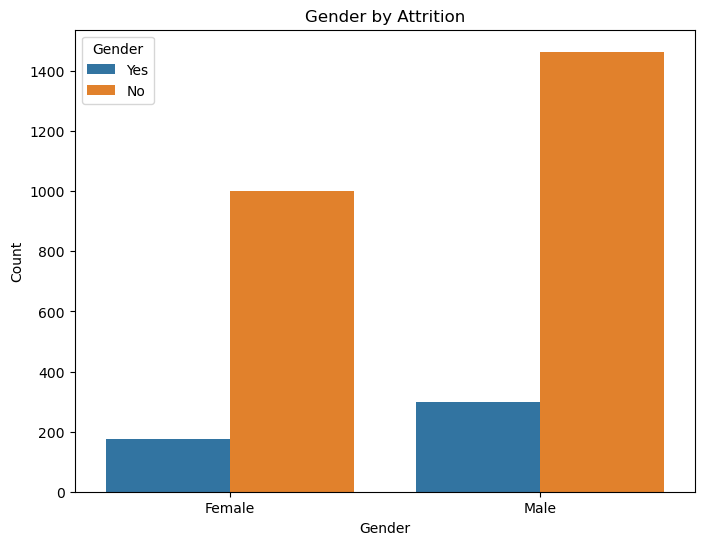

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Gender by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

**observations:** 

1. There are more males than females in the dataset. This is evident from the heights of the bars.

2. The females contribution of leaving the company are less than males.

3. The count of males are more than females who did not left the company.


In [24]:
df['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

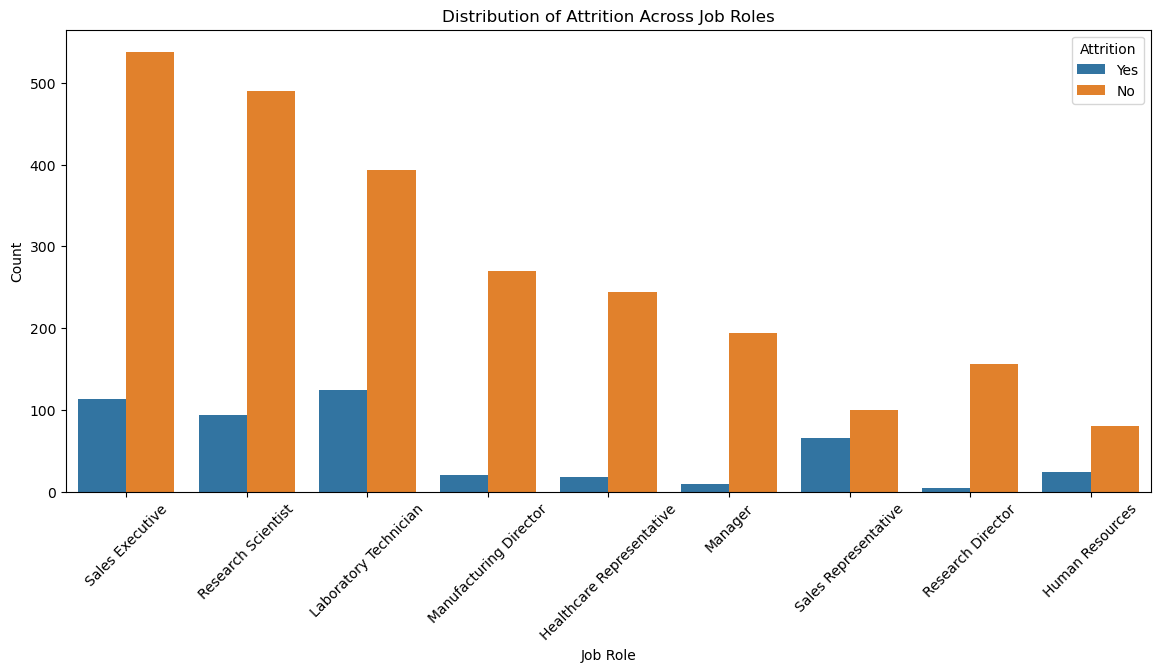

In [25]:
# Create a bar plot for Attrition vs. JobRole
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Distribution of Attrition Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()

**observations:**

1.Overall, there seems to be a higher rate of attrition in some job roles compared to others. For example, the job roles with the highest attrition rates in this dataset are "Research Scientist," "Laboratory Technician," and "Manufacturing Director." On the other hand, roles like "Manager" and "Sales Representative" appear to have lower attrition rates.

2.It's important to consider the number of people in each job role when interpreting the data. For instance, while "Research Scientist" has a high attrition rate, it also has a relatively small number of people compared to roles like "Sales Representative." Therefore, the overall impact of attrition on the company might be higher for roles with lower rates but a larger number of employees.

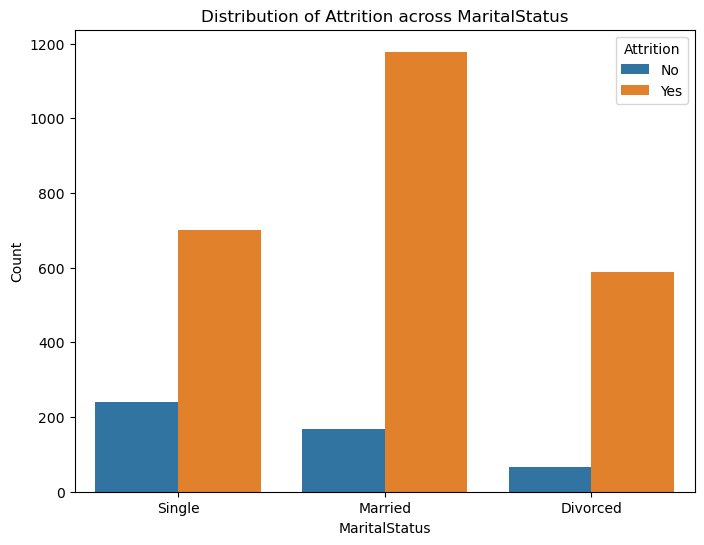

In [26]:
# Create a countplot for the distribution of Attrition across different MaritalStatus categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Distribution of Attrition across MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

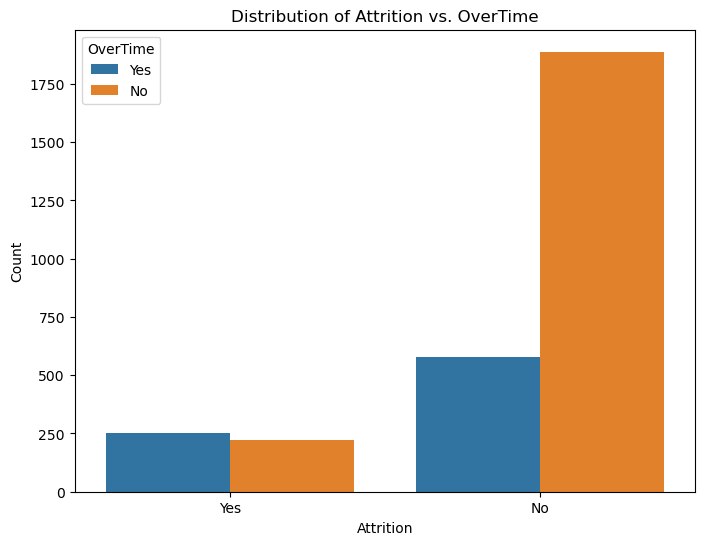

In [27]:
# Create a count plot for Attrition vs. OverTime
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attrition', hue='OverTime')
plt.title('Distribution of Attrition vs. OverTime')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='OverTime')
plt.show()

**observations:**

1.This suggests that younger employees are more likely to leave the job.

2.This could indicate that these employees are more settled in their lives and less likely to switch providers.

<font color = "blue" size = 4>Distribution of each numerical column </font>

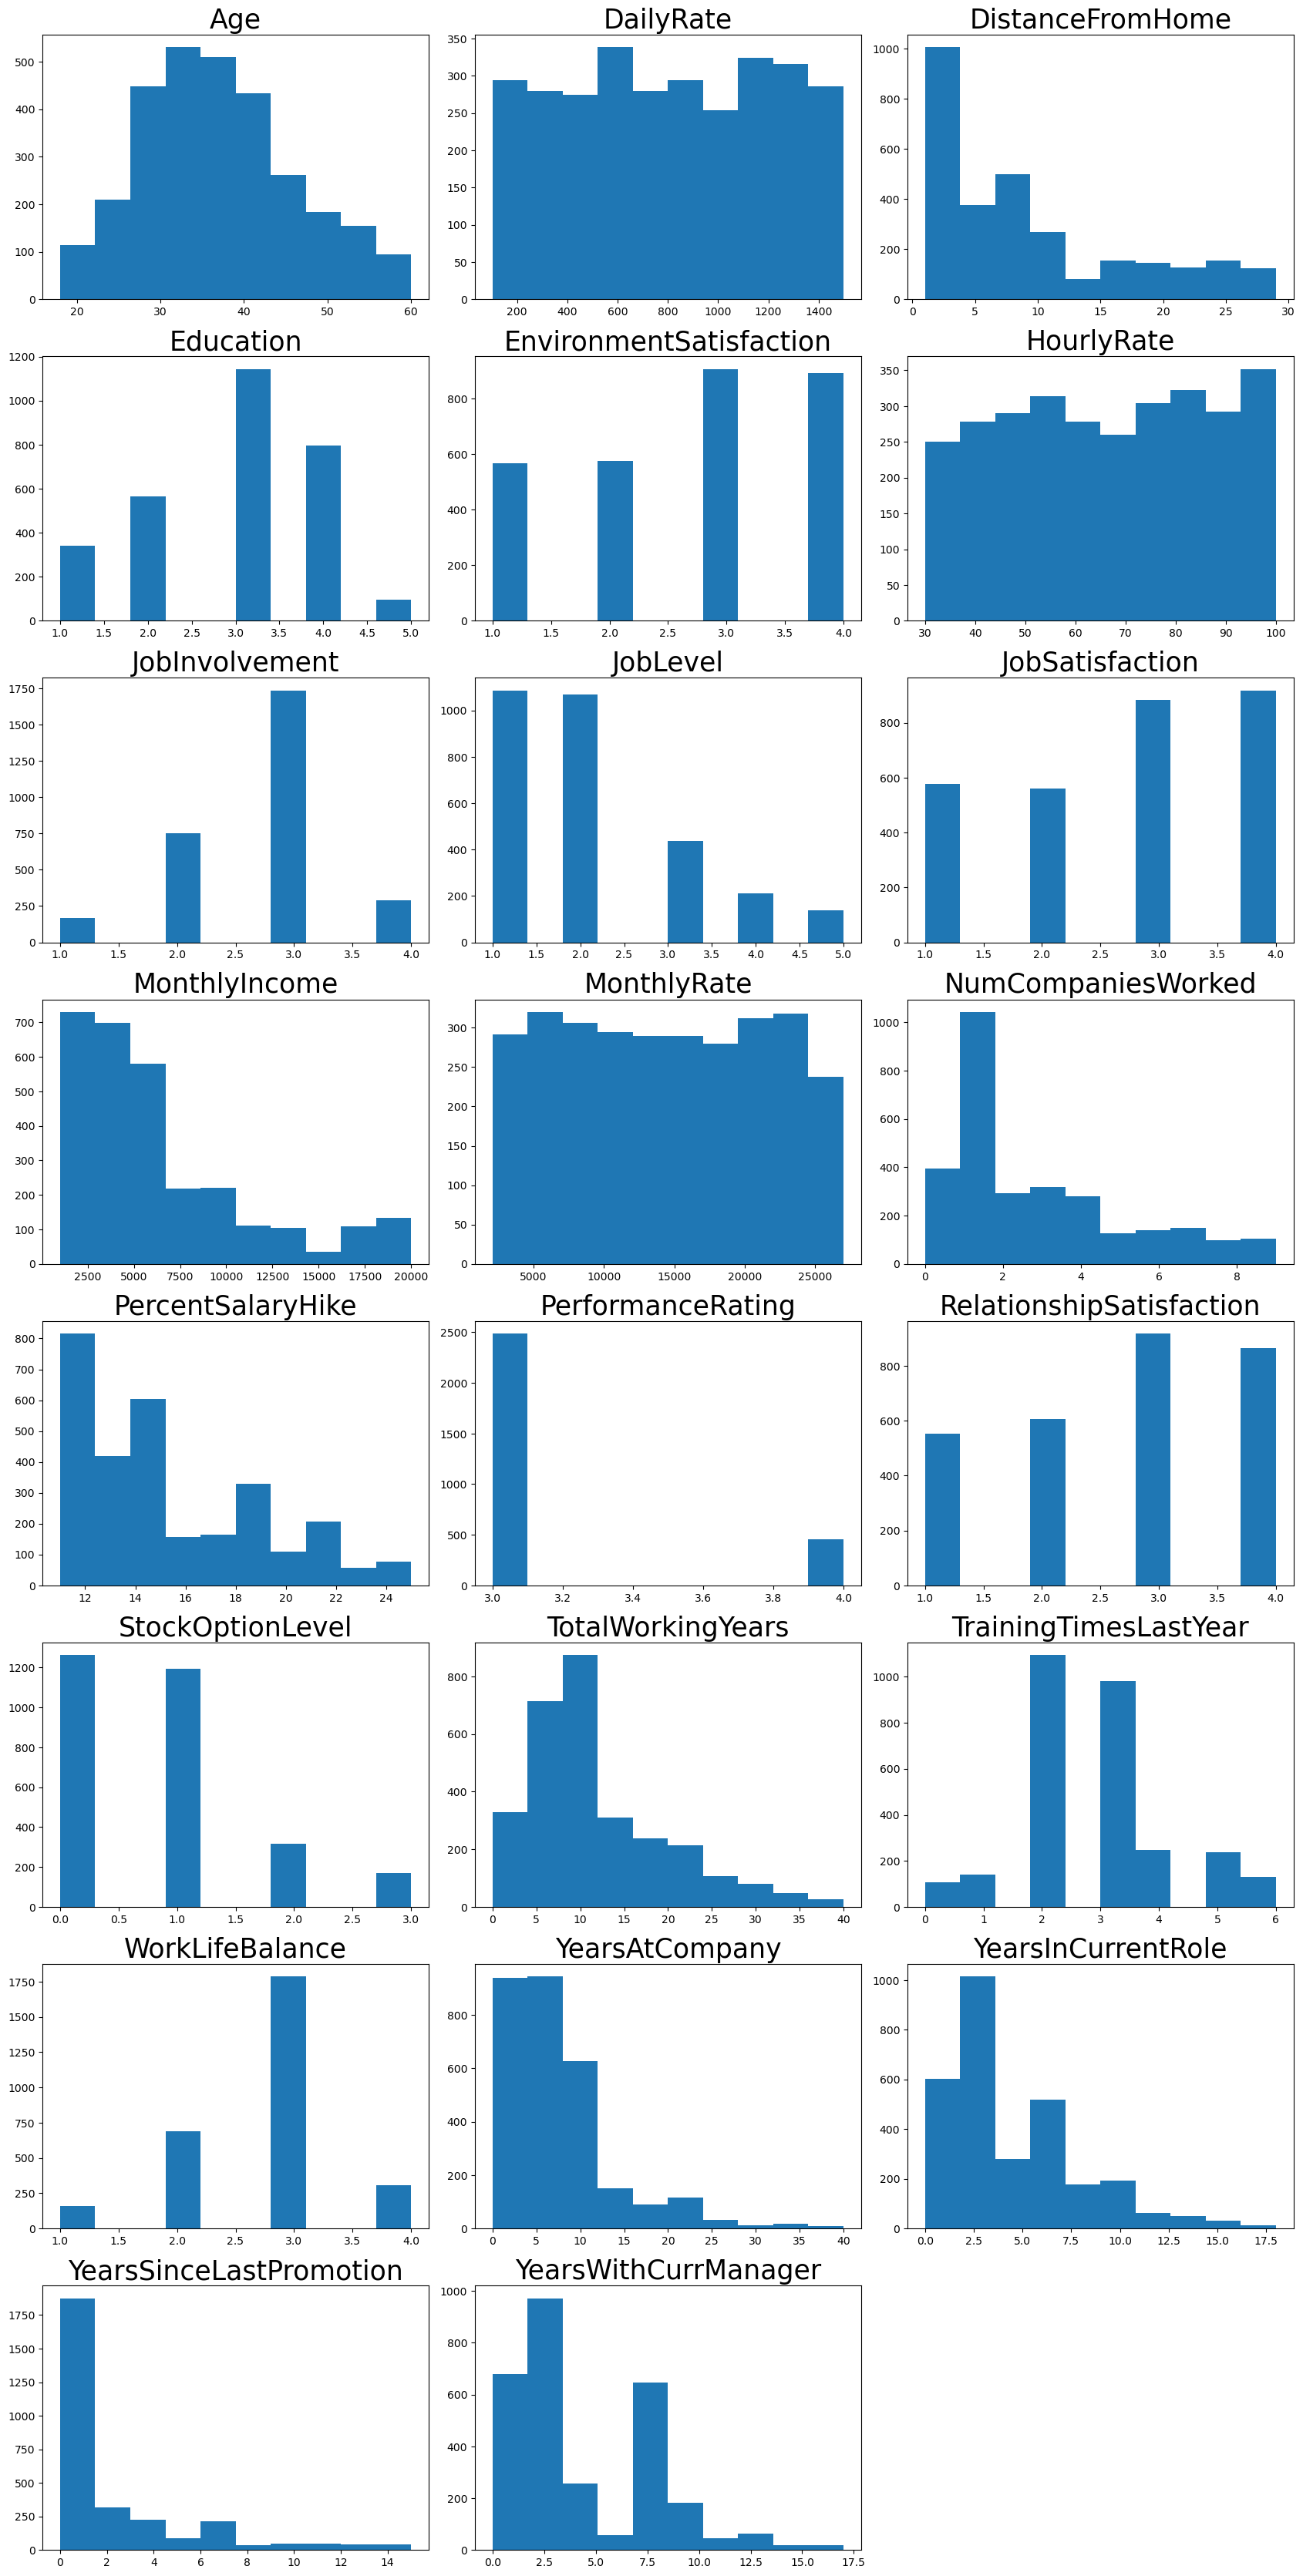

In [28]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

**observations:**

**Age:**
The distribution is right-skewed, meaning there are more younger employees than older employees.
There may be outliers on the older end of the spectrum.

**DailyRate:**
The distribution is left-skewed, meaning most employees have lower daily rates.
There may be outliers on the higher end of the spectrum.

**DistanceFromHome:**
The distribution is likely right-skewed, with more employees living closer to their workplace.
The specific shape and range will depend on factors like city size and commute options.

**Education:**
This histogram is a categorical variable, so it shows the distribution of employees across different education levels.
The specific levels and their frequencies will depend on the industry and company culture.

**EnvironmentSatisfaction:**
The distribution likely shows a central tendency, with most employees reporting moderate levels of satisfaction.
Depending on the scale used, it might be possible to identify if more employees lean towards satisfaction or dissatisfaction.

**HourlyRate:**
Similar to DailyRate, the distribution is likely left-skewed with most employees having lower hourly rates.
There may be outliers on the higher end of the spectrum.

**JobInvolvement:**
The distribution likely shows a central tendency, with most employees reporting moderate levels of involvement.
Depending on the scale used, it might be possible to identify if more employees are highly involved or less involved.

**JobLevel:**
This histogram is a categorical variable, so it shows the distribution of employees across different job levels.
The specific levels and their frequencies will depend on the company structure and hierarchy.

**JobSatisfaction:**
Similar to EnvironmentSatisfaction, the distribution likely shows a central tendency, with most employees reporting moderate levels of satisfaction.
Depending on the scale used, it might be possible to identify if more employees lean towards satisfaction or dissatisfaction.

**MonthlyIncome:**
The distribution is likely right-skewed, with more employees having lower monthly incomes.
There may be outliers on the higher end of the spectrum.

**MonthlyRate:**
Similar to MonthlyIncome, the distribution is likely right-skewed with more employees having lower monthly rates.
There may be outliers on the higher end of the spectrum.

**NumCompaniesWorked:**
The distribution is likely right-skewed, with most employees having worked for a few companies.
There may be outliers on the higher end, representing employees who have switched jobs many times.

**PercentSalaryHike:**
The distribution may be right-skewed, with most employees receiving smaller salary hikes.
The specific shape and range will depend on company policies, performance evaluations, and industry norms.

**PerformanceRating:**
This histogram is likely a categorical variable, showing the distribution of employees across different performance rating categories.
The specific categories and their frequencies will depend on the company's performance evaluation system.

**RelationshipSatisfaction:**
Similar to JobSatisfaction and EnvironmentSatisfaction, the distribution likely shows a central tendency, with most employees reporting moderate levels of satisfaction.
Depending on the scale used, it might be possible to identify if more employees lean towards satisfaction or dissatisfaction.

**StockOptionLevel:**
This histogram is a categorical variable, showing the distribution of employees across different stock option levels (if applicable).
The specific levels and their frequencies will depend on the company's stock option plan and eligibility criteria.

**TotalWorkingYears:**
The distribution is likely right-skewed, with more employees having fewer years of total work experience.
There may be outliers on the higher end, representing very experienced employees.

**TrainingTimesLastYear:**
The distribution will likely vary depending on the company's training culture and individual employee needs.
It's difficult to draw general conclusions without knowing more about the context.

**WorkLifeBalance:**
Similar to other satisfaction metrics, the distribution likely shows a central tendency, with most employees reporting moderate work-life balance.
Depending on the scale used, it might be possible to identify if more employees lean towards good or poor work-life balance.

**YearsAtCompany:**
The distribution is likely right-skewed, with more employees having fewer years at the company.
There may be outliers on the higher end, representing long-tenured employees.

**YearsInCurrentRole:**
Similar to YearsAtCompany, the distribution is likely right-skewed, with more employees having fewer years in their current role.

<font color = "blue" size = 4>Univarient Analysis </font>

In [29]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [30]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Print the list of numerical columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


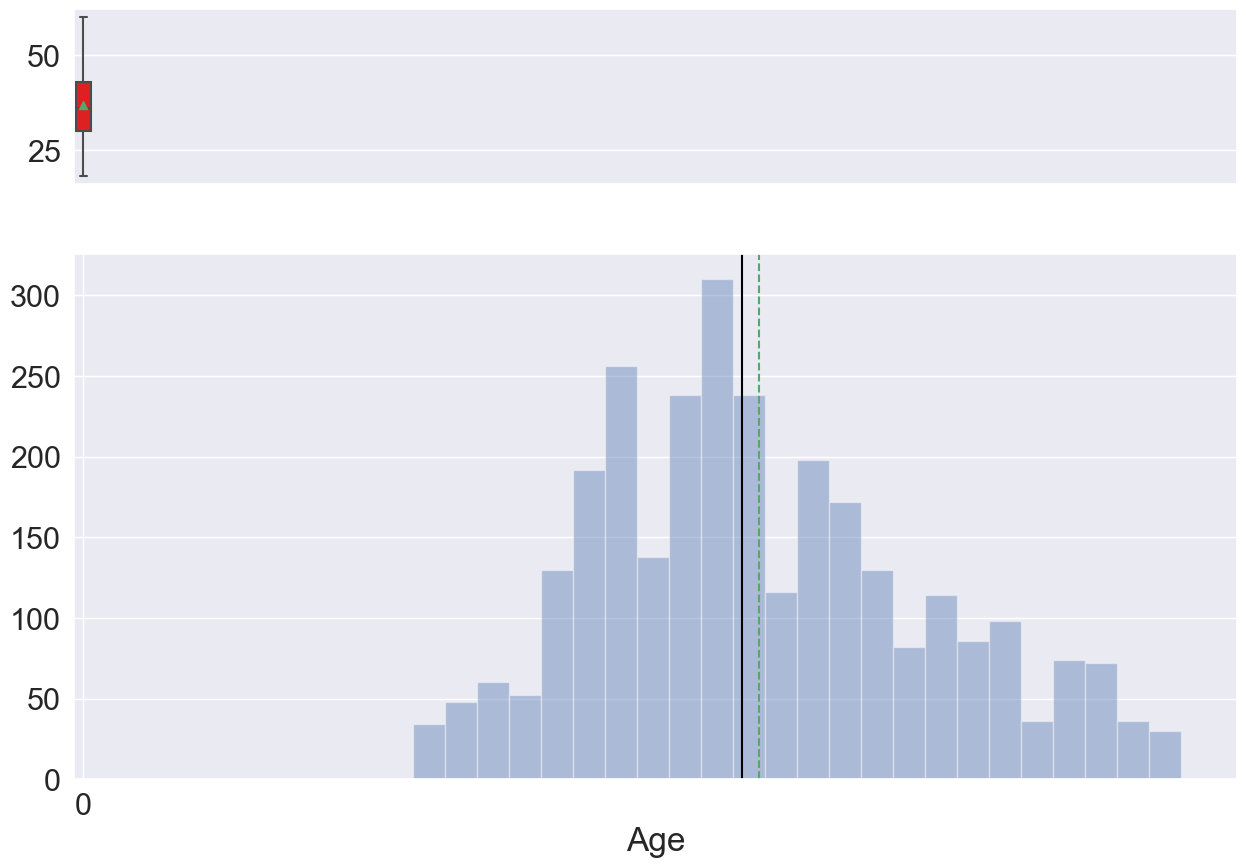

In [31]:
histogram_boxplot(df.Age)

**observations:**

The distribution is right-skewed, meaning there are more employees with lower job satisfaction scores than those with higher scores. This suggests that a majority of employees are somewhat satisfied with their jobs, but there is a smaller group of employees who are very satisfied.

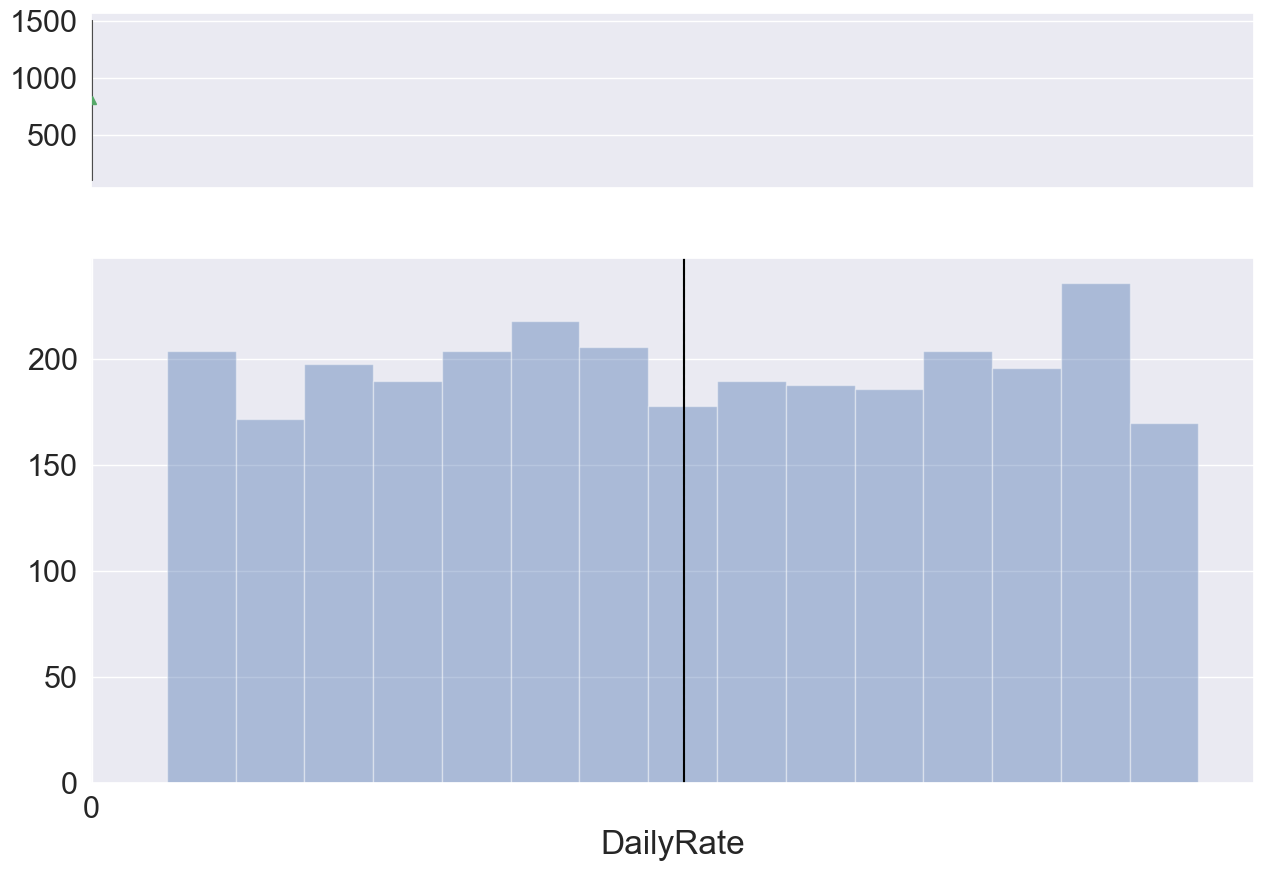

In [32]:
histogram_boxplot(df.DailyRate)

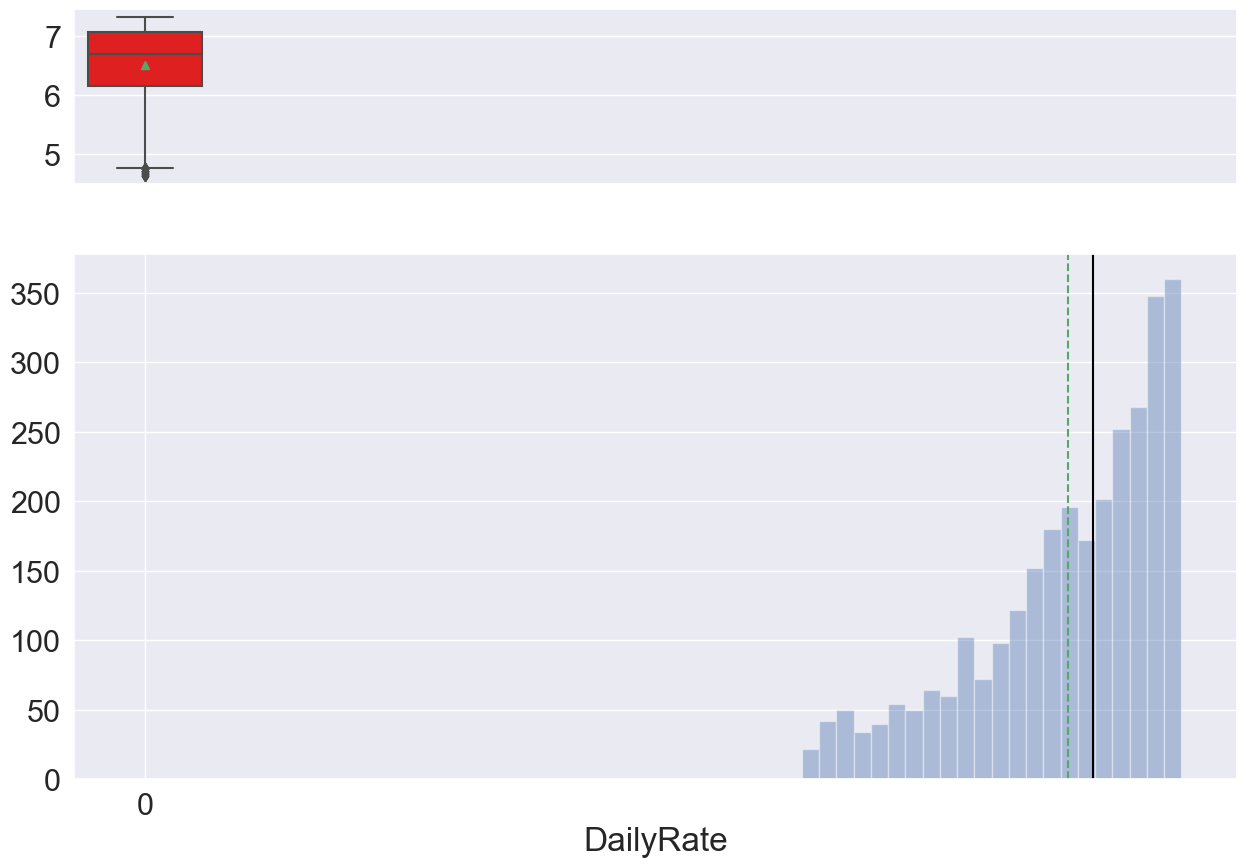

In [33]:
histogram_boxplot(np.log1p(df.DailyRate))

**observations:**

The distribution is right-skewed, meaning there are more job roles with lower attrition rates than those with higher rates. This suggests that a majority of job roles have relatively low attrition, but there are a few roles with significantly higher rates.
Perform the log transgfomations to vusualize the data clearly.

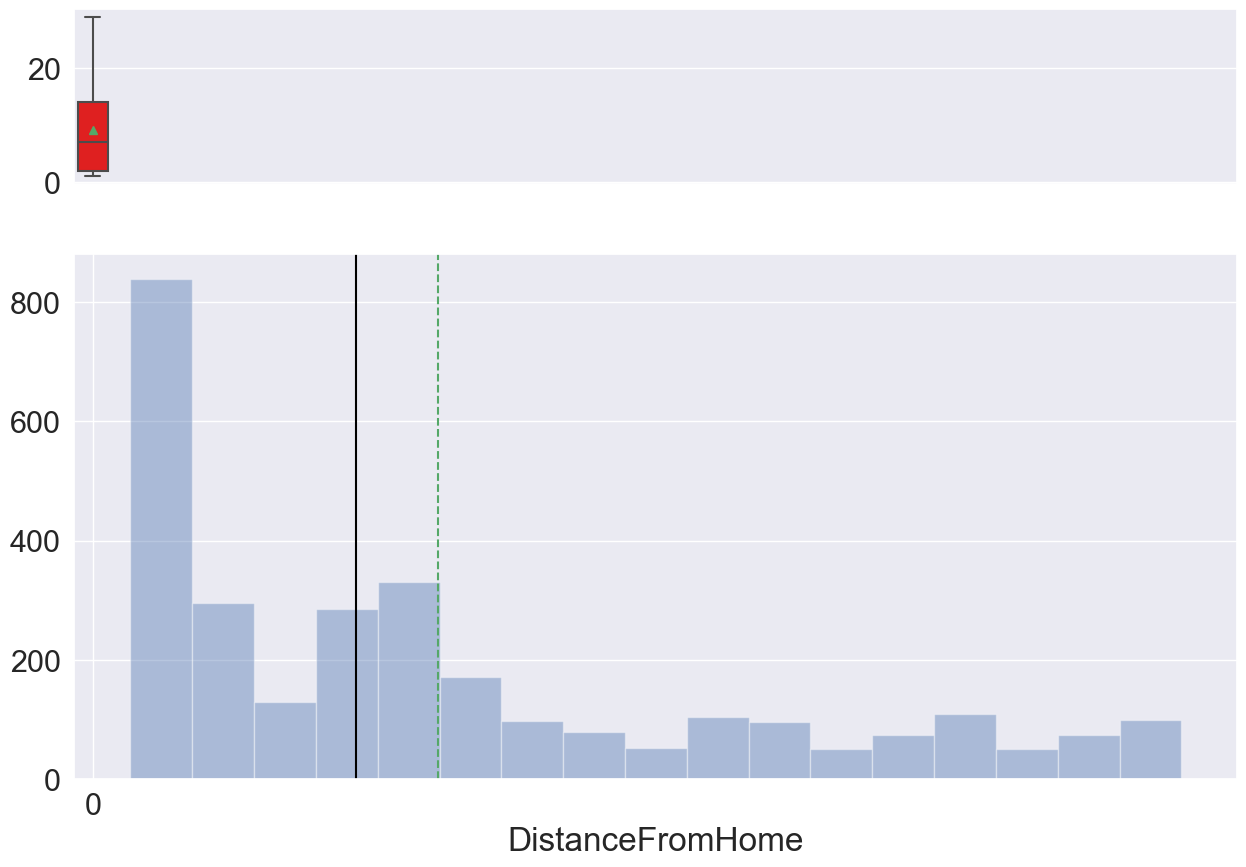

In [34]:
histogram_boxplot(df.DistanceFromHome)

**observations:**

The distribution is right-skewed, meaning there are more people who live closer to their workplace than those who live farther away. This suggests that a majority of the employees have a relatively short commute.

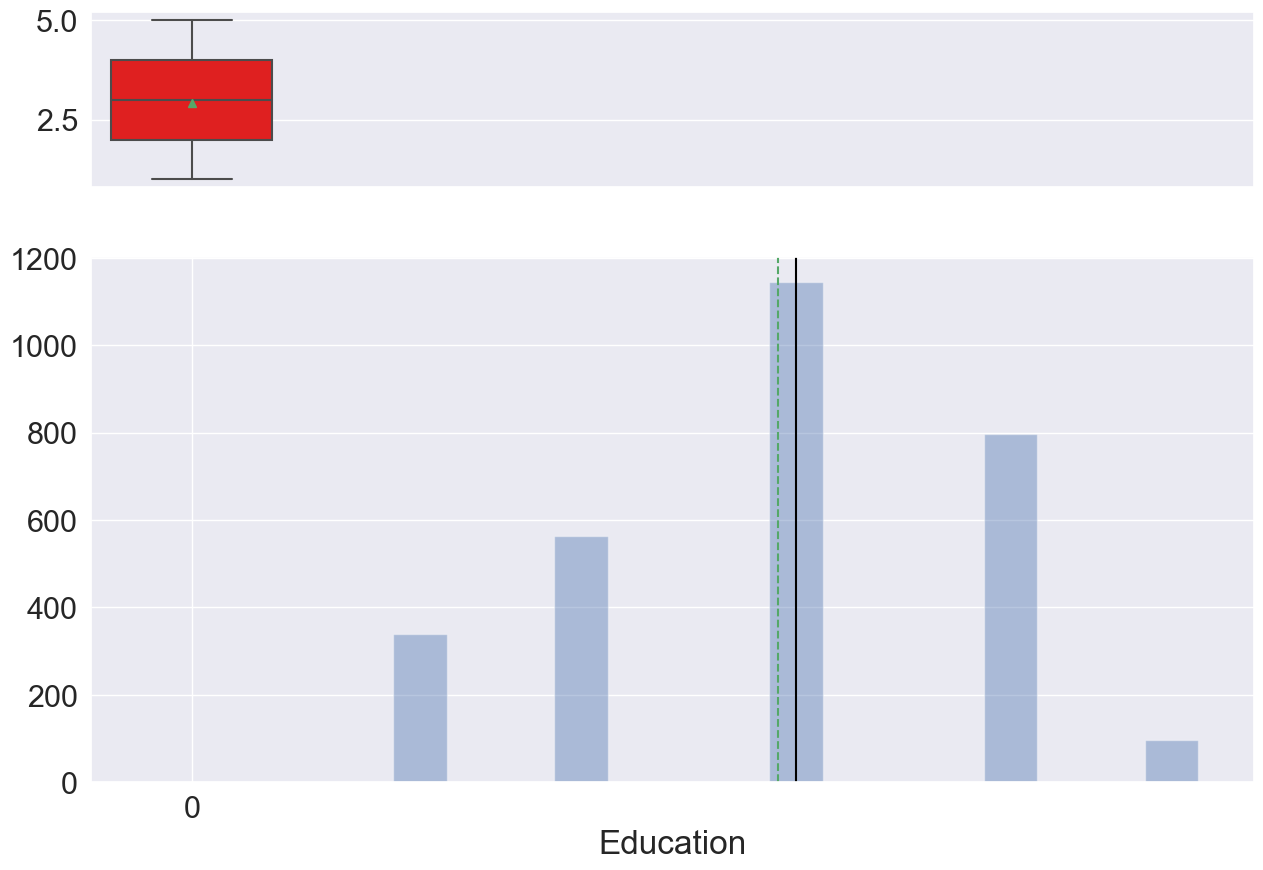

In [35]:
histogram_boxplot(df.Education)

**observations:**

The distribution is right-skewed, meaning there are more employees with lower levels of education than those with higher levels. This suggests that a majority of the employees have a bachelor's degree or lower, while there are fewer employees with advanced degrees like master's or Ph.D.s.

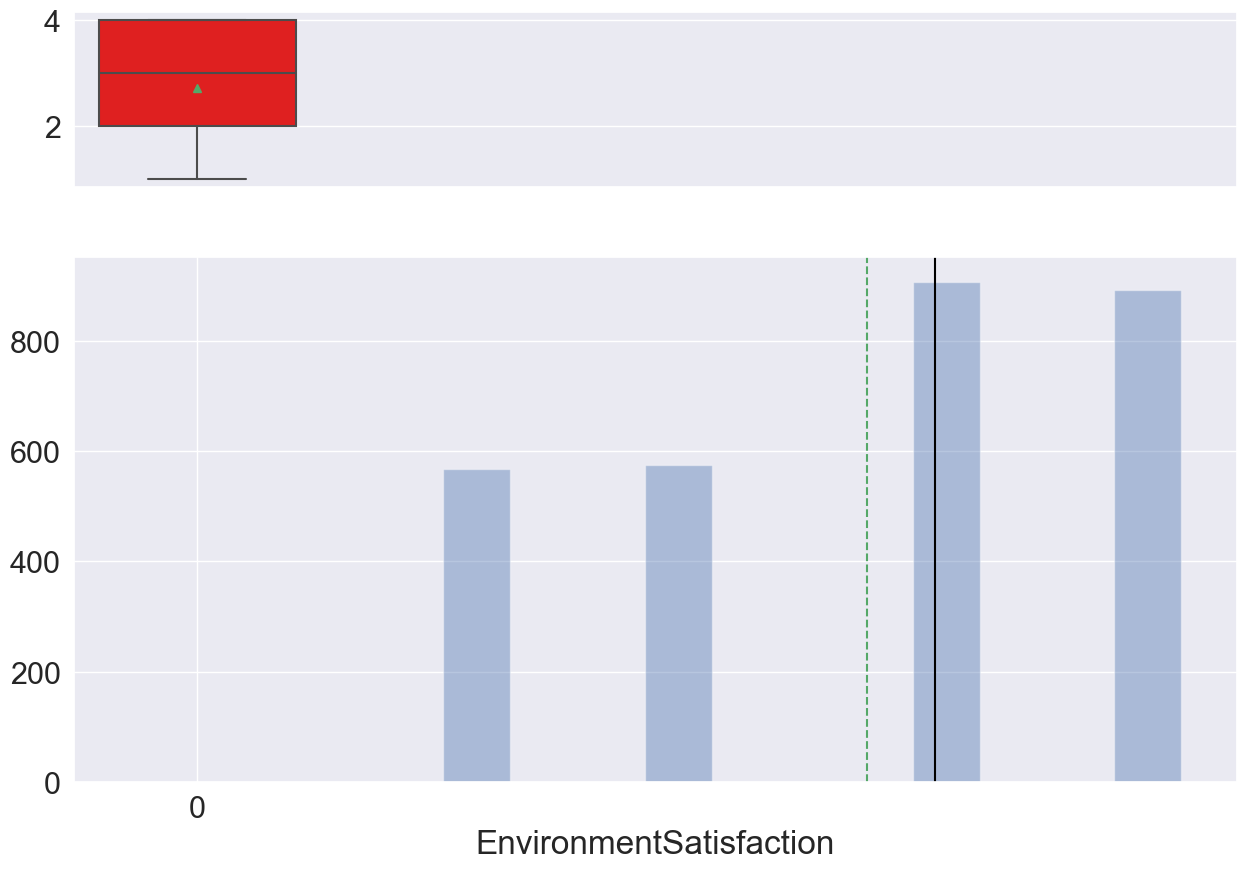

In [36]:
histogram_boxplot(df.EnvironmentSatisfaction)

**observations:**

The distribution is right-skewed, meaning there are more employees who are less satisfied with their work environment than those who are more satisfied. This suggests that a majority of employees are somewhat neutral or dissatisfied with their work environment, while there is a smaller group who are very satisfied.

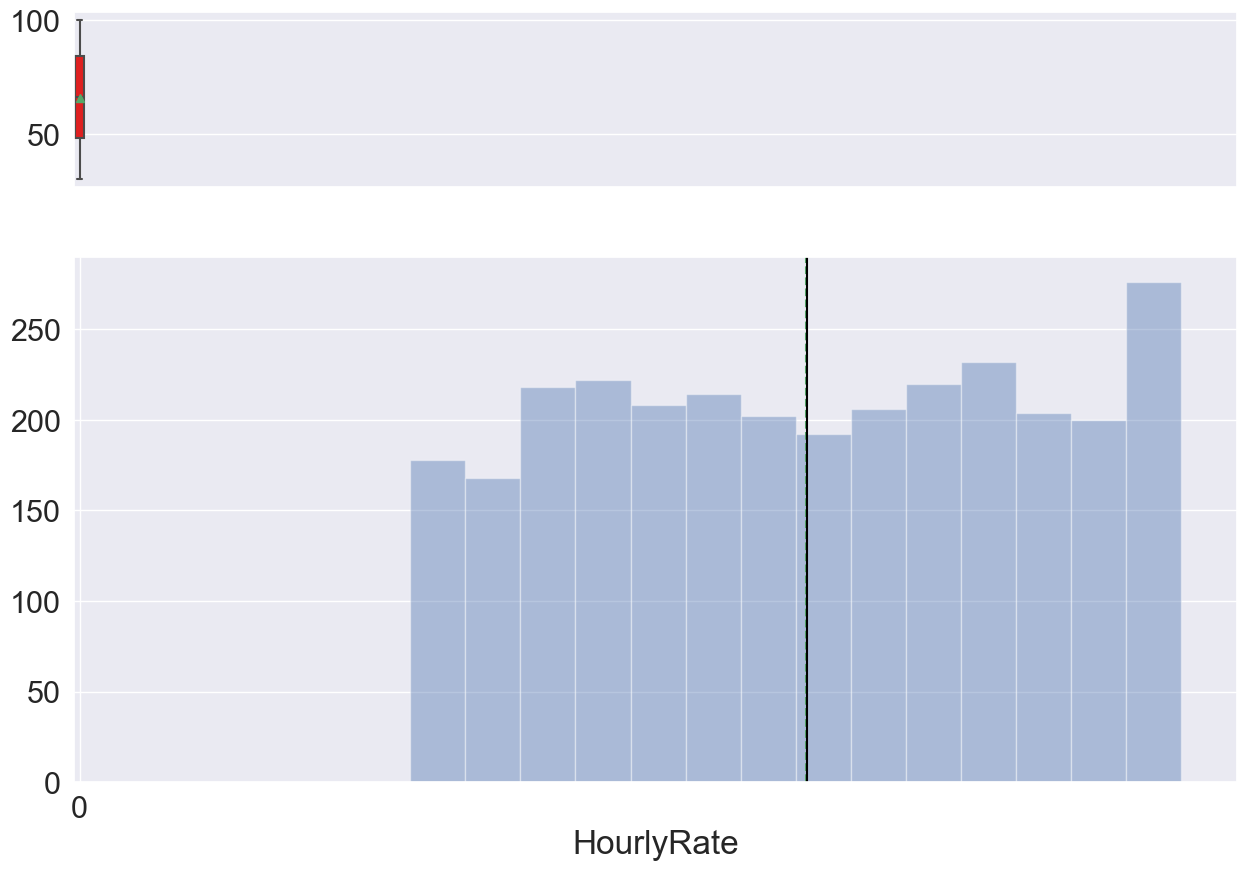

In [37]:
histogram_boxplot(df.HourlyRate)

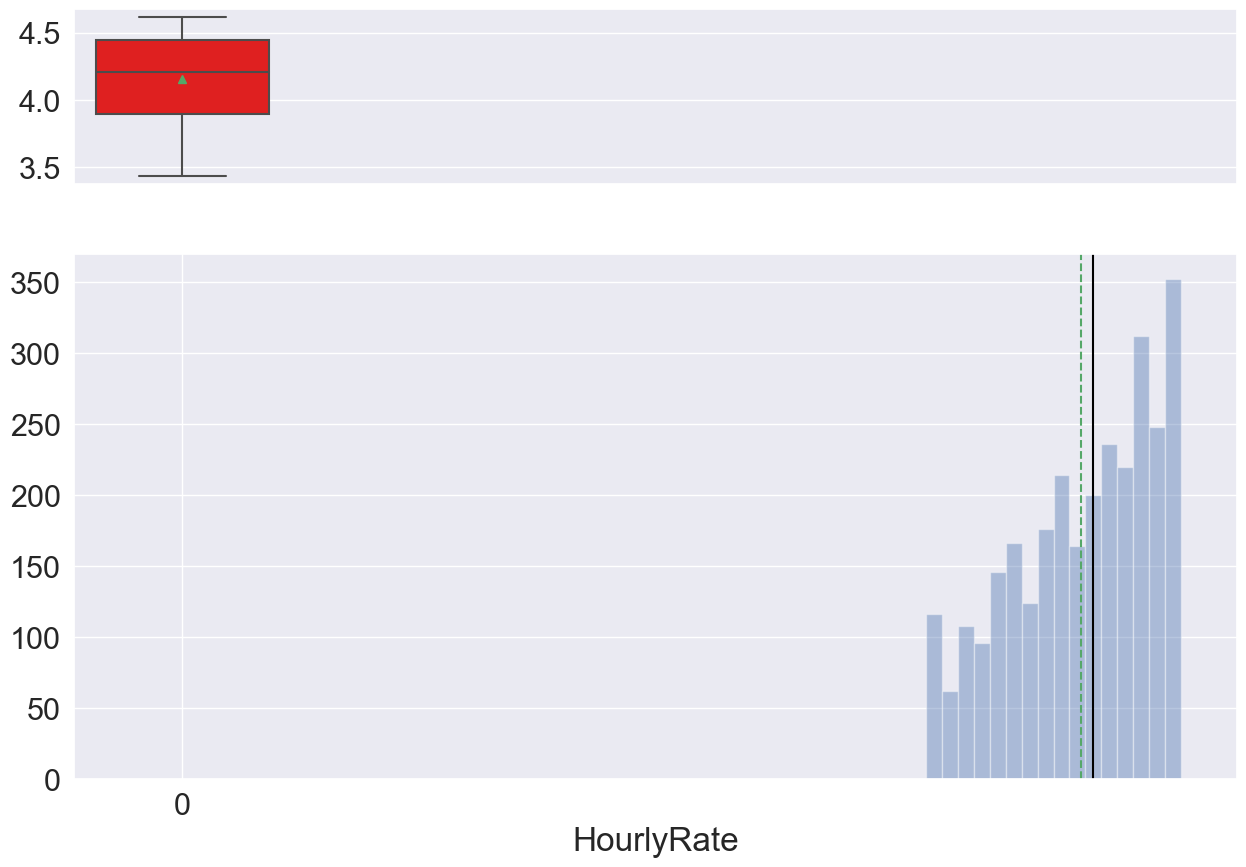

In [38]:
histogram_boxplot(np.log1p(df.HourlyRate))

**observations:**

The distribution is right-skewed, meaning there are more employees with lower hourly rates than those with higher rates. This suggests that a majority of the employees have hourly rates below the median.

Perform the log transformations to remove the outliers.

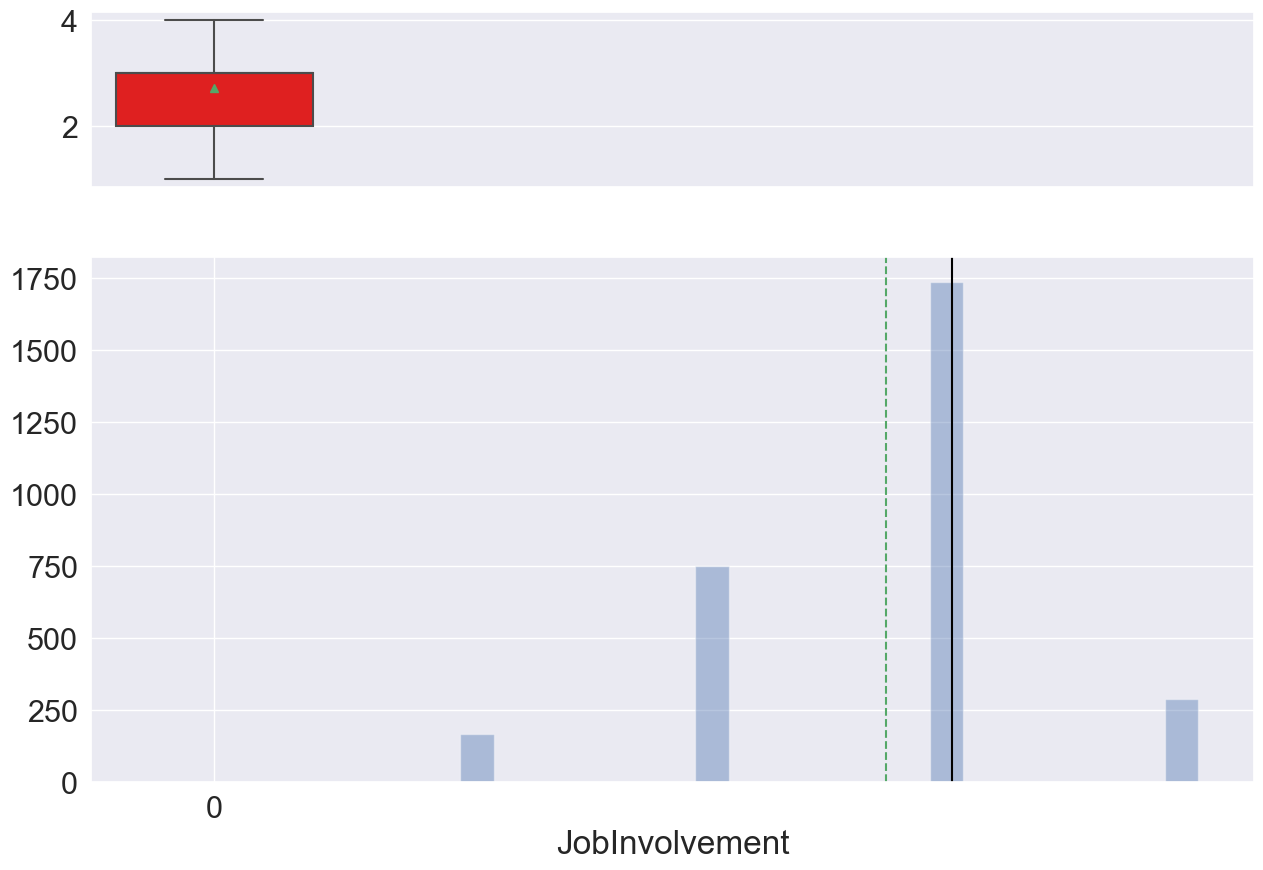

In [39]:
histogram_boxplot(df.JobInvolvement)

**observations:**

The distribution appears to be left-skewed, meaning there are more employees with higher levels of job involvement compared to those with lower levels. This suggests that a majority of employees are fairly involved in their jobs.

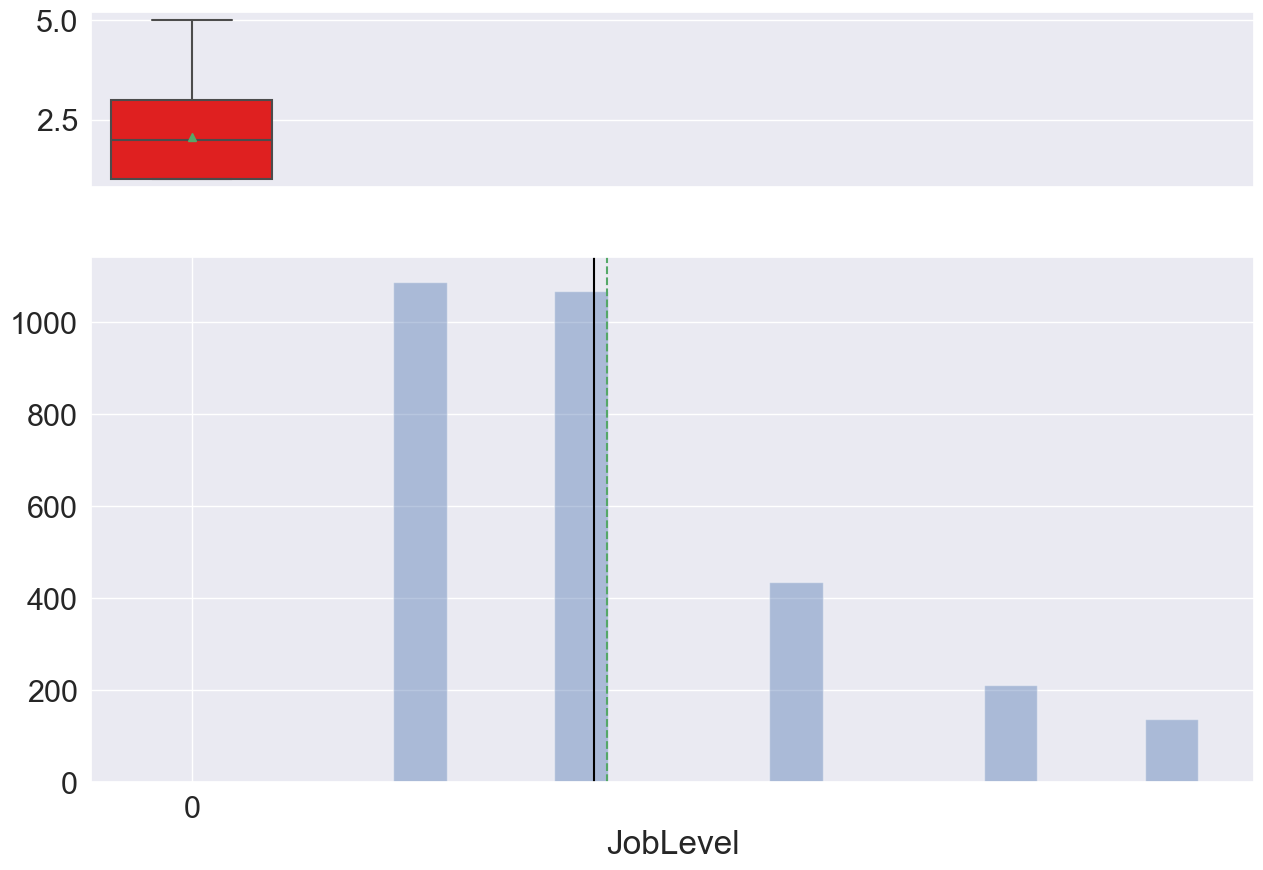

In [40]:
histogram_boxplot(df.JobLevel)

**observations:**

The distribution appears to be categorical, meaning it shows the number of employees in each job level rather than a continuous range of values.

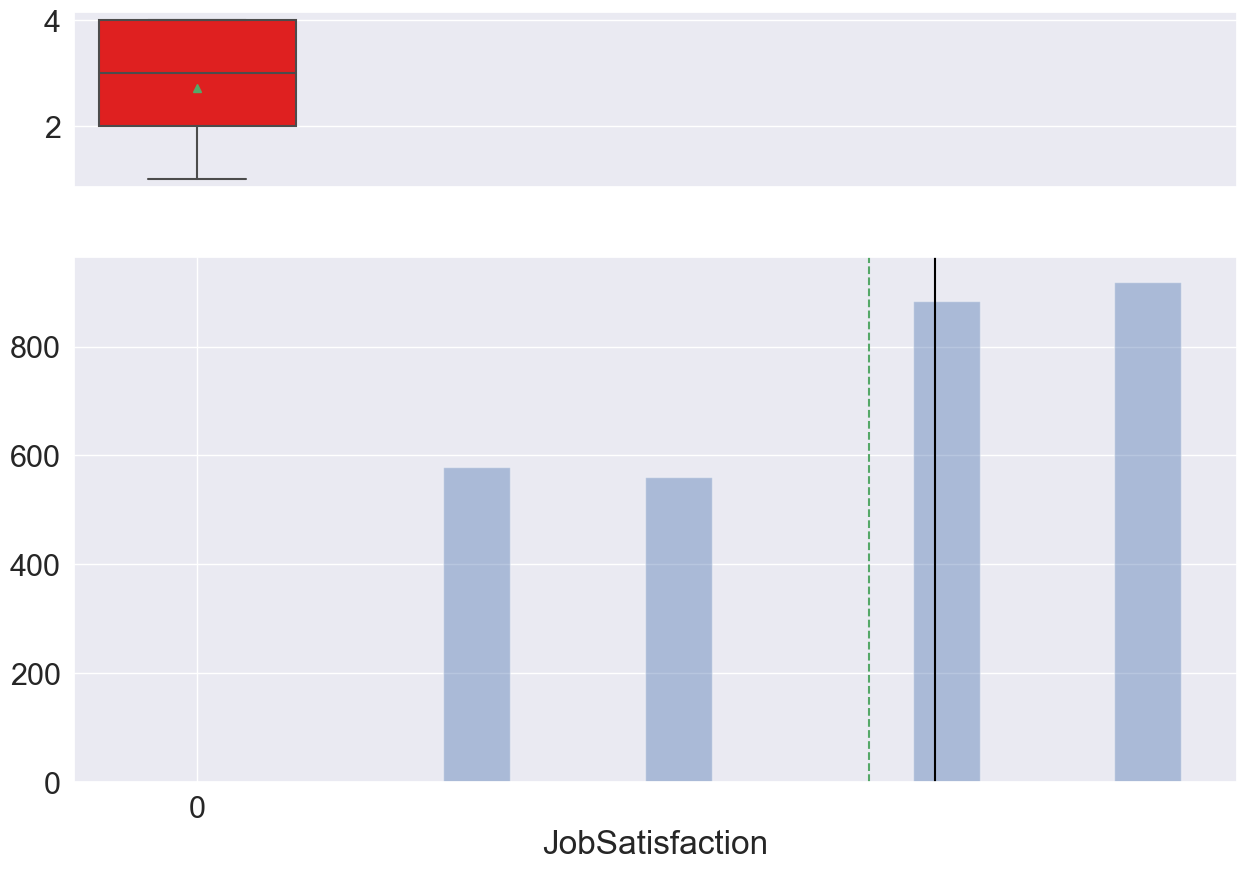

In [41]:
histogram_boxplot(df.JobSatisfaction)

**observations:**
The distribution of job satisfaction scores is right-skewed, meaning there are more people who are satisfied with their jobs than dissatisfied.

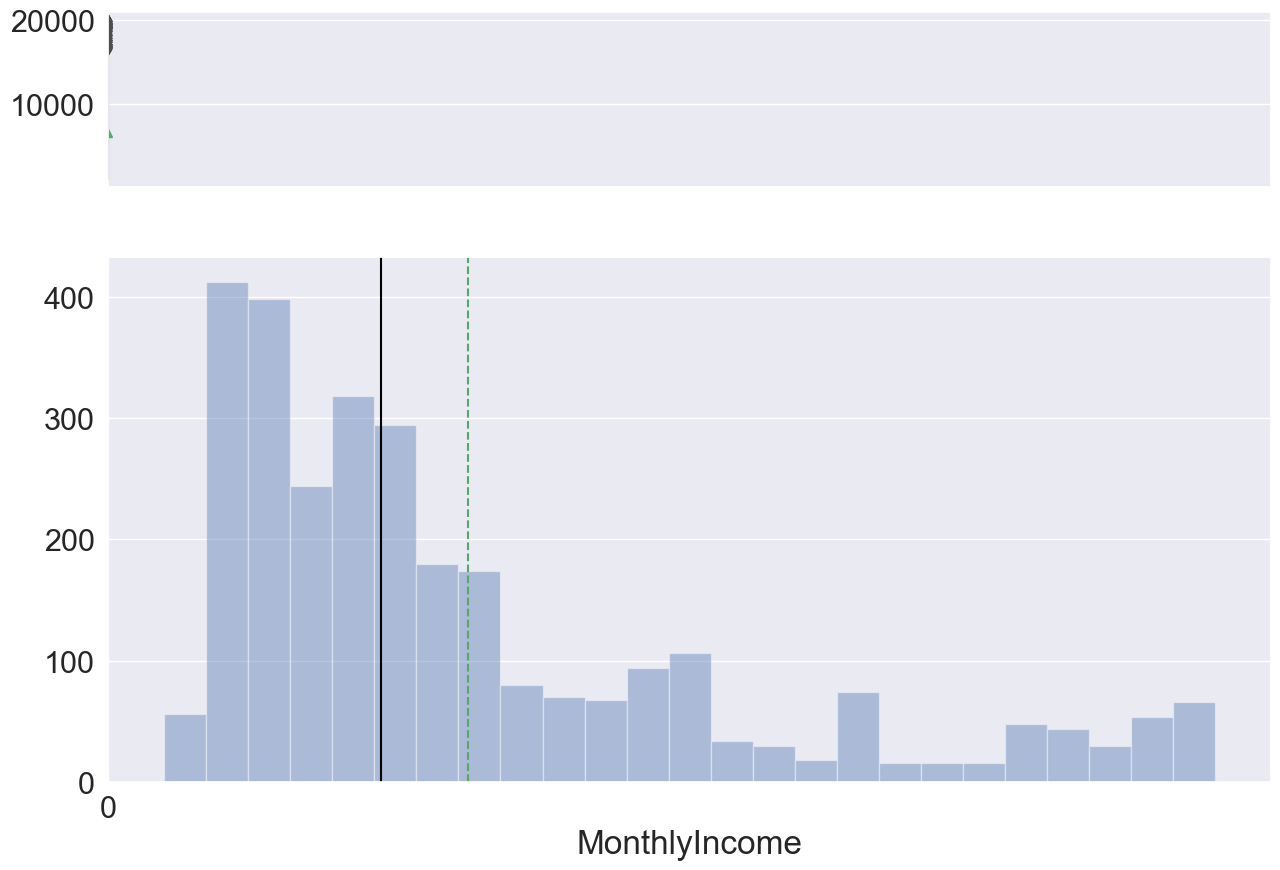

In [42]:
histogram_boxplot(df.MonthlyIncome)

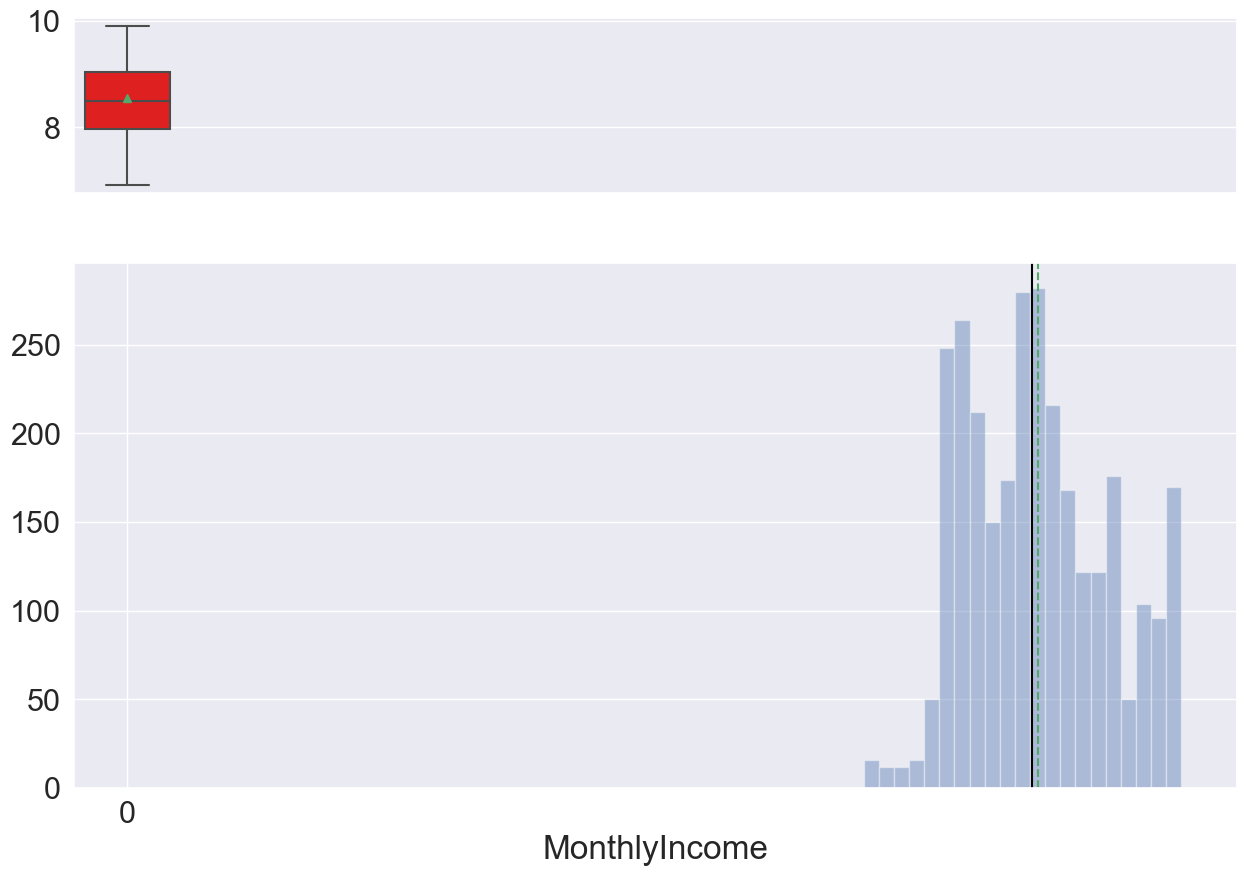

In [43]:
histogram_boxplot(np.log1p(df.MonthlyIncome))

**observations:**
The spread of the distribution is left-skewed, meaning there are more people who have a lower monthly income than those who have a higher monthly income. This is evident from the longer tail on the left side of the histogram.

Perform log transformations to remove the outliers and visualize data correctly.

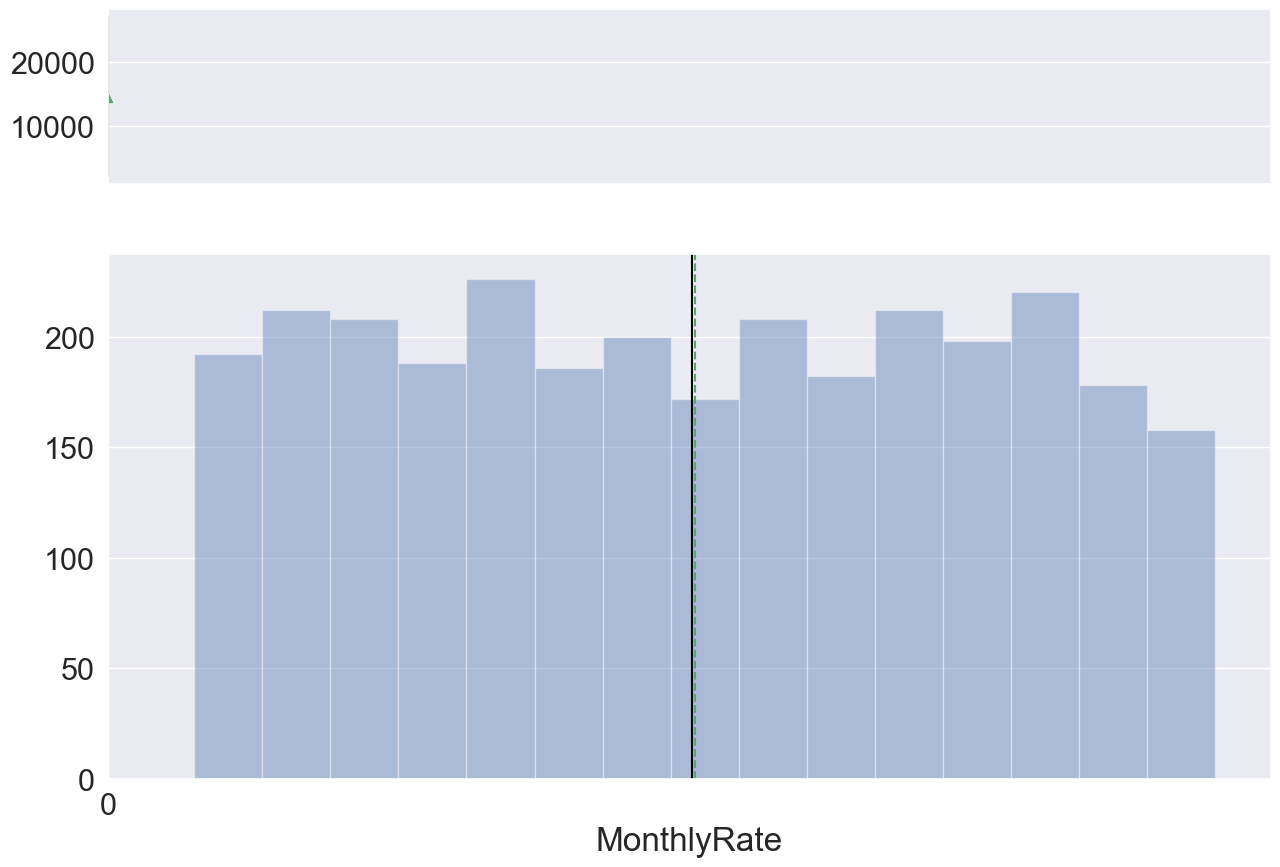

In [44]:
histogram_boxplot(df.MonthlyRate)

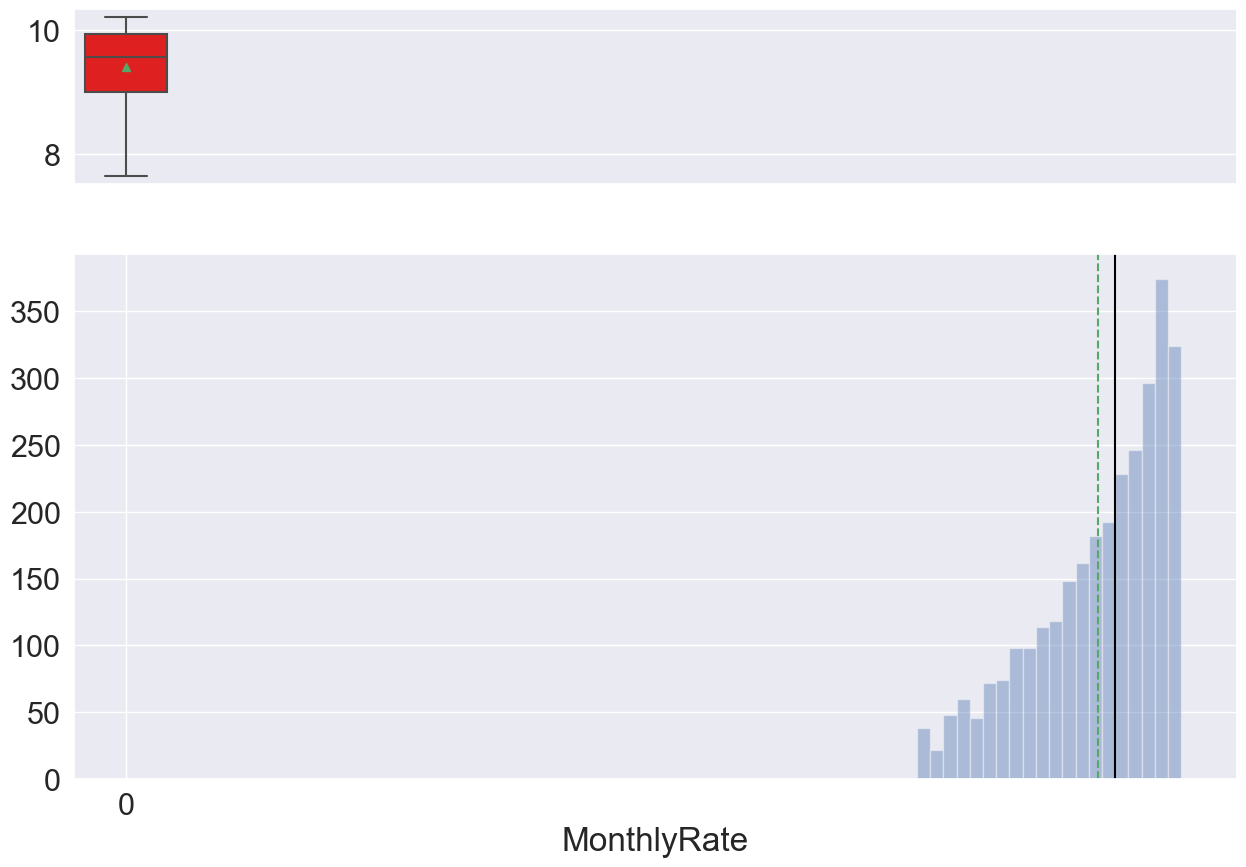

In [45]:
histogram_boxplot(np.log1p(df.MonthlyRate))

**obseravtions:**
The spread of the distribution is slightly left-skewed, meaning there are slightly more people who have a lower monthly rate than those who have a higher monthly rate. This is evident from the slightly longer tail on the left side of the histogram.

Perform log transformations to visualize the data correctly.

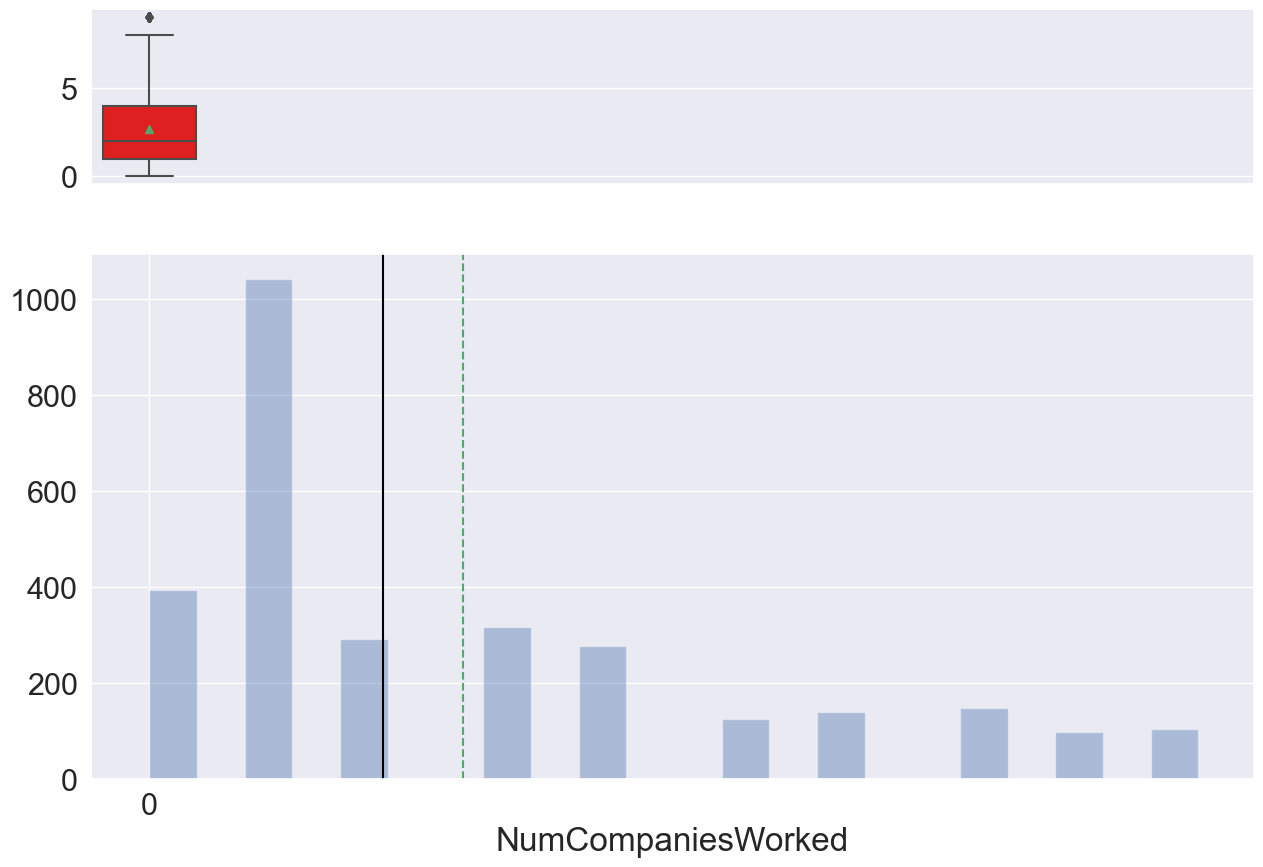

In [46]:
histogram_boxplot(df.NumCompaniesWorked)

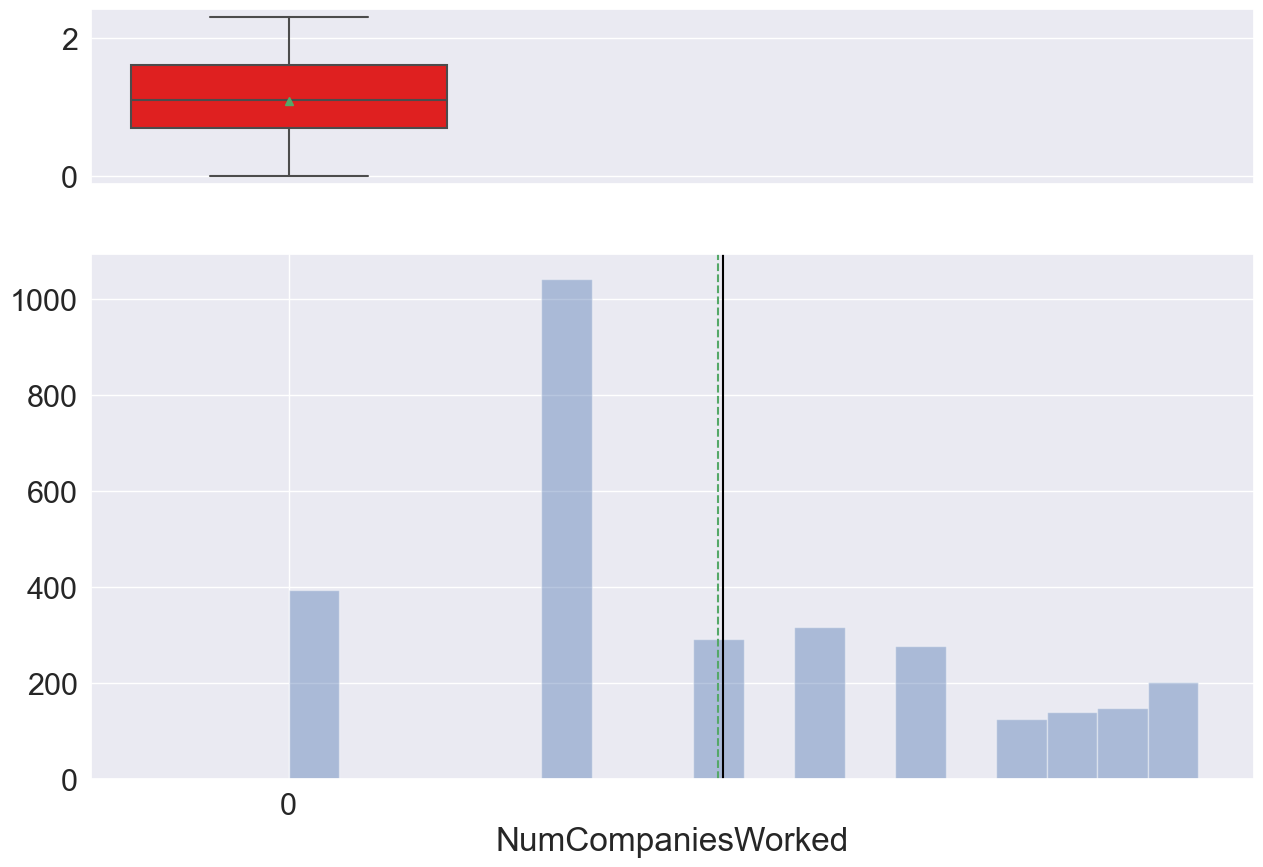

In [47]:
histogram_boxplot(np.log1p(df.NumCompaniesWorked))

**observations:**
he distribution of the number of companies worked is right-skewed, meaning there are more people who have worked at zero or one company than those who have worked at many companies.

Perform the log transformaions to remove the outliers and visualize data correctly.

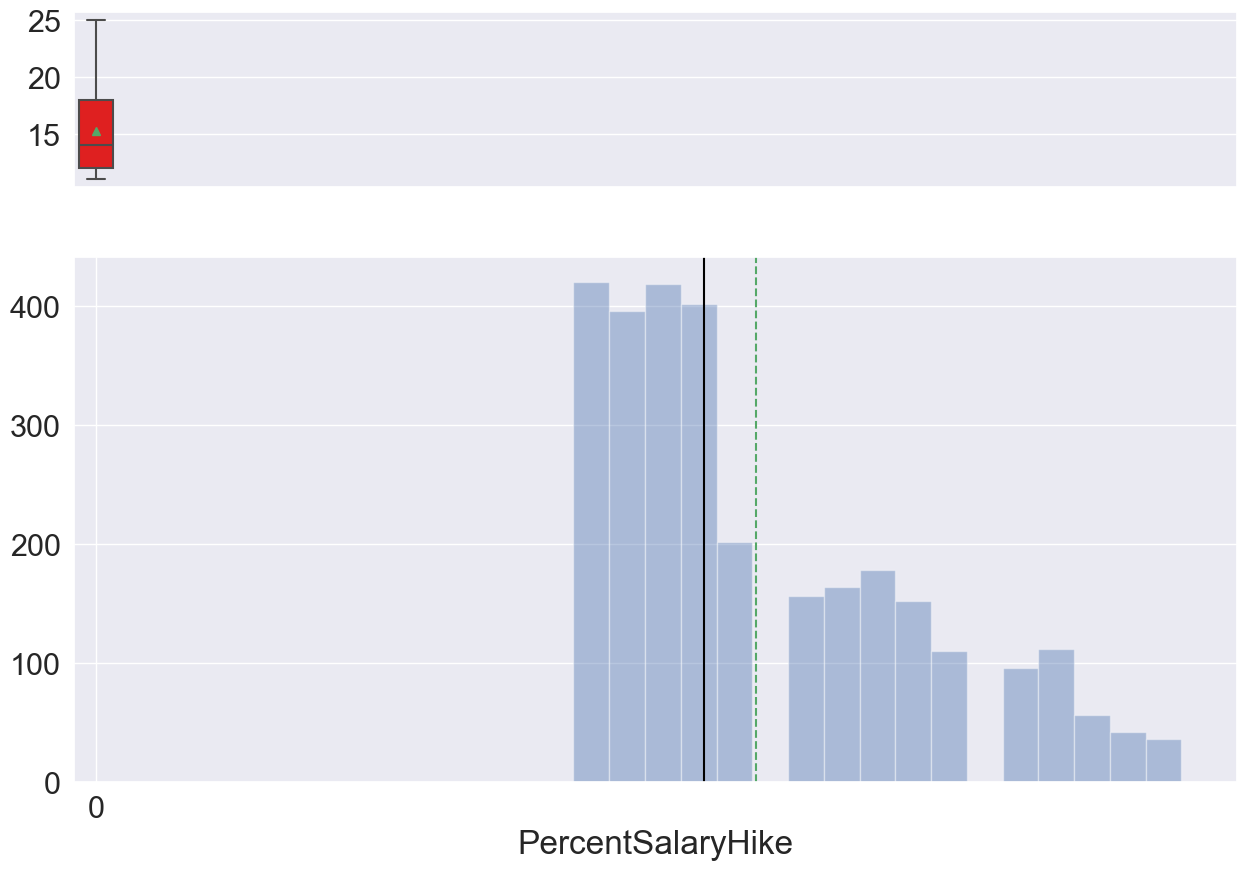

In [48]:
histogram_boxplot(df.PercentSalaryHike)

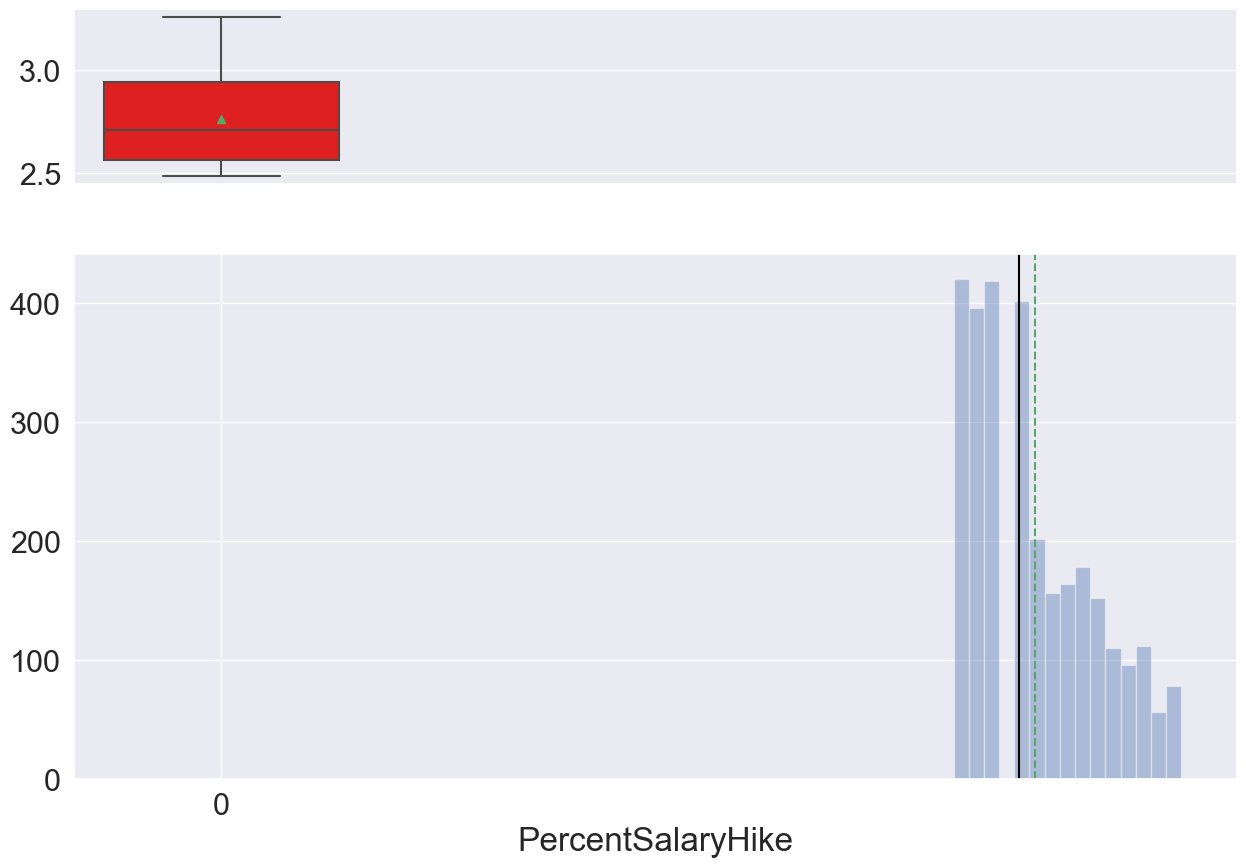

In [49]:
histogram_boxplot(np.log1p(df.PercentSalaryHike))

**observations:**
The distribution of percentage salary hike is right-skewed, meaning there are more people who received a lower percentage salary hike than those who received a higher percentage salary hike. This is evident from the longer tail on the right side of the histogram.

perform the log transformations to remove the outliers.

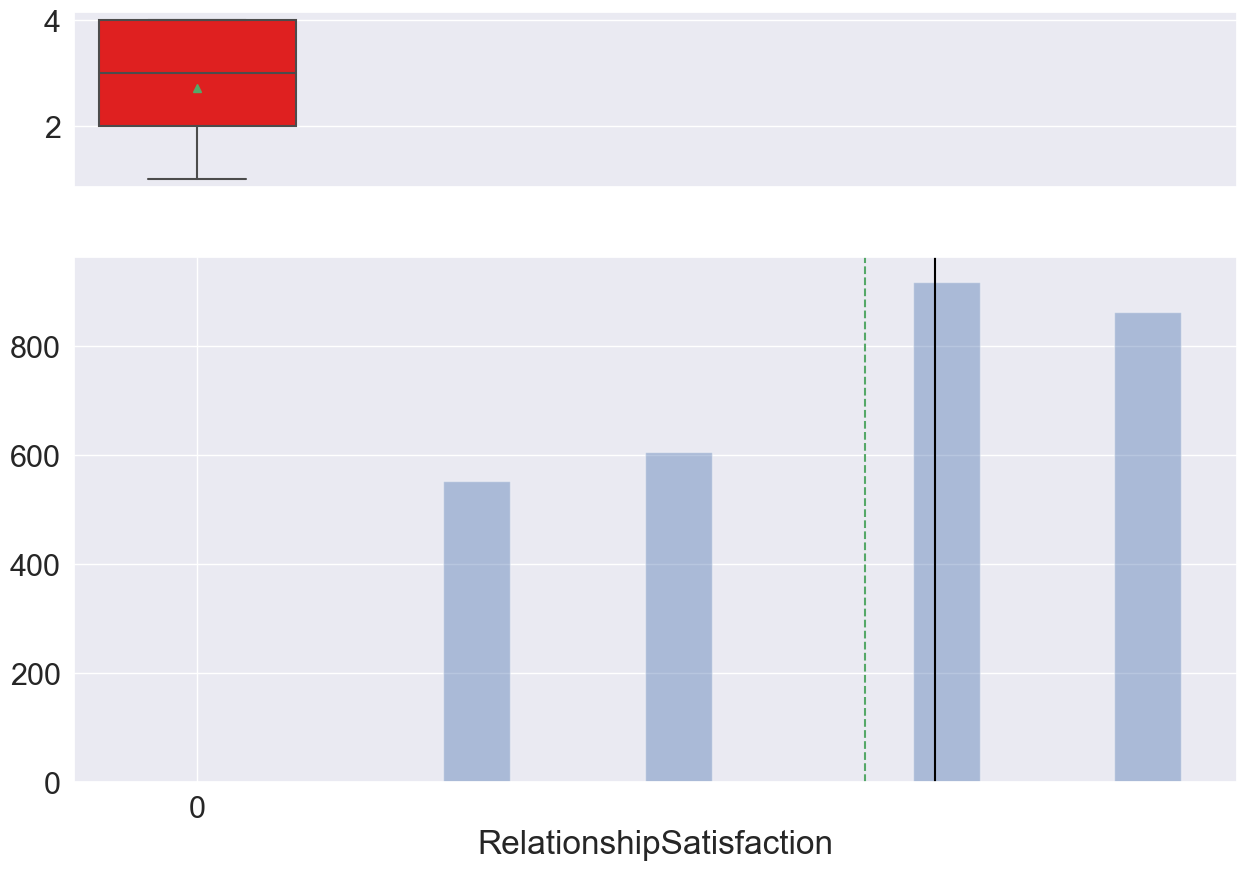

In [50]:
histogram_boxplot(df.RelationshipSatisfaction)

**observations:**
The distribution of relationship satisfaction scores is bimodal, meaning it has two peaks. One peak is around 200 and the other is around 600. This suggests that there are two groups of people in the data, one group with relatively low relationship satisfaction and another group with relatively high relationship satisfaction.

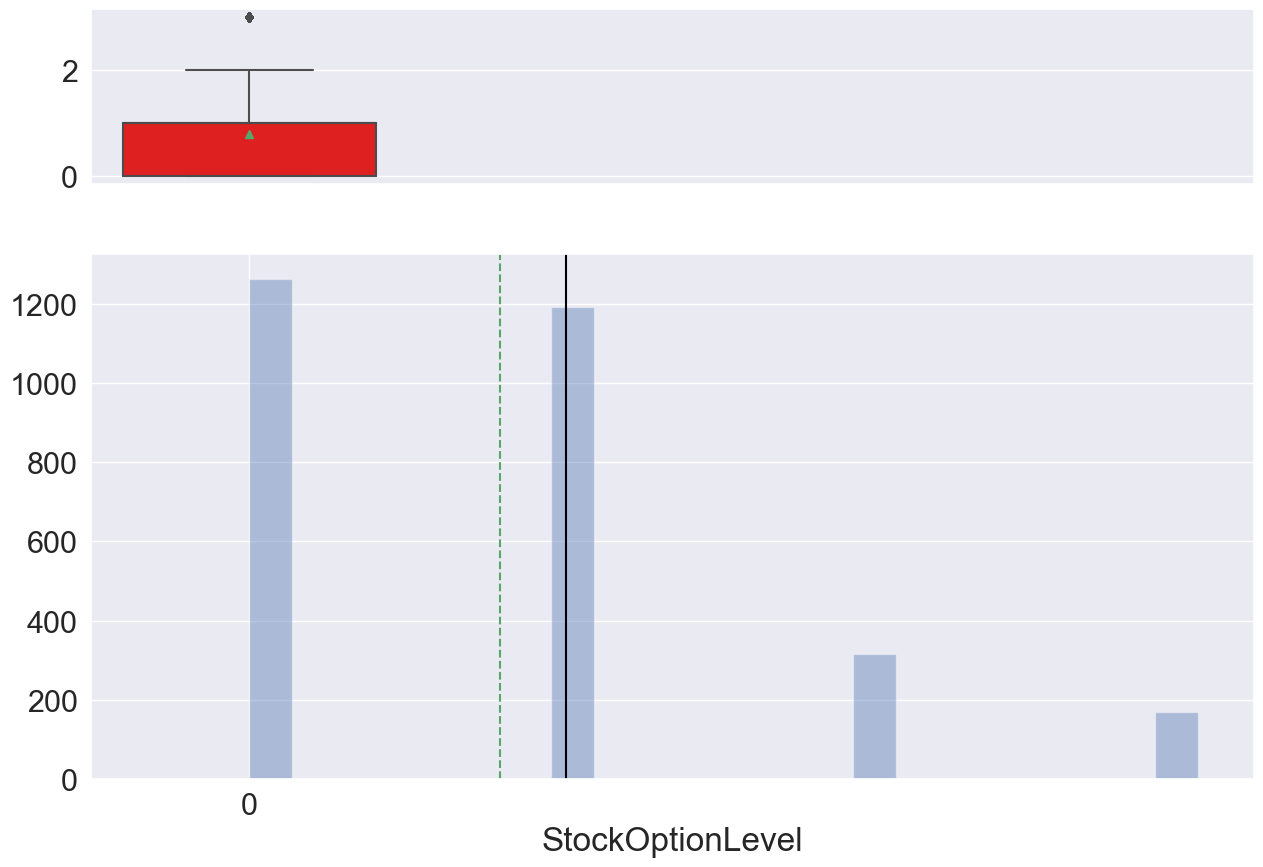

In [51]:
histogram_boxplot(df.StockOptionLevel)

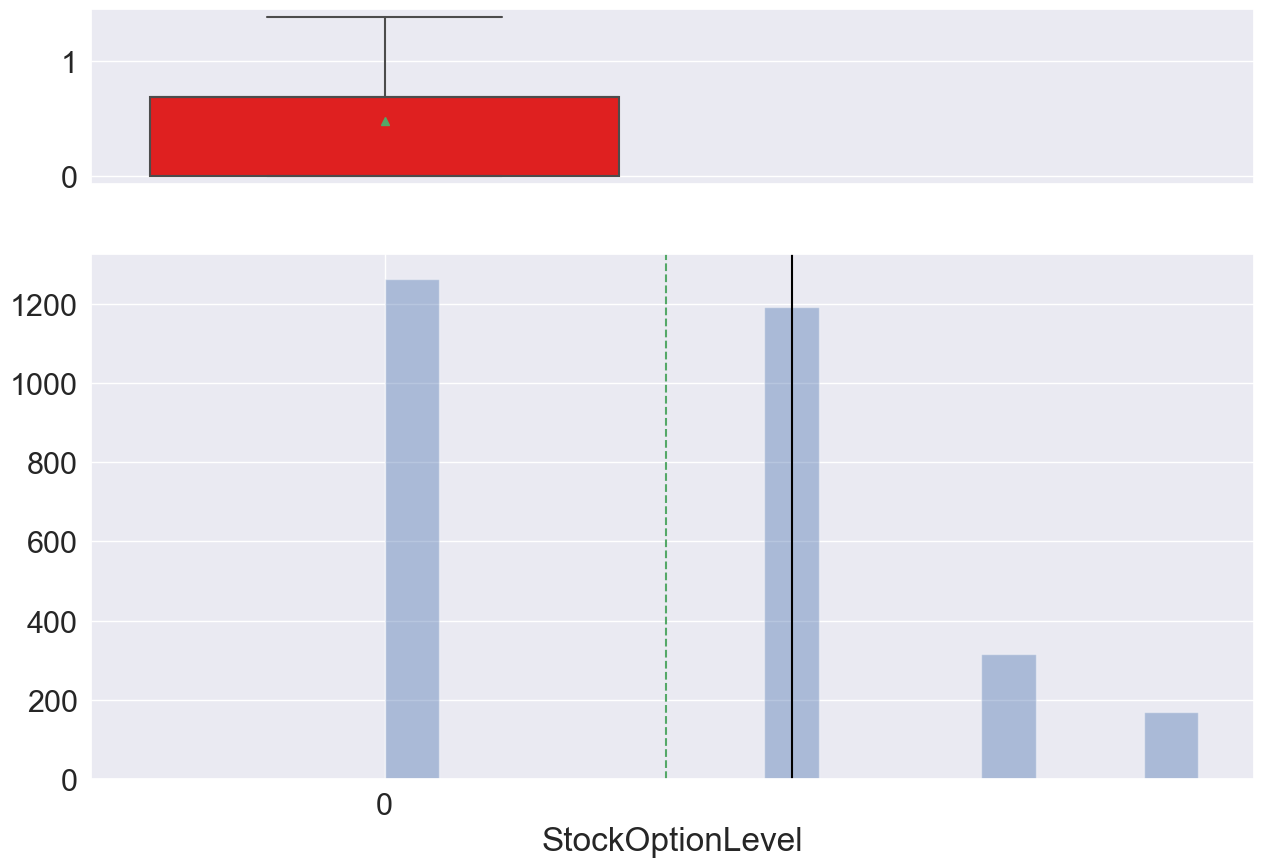

In [52]:
histogram_boxplot(np.log1p(df.StockOptionLevel))

**observations:**
The distribution of stock option level is right-skewed, meaning there are more stock options that have been traded at lower levels than at higher levels. This is evident from the longer tail on the right side of the histogram.

Perform the log transformations to remove the outliers and visualize data correctly.

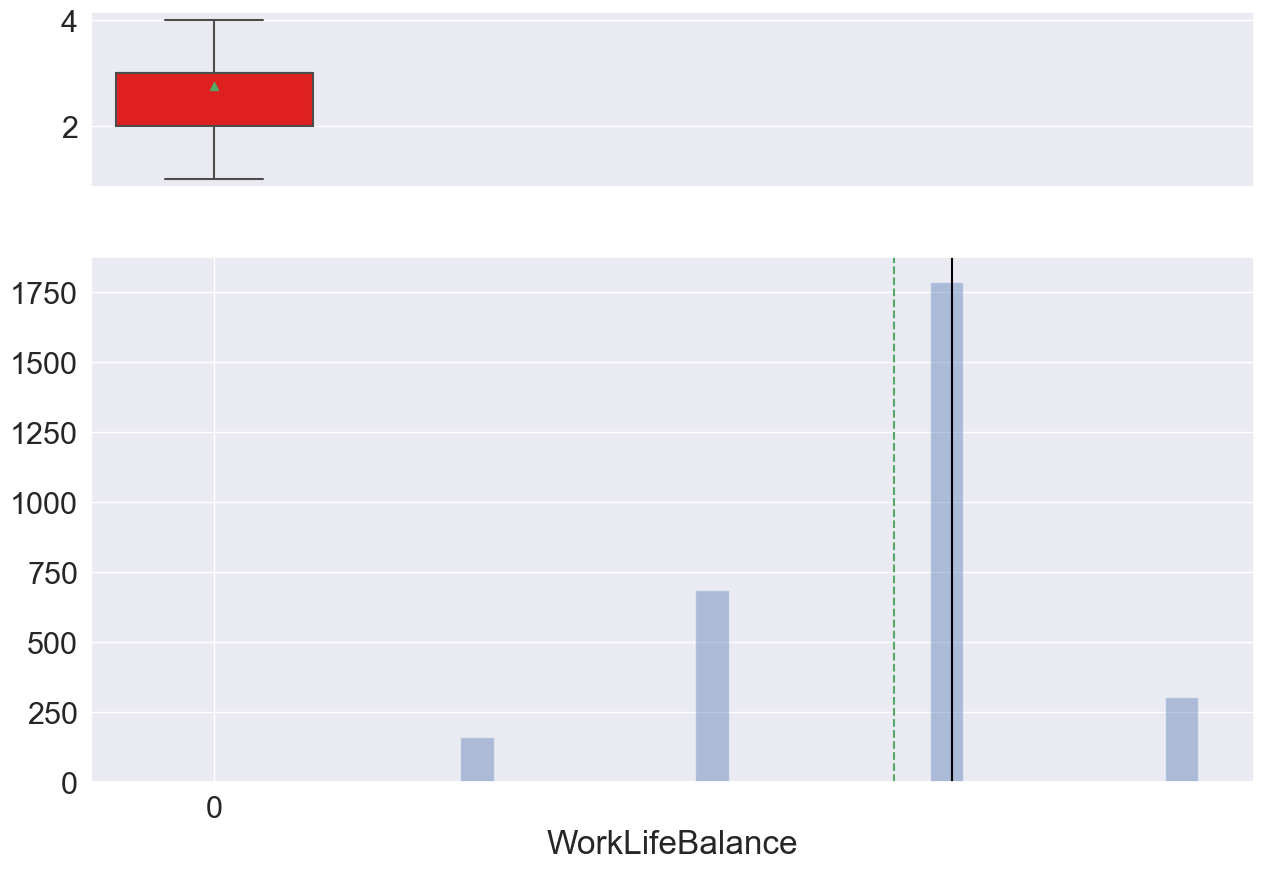

In [53]:
histogram_boxplot(df.WorkLifeBalance)

**observations:** The distribution of work-life balance scores is right-skewed, meaning there are more people who reported having a better work-life balance than those who reported having a poor work-life balance. This is evident from the longer tail on the right side of the histogram.

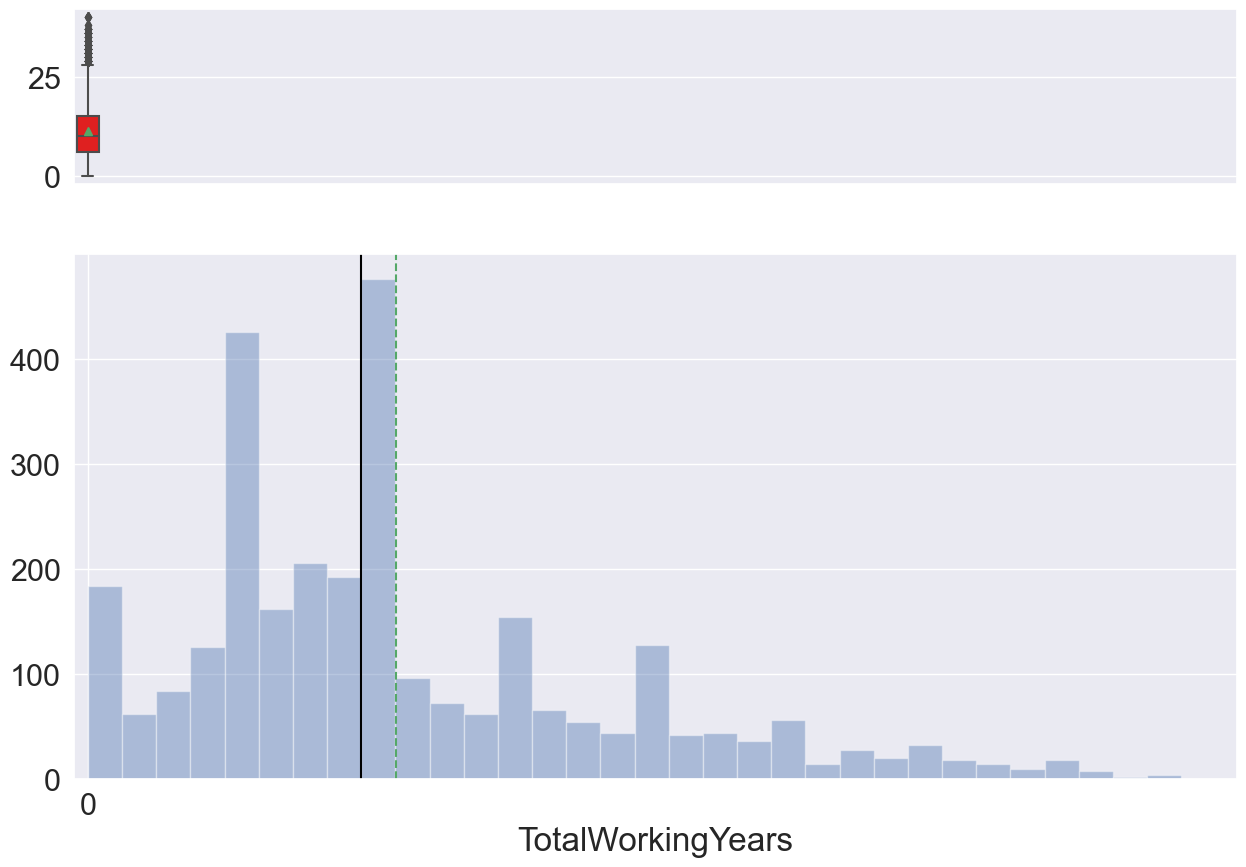

In [54]:
histogram_boxplot(df.TotalWorkingYears)

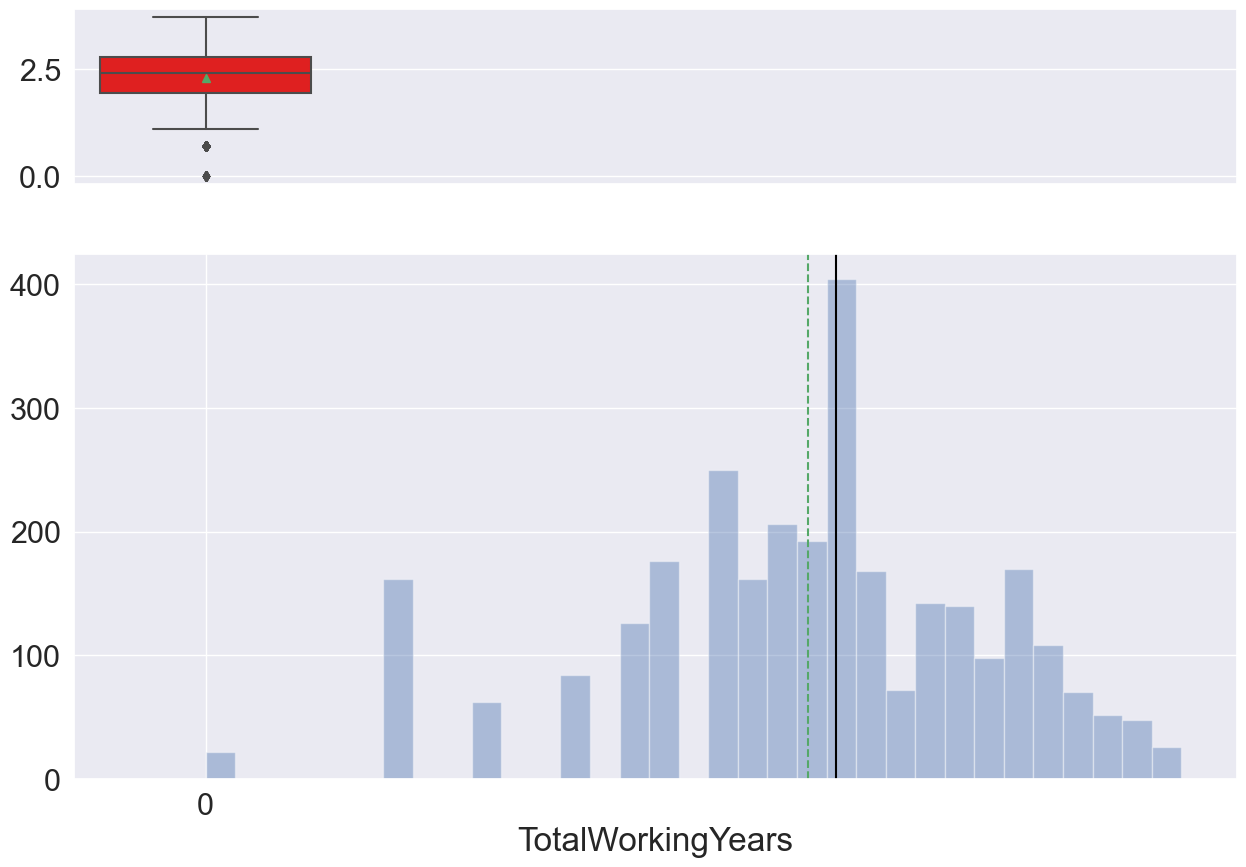

In [55]:
histogram_boxplot(np.log1p(df.TotalWorkingYears))

**observations:**
The distribution of total working years is right-skewed, meaning there are more people who have worked for fewer years than those who have worked for many years. This is evident from the longer tail on the right side of the histogram.

Perform the log transfomations to remove the outliers.

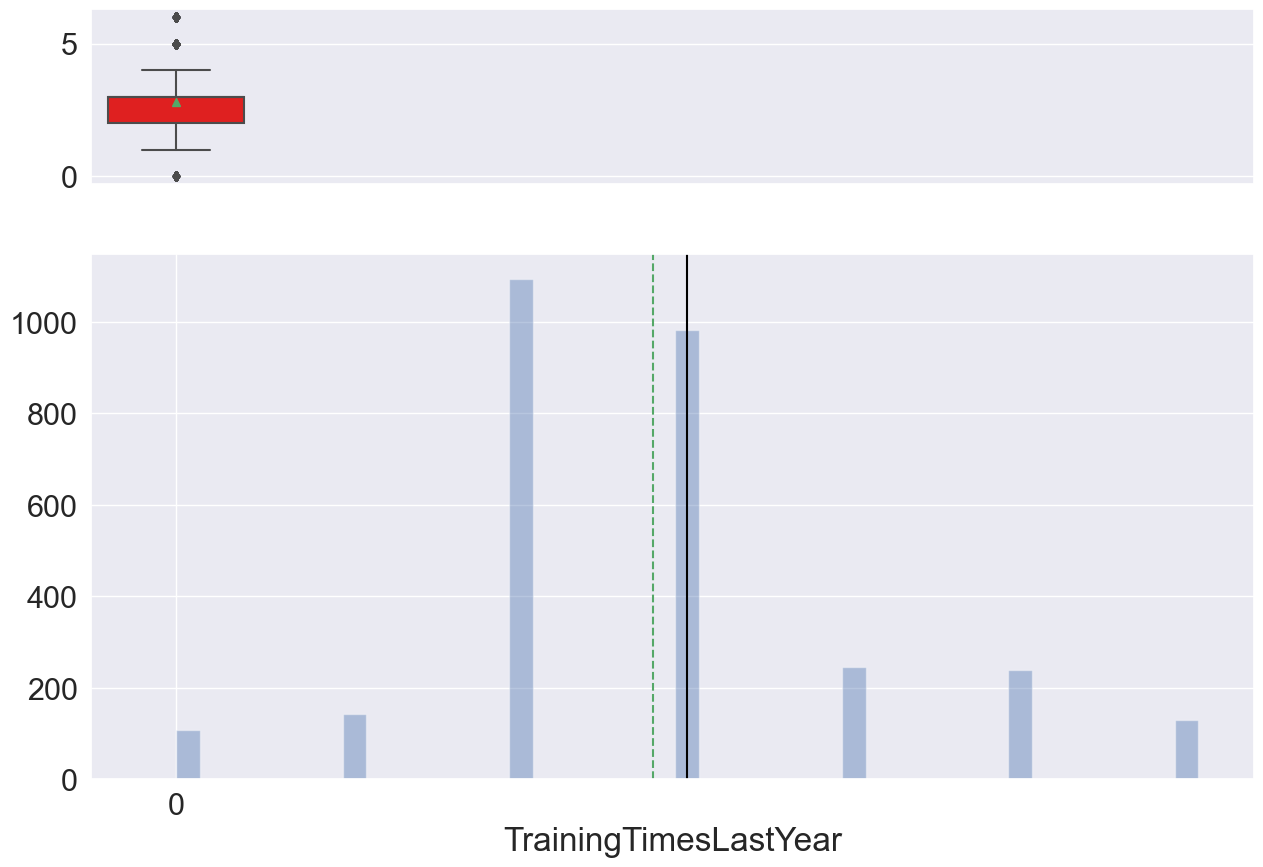

In [56]:
histogram_boxplot(df.TrainingTimesLastYear)

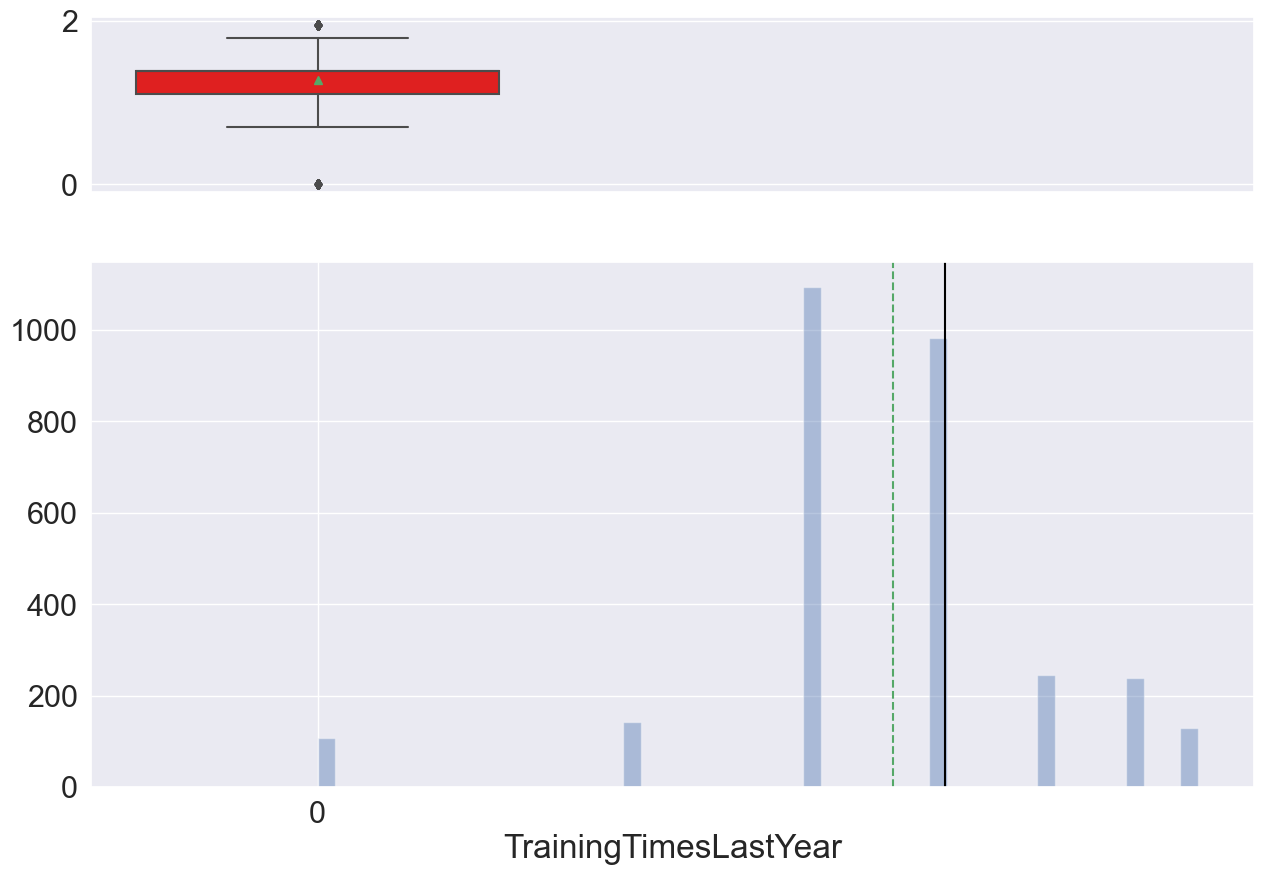

In [57]:
histogram_boxplot(np.log1p(df.TrainingTimesLastYear))

**observations:**
The distribution of training times last year is right-skewed, meaning there were more employees who had fewer training times last year than those who had many training times last year. This is evident from the longer tail on the right side of the histogram.

 Perform the log transformations to remove the outliers.

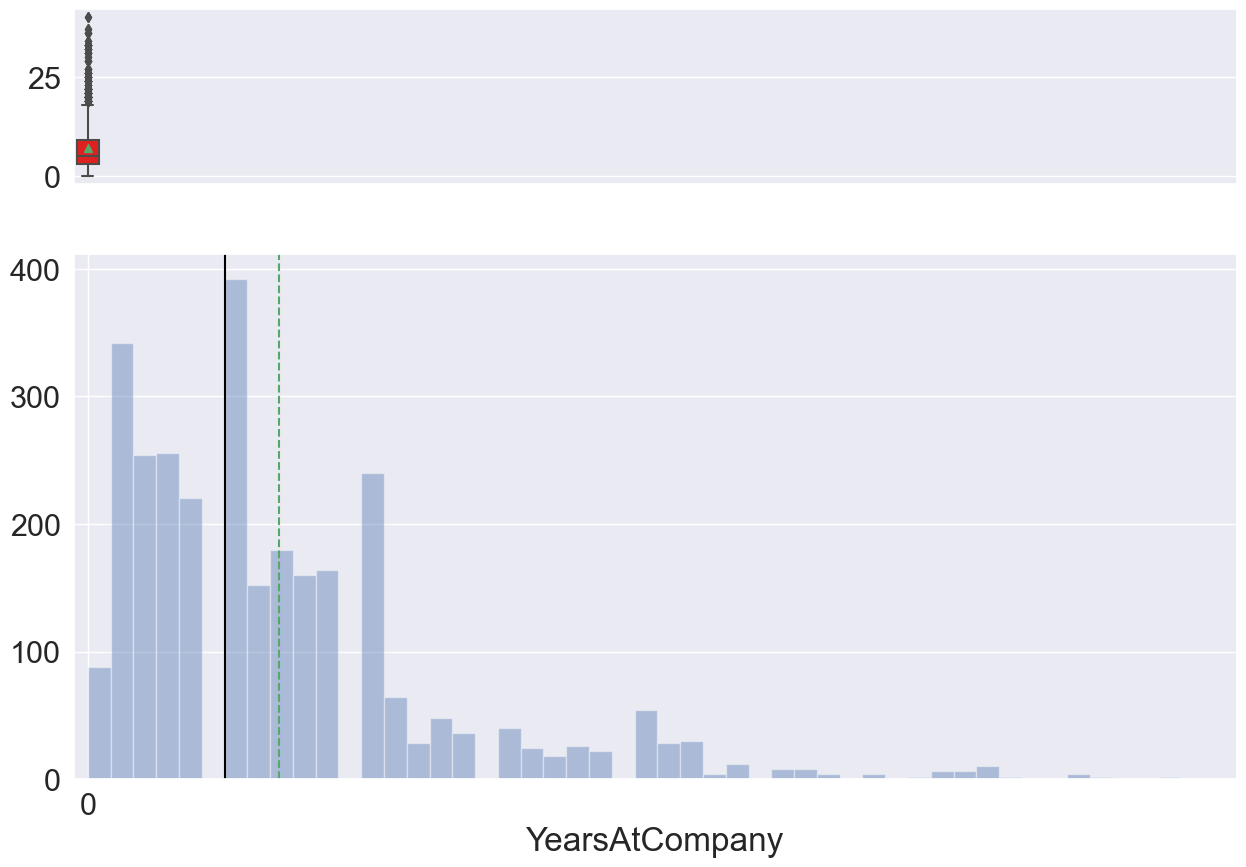

In [58]:
histogram_boxplot(df.YearsAtCompany)

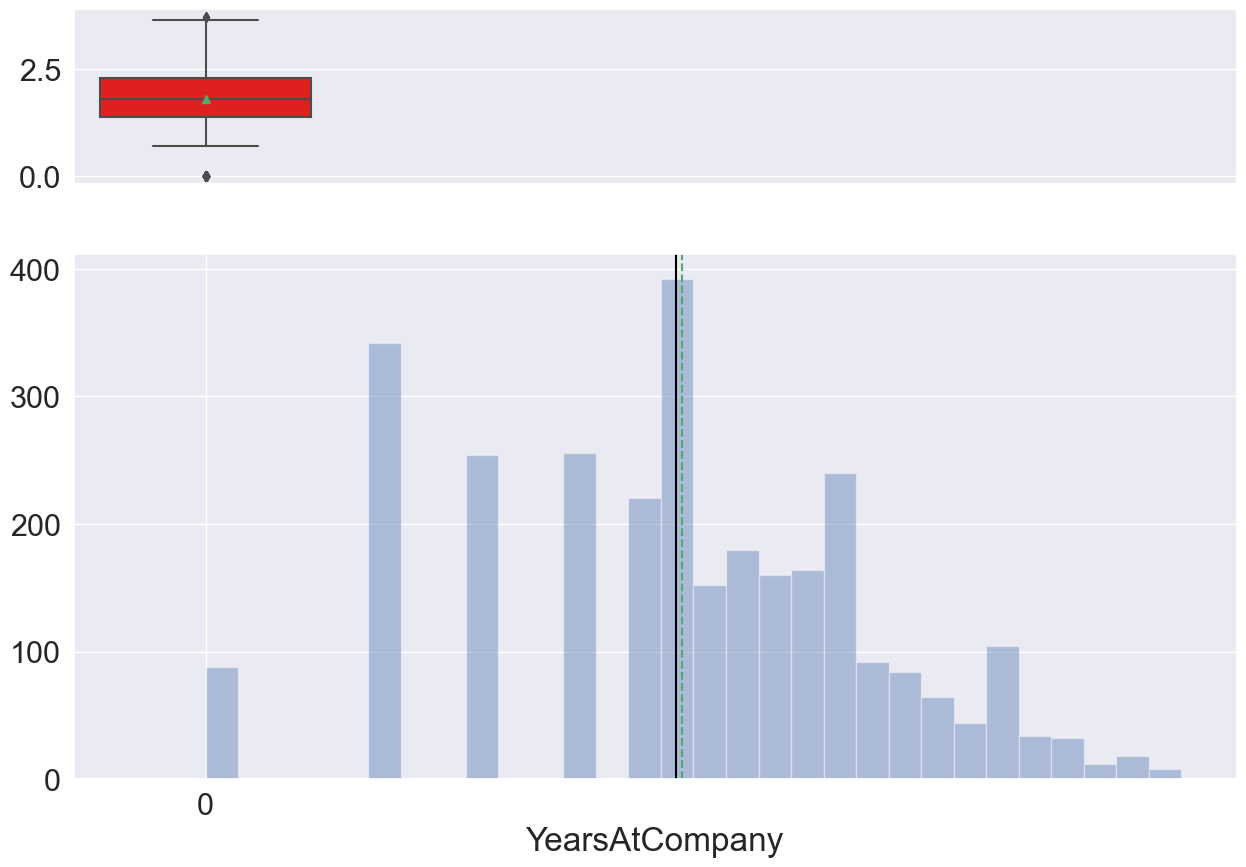

In [59]:
histogram_boxplot(np.log1p(df.YearsAtCompany))

**observations:**
The distribution of years at company is right-skewed, meaning there are more employees who have worked for the company for fewer years than those who have worked for the company for many years. This is evident from the longer tail on the right side of the histogram.

Perform the log transformations to remove the outliers.

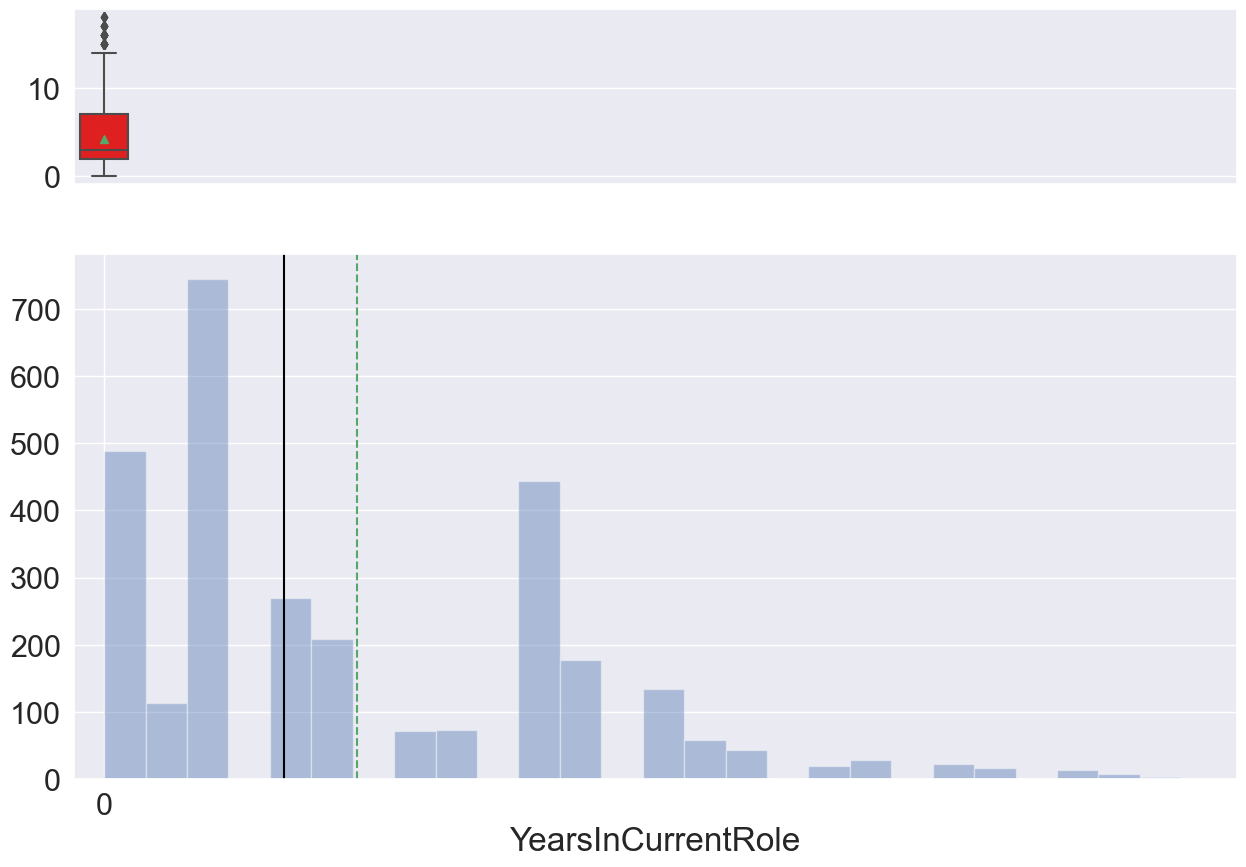

In [60]:
histogram_boxplot(df.YearsInCurrentRole)

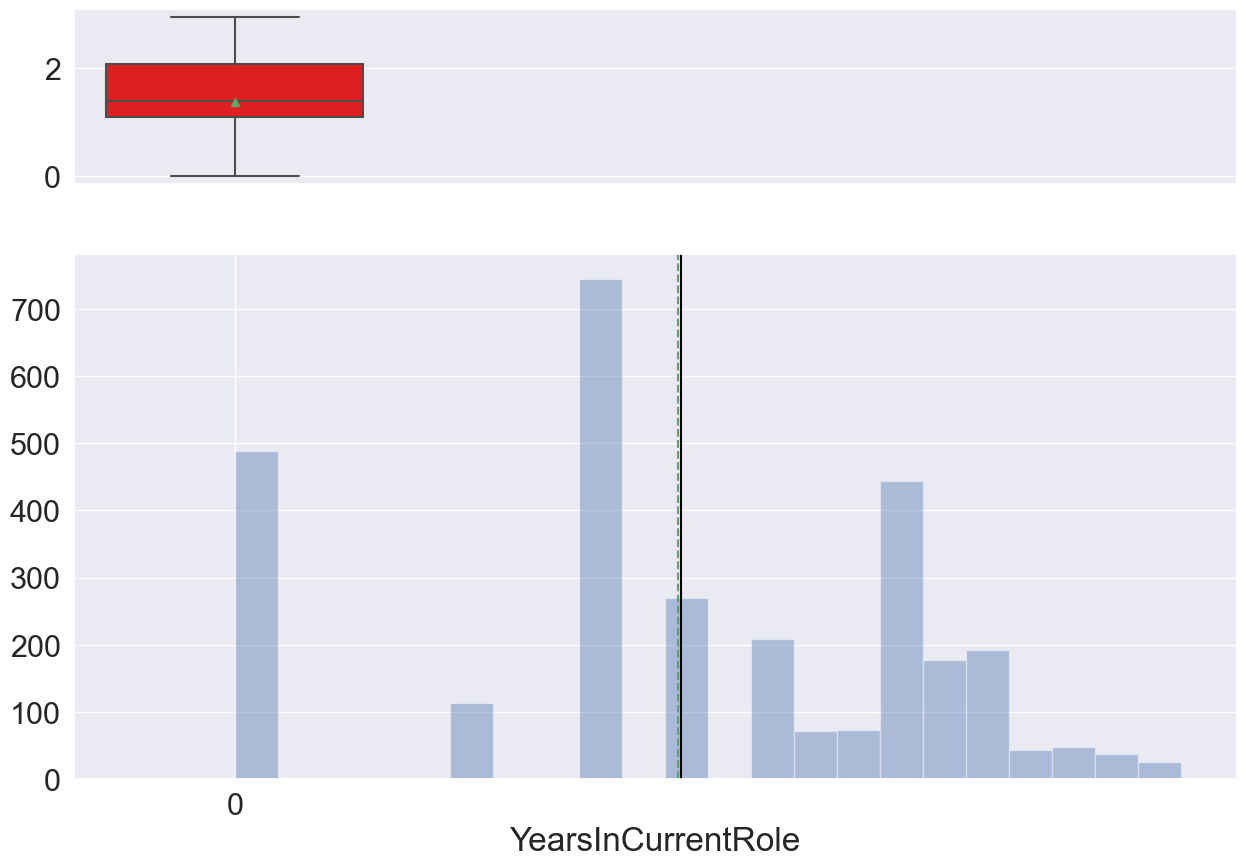

In [61]:
histogram_boxplot(np.log1p(df.YearsInCurrentRole))

**observations:**
The distribution of years in current role is right-skewed, meaning there are more people who have been in their current role for fewer years than those who have been in their current role for many years. This is evident from the longer tail on the right side of the histogram.

perform the log transformations to remove the outliers.

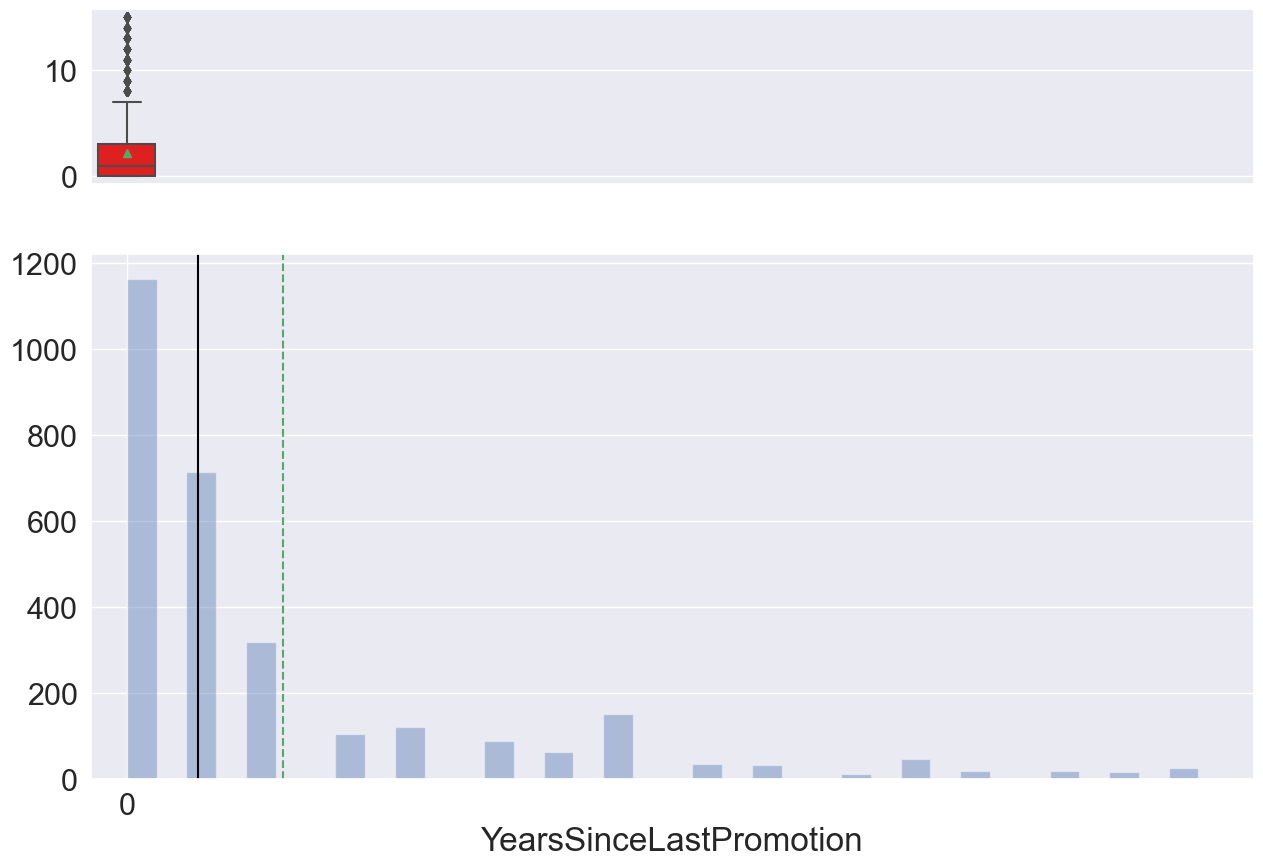

In [62]:
histogram_boxplot(df.YearsSinceLastPromotion)

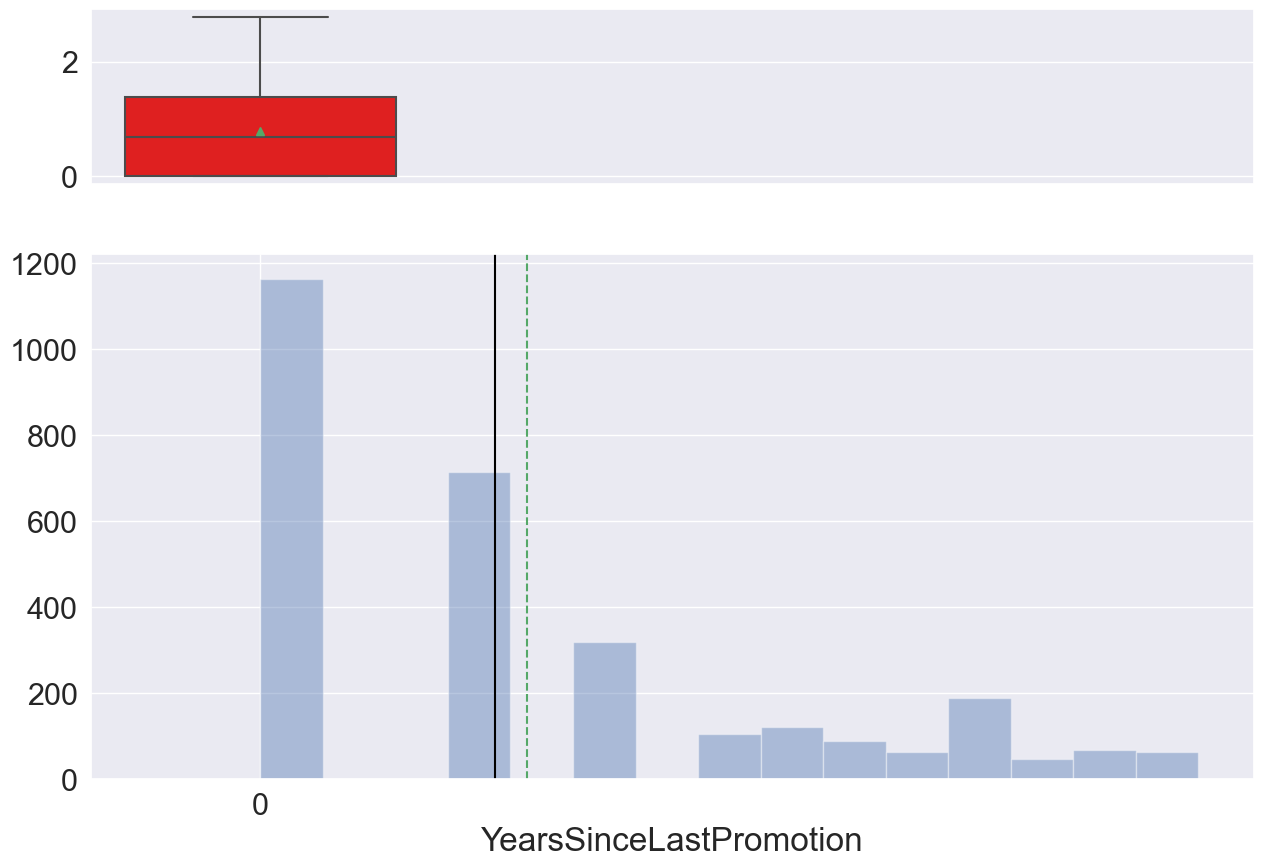

In [63]:
histogram_boxplot(np.log1p(df.YearsSinceLastPromotion))

**observations:**
The distribution of years since last promotion is right-skewed, meaning there are more people who have not been promoted in a long time than those who have been promoted recently. This is evident from the longer tail on the right side of the histogram.

perform the log transformations to remove the outliers.

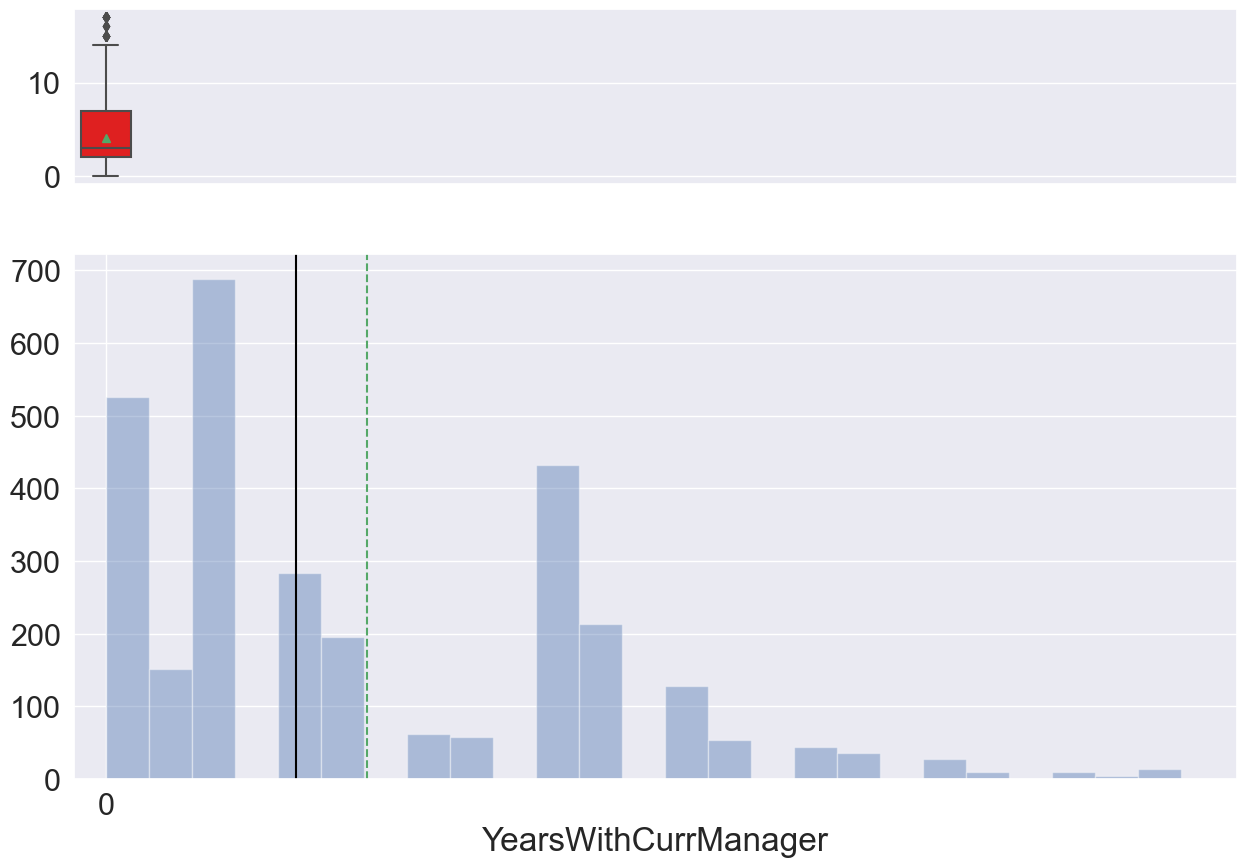

In [64]:
histogram_boxplot(df.YearsWithCurrManager)

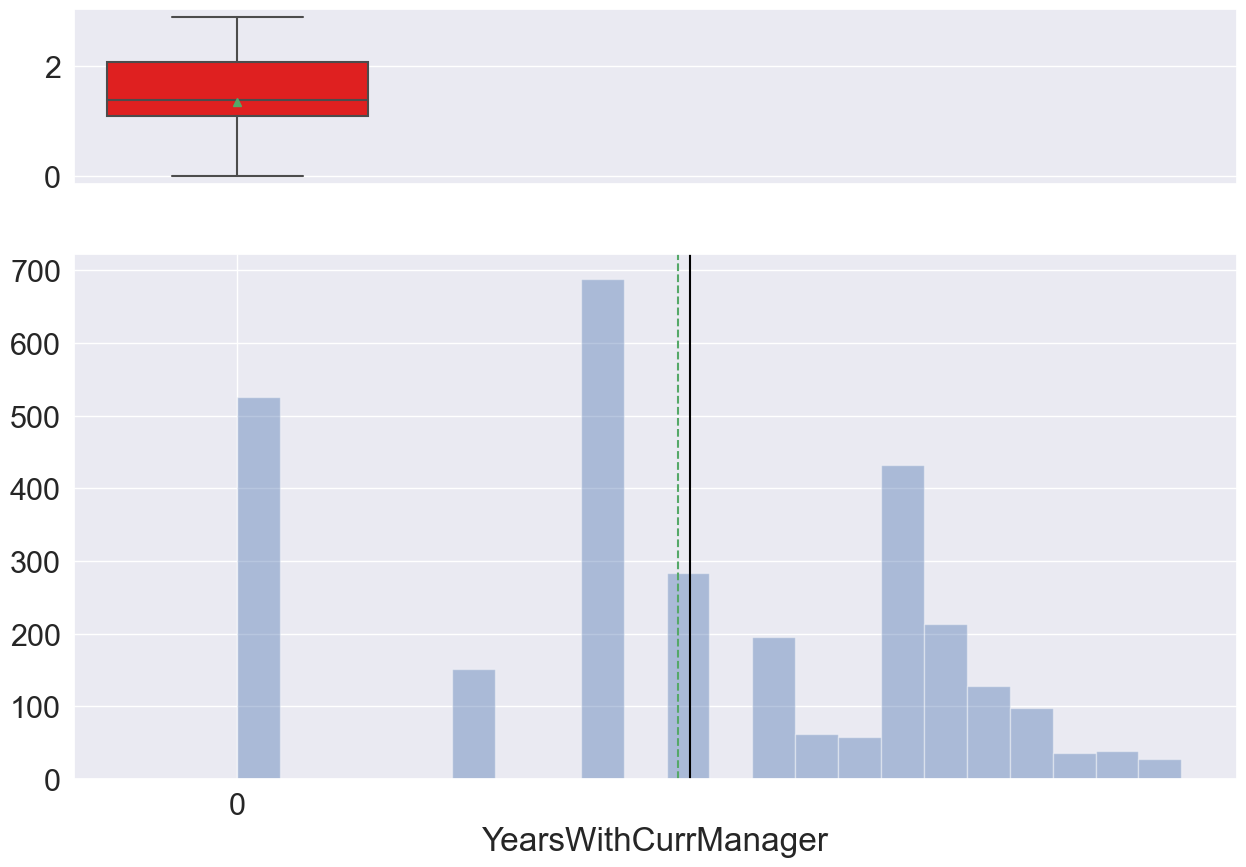

In [65]:
histogram_boxplot(np.log1p(df.YearsWithCurrManager))

**observations:**
The distribution of years with the current manager is right-skewed, meaning there are more employees who have worked with their current manager for fewer years than those who have worked with their current manager for many years. This is evident from the longer tail on the right side of the histogram.

Perform the log tranmsformations to remove the outliers.

<font color = "blue" size = 4>Correlation </font>

In [66]:
correlation = df.corr()
correlation

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000      0.011            -0.002      0.208   
DailyRate                 0.011      1.000            -0.005     -0.017   
DistanceFromHome         -0.002     -0.005             1.000      0.021   
Education                 0.208     -0.017             0.021      1.000   
EnvironmentSatisfaction   0.010      0.018            -0.016     -0.027   
HourlyRate                0.024      0.023             0.031      0.017   
JobInvolvement            0.030      0.046             0.009      0.042   
JobLevel                  0.510      0.003             0.005      0.102   
JobSatisfaction          -0.005      0.031            -0.004     -0.011   
MonthlyIncome             0.498      0.008            -0.017      0.095   
MonthlyRate               0.028     -0.032             0.027     -0.026   
NumCompaniesWorked        0.300      0.038            -0.029      0.126   
PercentSalaryHike         0.004      0.023             0.040     -0.011   
PerformanceRating         0.002      0.000             0.027     -0.025   
RelationshipSatisfaction  0.054      0.008             0.007     -0.009   
StockOptionLevel          0.038      0.042             0.045      0.018   
TotalWorkingYears         0.680      0.015             0.005      0.148   
TrainingTimesLastYear    -0.020      0.002            -0.037     -0.025   
WorkLifeBalance          -0.021     -0.038            -0.027      0.010   
YearsAtCompany            0.311     -0.034             0.010      0.069   
YearsInCurrentRole        0.213      0.010             0.019      0.060   
YearsSinceLastPromotion   0.217     -0.033             0.010      0.054   
YearsWithCurrManager      0.202     -0.026             0.014      0.069   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                         0.010       0.024           0.030   
DailyRate                                   0.018       0.023           0.046   
DistanceFromHome                           -0.016       0.031           0.009   
Education                                  -0.027       0.017           0.042   
EnvironmentSatisfaction                     1.000      -0.050          -0.008   
HourlyRate                                 -0.050       1.000           0.043   
JobInvolvement                             -0.008       0.043           1.000   
JobLevel                                    0.001      -0.028          -0.013   
JobSatisfaction                            -0.007      -0.071          -0.021   
MonthlyIncome                              -0.006      -0.016          -0.015   
MonthlyRate                                 0.038      -0.015          -0.016   
NumCompaniesWorked                          0.013       0.022           0.015   
PercentSalaryHike                          -0.032      -0.009          -0.017   
PerformanceRating                          -0.030      -0.002          -0.029   
RelationshipSatisfaction                    0.008       0.001           0.034   
StockOptionLevel                            0.003       0.050           0.022   
TotalWorkingYears                          -0.003      -0.002          -0.006   
TrainingTimesLastYear                      -0.019      -0.009          -0.015   
WorkLifeBalance                             0.028      -0.005          -0.015   
YearsAtCompany                              0.001      -0.020          -0.021   
YearsInCurrentRole                          0.018      -0.024           0.009   
YearsSinceLastPromotion                     0.016      -0.027          -0.024   
YearsWithCurrManager                       -0.005      -0.020           0.026   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                          0.510           -0.005          0.498   
DailyRate                    0.003            0.031          0.008   
DistanceFromHome             0.005           -0.004         -0.017   
Ed

<Axes: >

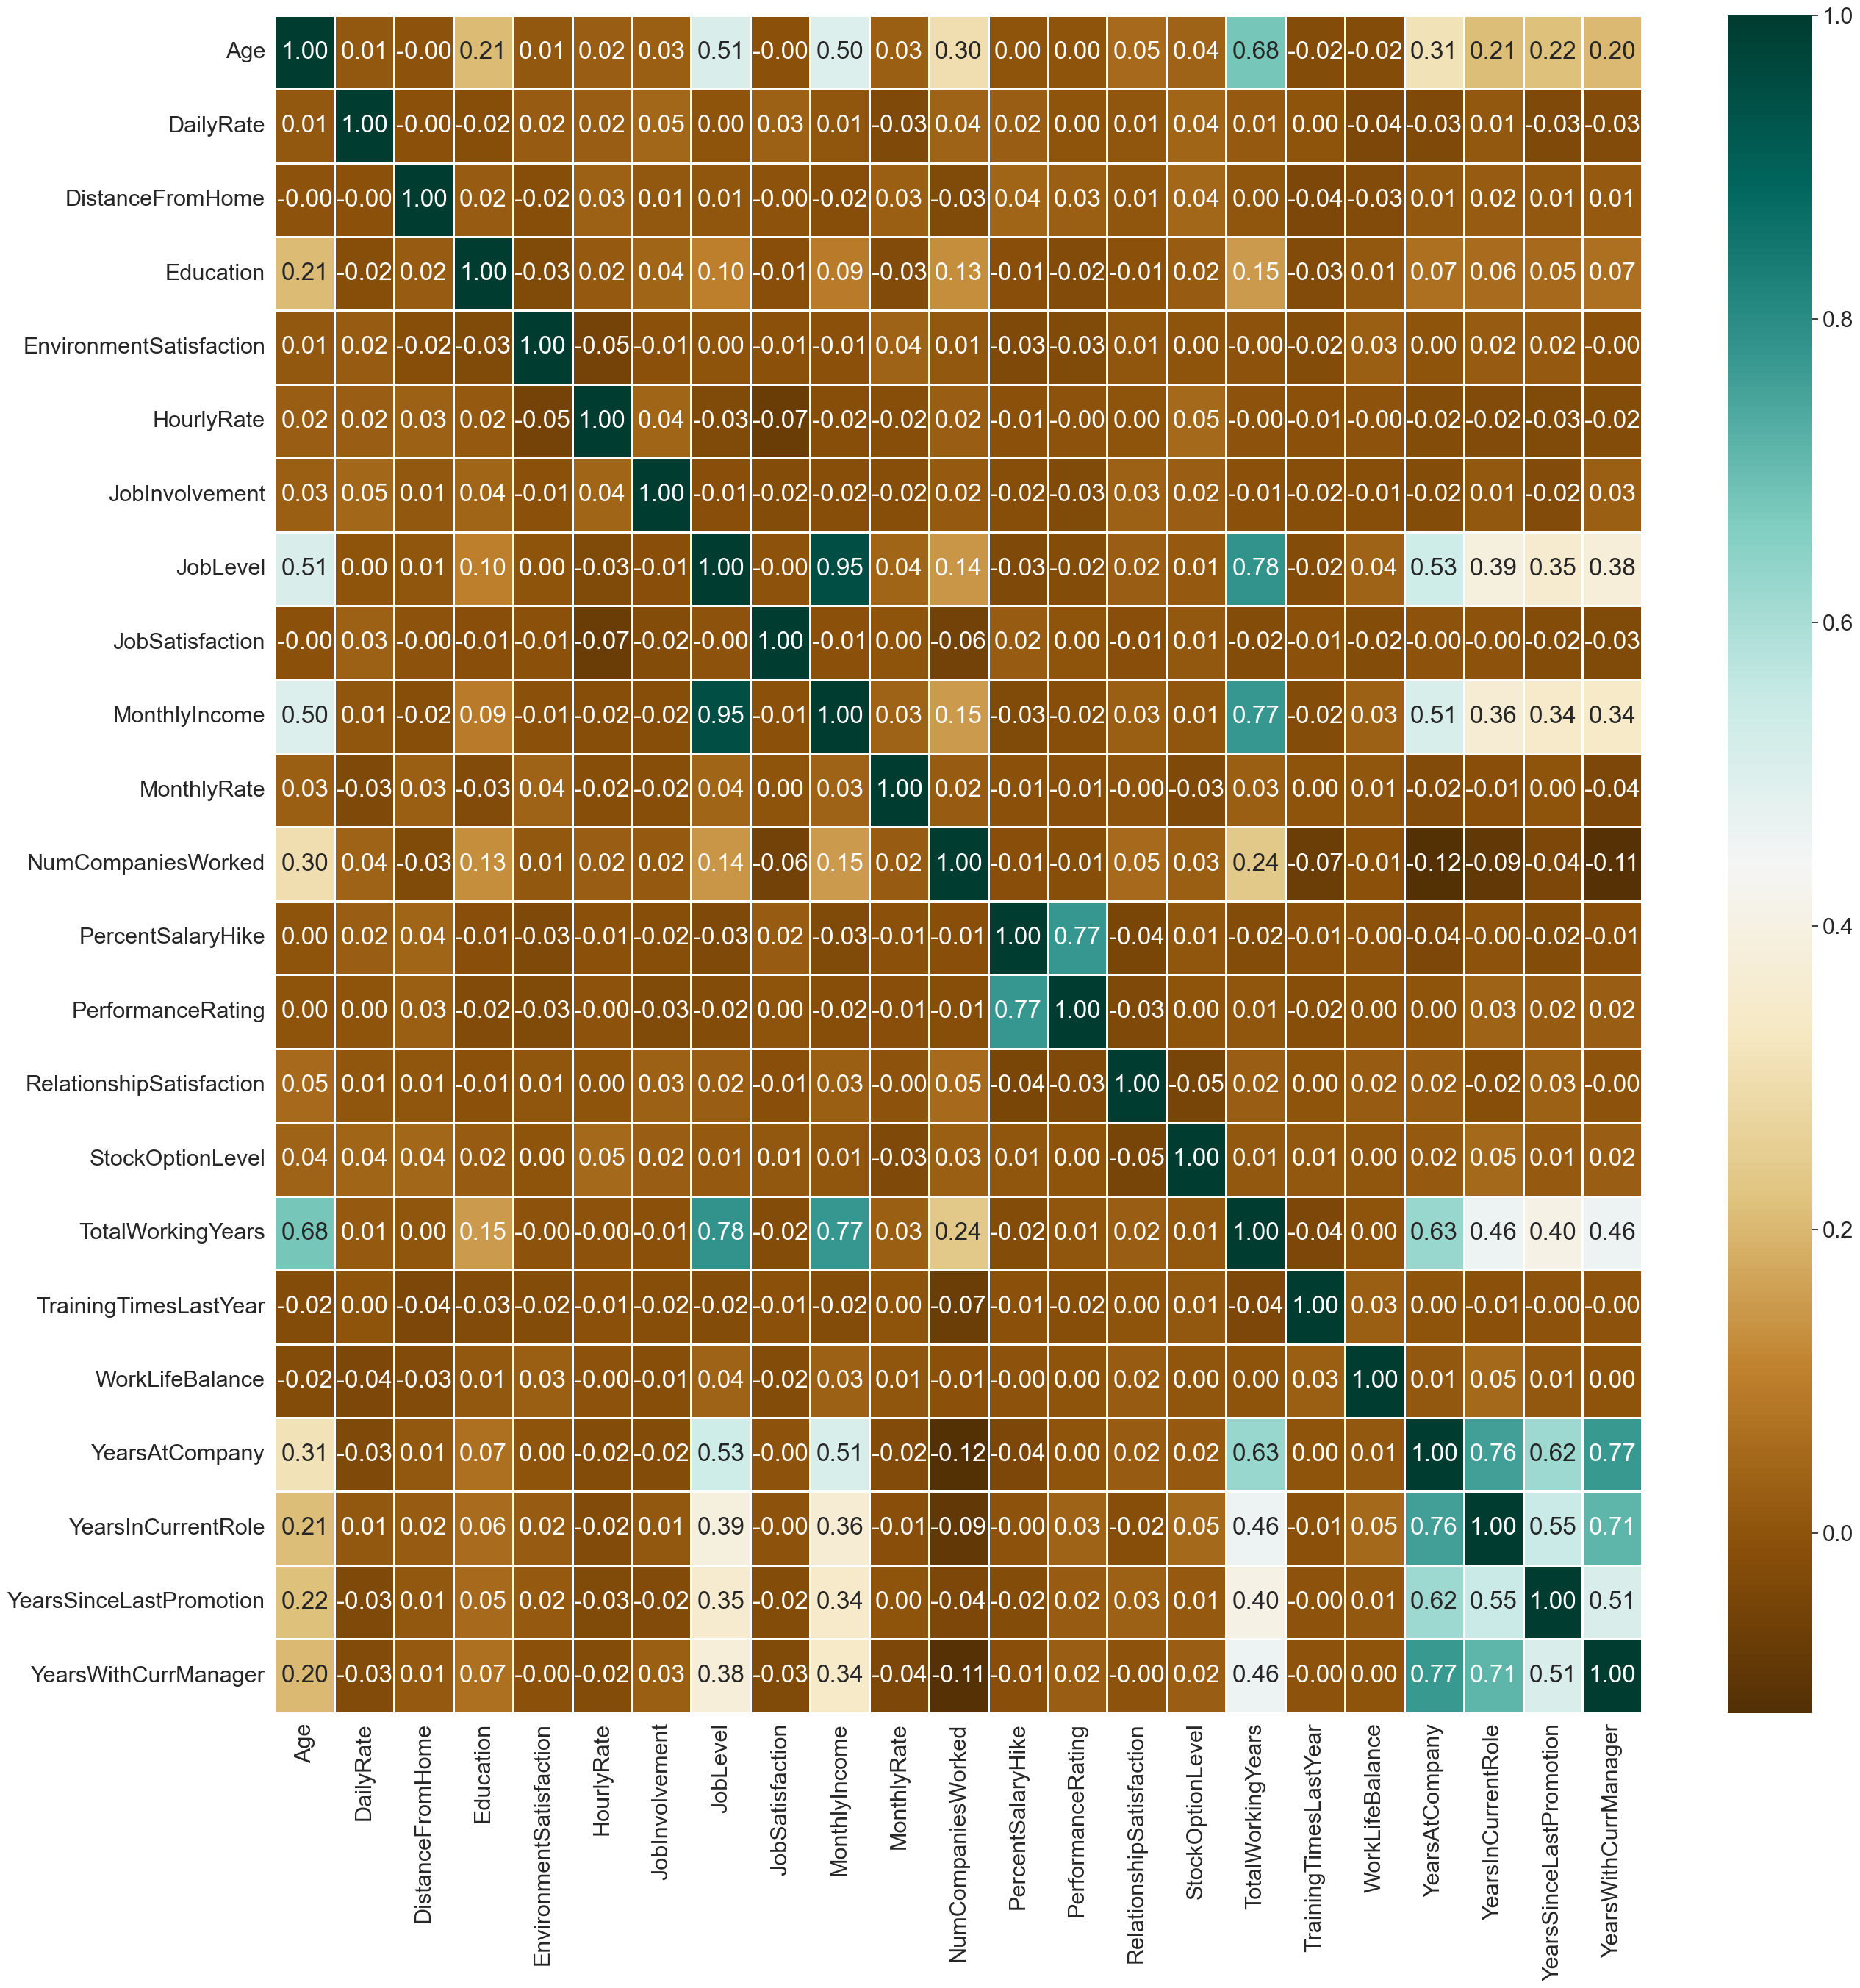

In [67]:
# Plotting the heatmap
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

**Insights**:
    
**Age Related Insights:**
Age has a moderate positive correlation with JobLevel (0.51), TotalWorkingYears (0.68), YearsAtCompany (0.31), YearsInCurrentRole (0.21), YearsSinceLastPromotion (0.22), and YearsWithCurrManager (0.20).
This suggests that older employees tend to have higher job levels and more experience in their current role, company, and with their current manager.

**Job Related Insights:**
JobLevel shows a strong positive correlation with TotalWorkingYears (0.78) and moderate positive correlations with MonthlyIncome (0.95), YearsAtCompany (0.54), and YearsWithCurrManager (0.37).
This indicates that employees with higher job levels tend to have more experience, higher incomes, longer tenure at the company, and longer relationships with their current manager.

**Salary Related Insights:**
MonthlyIncome shows strong positive correlations with JobLevel (0.95) and TotalWorkingYears (0.77).
This implies that employees with higher job levels and more experience tend to have higher monthly incomes.

**Tenure Related Insights:**
TotalWorkingYears has a strong positive correlation with JobLevel (0.78), MonthlyIncome (0.77), and YearsAtCompany (0.68).
This suggests that employees with longer tenure typically achieve higher job levels, earn higher incomes, and stay longer with the company.

**Performance Related Insights:**
PercentSalaryHike and PerformanceRating have a positive correlation (0.77), indicating that employees who receive higher salary hikes tend to have better performance ratings.

**Work-Life Balance Insights:**
WorkLifeBalance has a small positive correlation with YearsAtCompany (0.02) and YearsInCurrentRole (0.05).
This suggests that employees who have been with the company for longer or have been in their current role for longer tend to report slightly better work-life balance.

**Job Satisfaction Insights:**
JobSatisfaction has a small positive correlation with JobLevel (0.02) and a small negative correlation with RelationshipSatisfaction (-0.01).
This indicates a weak association between job satisfaction and job level, and a slightly negative association with relationship satisfaction.

In [68]:
# Target Variable (Attrition)
df['Attrition'] = df['Attrition'].replace({'No':0, 'Yes':1})

In [69]:
df.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

<br/>
<font color = "brown" size = 5>Model Building </font>

In [70]:
# creating Dependant and independant variables

x = df.drop(['Attrition'], axis=1)  # independent variable
y = df[['Attrition']]  # dependent variable

print(x.head())
print(y.head())

   Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61 

In [71]:
print(x.shape)
print(y.shape)

(2940, 30)
(2940, 1)


<font color = "blue" size = 4>Creating dummies for object columns </font>

Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly

In [72]:
df.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [73]:
#making dummies for those columns which having descrete values
x = pd.get_dummies(x, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first = True)
x.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   
3                        3                     0   
4                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0  

In [74]:
#Balancing Target Class using SMOTEENN
from imblearn.combine import SMOTEENN

In [75]:
smoteenn = SMOTEENN()
x_resampled, y_resampled = smoteenn.fit_resample(x, y)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

<font color = "blue" size = 4>Logistics Regression </font>

In [77]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["Attriton_Yes", "Attrition_No"],
                         columns=["Attrtion_Yes", "Attrtion_No"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [79]:
y_train = pd.DataFrame(y_train, columns=['Attrition'])
y_train

Attrition
4097          1
3165          1
2499          1
3345          1
3596          1
...         ...
3444          1
466           0
3092          1
3772          1
860           0

[2968 rows x 1 columns]

In [80]:
y_test = pd.DataFrame(y_test, columns=['Attrition'])
y_test

Attrition
1350          0
1434          0
2500          1
1128          0
4144          1
...         ...
1859          0
3164          1
610           0
570           0
343           0

[1272 rows x 1 columns]

<font color = "blue" size = 4>Fitting the Linear Model </font>

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

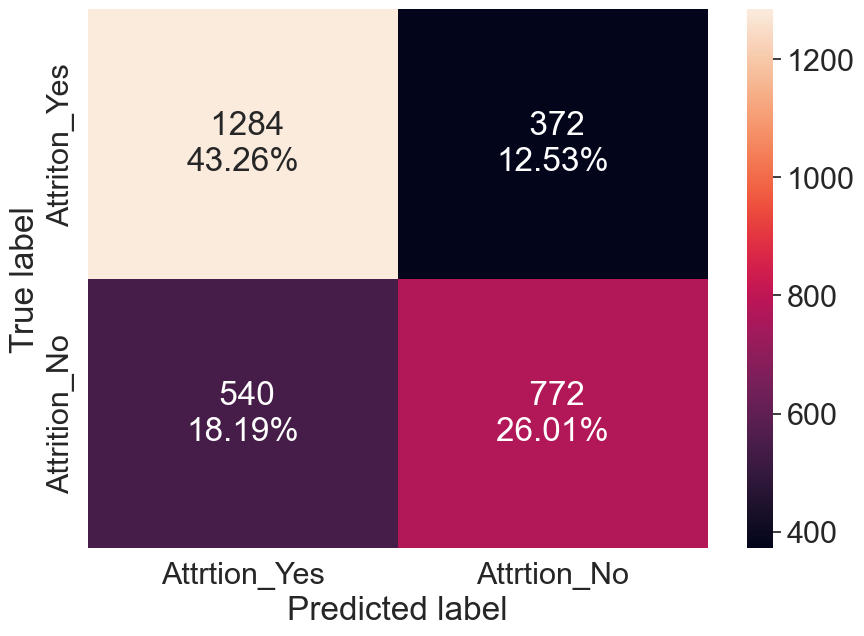

In [82]:
pred_train = logreg.predict(x_train)
make_confusion_matrix(y_train, pred_train)

In [83]:
pred_train = pd.DataFrame(pred_train, columns=['Predicted'])

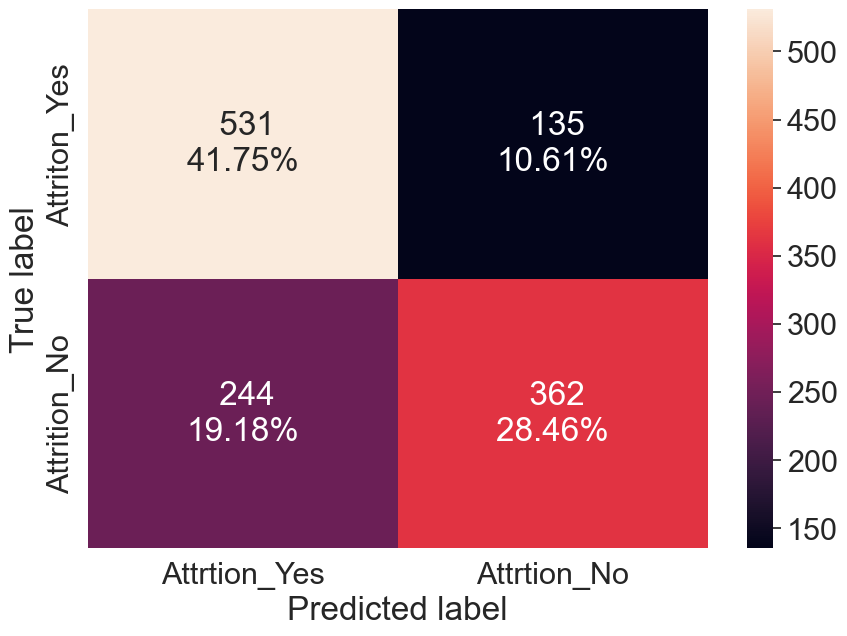

In [84]:
pred_test = logreg.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [85]:
pred_test = pd.DataFrame(pred_test, columns=['Predicted'])

In [86]:
print('Accuracy on train data:', accuracy_score(y_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.692722371967655
Accuracy on test data: 0.7020440251572327


Recall on train data: 0.7753623188405797
Recall on test data: 0.7972972972972973


Precision on train data: 0.7039473684210527
Precision on test data: 0.6851612903225807


f1 score on train data: 0.7379310344827587
f1 score on test data: 0.7369882026370577


<font color = "blue" size = 4>Plot ROC-AUC curve and see the results </font>

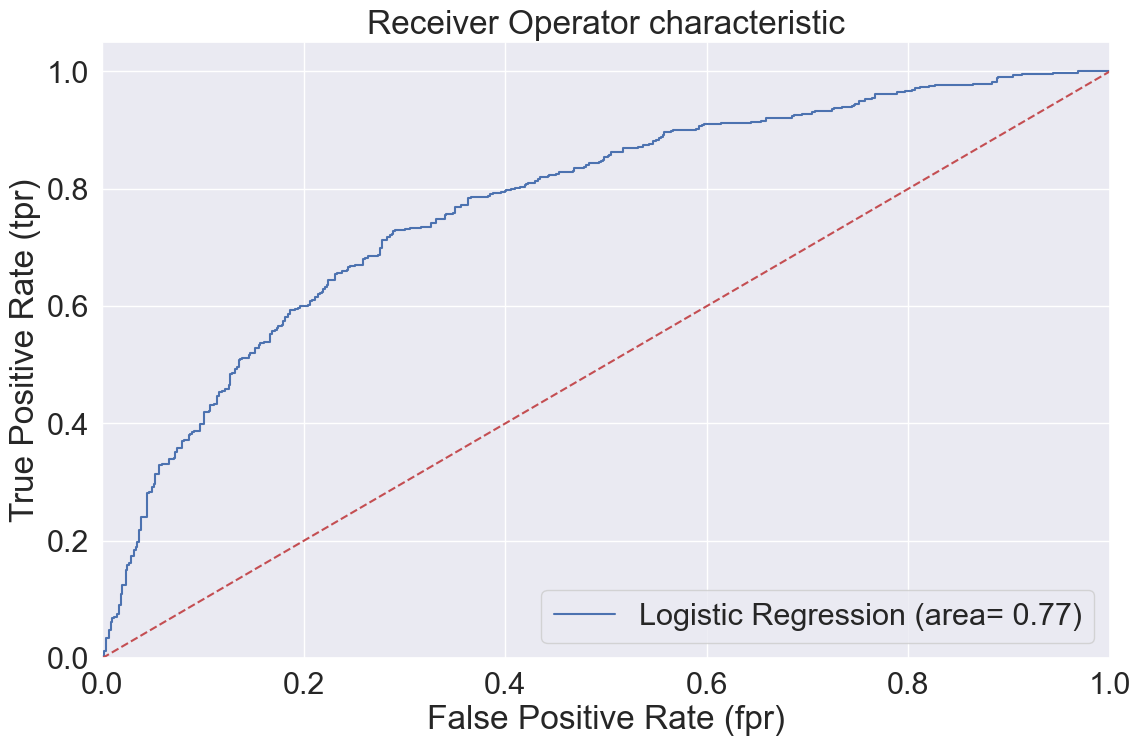

In [87]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<font color = "blue" size = 4>Optimal Cutoff </font>

In [88]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.74176201, 0.7708492 , 0.80802001, ..., 0.42680712, 0.62433587,
       0.37692181])

In [89]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Attrition == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Attrition == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Attrition == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Attrition == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)


We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [90]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [91]:
cutoff_data.head()

Cutoff_Prob       TP    FN     TN       FP        P        N    Sn    Sp  \
0        0.000 1656.000 0.000  0.000 1312.000 1656.000 1312.000 1.000 0.000   
1        0.010 1656.000 0.000  0.000 1312.000 1656.000 1312.000 1.000 0.000   
2        0.020 1656.000 0.000  8.000 1304.000 1656.000 1312.000 1.000 0.006   
3        0.030 1656.000 0.000 18.000 1294.000 1656.000 1312.000 1.000 0.014   
4        0.040 1656.000 0.000 27.000 1285.000 1656.000 1312.000 1.000 0.021   

   Dist    KS    Re    Pr   tpr   fpr    f1  
0 1.000 0.000 1.000 0.558 1.000 1.000 0.716  
1 1.000 0.000 1.000 0.558 1.000 1.000 0.716  
2 0.994 0.006 1.000 0.559 1.000 0.994 0.718  
3 0.986 0.014 1.000 0.561 1.000 0.986 0.719  
4 0.979 0.021 1.000 0.563 1.000 0.979 0.720

# Let us now check for the results for accuracy using different cutoff methods.

<font color = "blue" size = 4>Let us pick up max distance first </font>

In [92]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [93]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.56
The KS cutoff determined is: 0.61
The f1 cutoff determined is: 0.36


In [94]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")

Using the cutoff value as: 0.56
Accuracy on train data: 0.6991239892183289
Accuracy on test data: 0.7130503144654088
Recall on train data: 0.7065217391304348
Recall on test data: 0.7327327327327328
Precision on train data: 0.7419150285351934
Precision on test data: 0.7229629629629629
f1 score on train data: 0.7237859573151871
f1 score on test data: 0.7278150633855333


Using the cutoff value as: 0.61
Accuracy on train data: 0.6940700808625337
Accuracy on test data: 0.7091194968553459
Recall on train data: 0.6419082125603864
Recall on test data: 0.6561561561561562
Precision on train data: 0.7714078374455733
Precision on test data: 0.7560553633217993
f1 score on train data: 0.7007251153592616
f1 score on test data: 0.7025723472668811


Using the cutoff value as: 0.36
Accuracy on train data: 0.6856469002695418
Accuracy on test data: 0.6682389937106918
Recall on train data: 0.9070048309178744
Recall on test data: 0.9084084084084084
Precision on train data: 0.6584831214379658
Precision on t

In [95]:
default=0.5 # default cutoff

In [96]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (logreg.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0   0.500           0.693          0.702         0.775        0.797   
1   0.560           0.699          0.713         0.707        0.733   
2   0.610           0.694          0.709         0.642        0.656   
3   0.360           0.686          0.668         0.907        0.908   

   Precision_train  Precision_test  F1_train  F1_test  
0            0.704           0.685     0.738    0.737  
1            0.742           0.723     0.724    0.728  
2            0.771           0.756     0.701    0.703  
3            0.658           0.626     0.763    0.741

<font color = "blue" size = 4>Decision tree classifier </font>

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9426100628930818
Precision: 0.9328467153284672
Recall: 0.9594594594594594
F1 Score: 0.9459659511472983


To deal with Overfitting, we will use Decision Tree Pre-Pruning and we will use RandomizedSearchCV over GridSearch CV to reduce processing time

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the tree
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=10, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_dt_classifier.predict(x_train)
y_test_pred = best_dt_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
Training Metrics:
Accuracy: 0.8504043126684636
Precision: 0.8655006031363088
Recall: 0.8665458937198067
F1 Score: 0.8660229330114666

Test Metrics:
Accuracy: 0.8011006289308176
Precision: 0.7888111888111888
Recall: 0.8468468468468469
F1 Score: 0.8167994207096307


<font color = "blue" size = 4>Random Forest Classifier </font>

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 7, 15],  # Number of trees in the forest
    'max_depth': np.arange(1, 10),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(x_train)
y_test_pred = best_rf_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8}
Training Metrics:
Accuracy: 0.9730458221024259
Precision: 0.9684898929845422
Recall: 0.9836956521739131
F1 Score: 0.976033553025764

Test Metrics:
Accuracy: 0.9410377358490566
Precision: 0.9239598278335724
Recall: 0.9669669669669669
F1 Score: 0.9449743213499632


<font color = "blue" size = 4>Bagging Classifier </font>

In [100]:
from sklearn.ensemble import BaggingClassifier
# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 1.0],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0]  # Maximum number of features to consider when looking for the best split
}


# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=5, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(x_train)
y_test_pred = best_bagging_classifier.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0}
Training Metrics:
Accuracy: 0.9986522911051213
Precision: 0.998792270531401
Recall: 0.998792270531401
F1 Score: 0.998792270531401

Test Metrics:
Accuracy: 0.9654088050314465
Precision: 0.9614243323442137
Recall: 0.972972972972973
F1 Score: 0.9671641791044775


<font color = "blue" size = 4>AdaBoost Classifier </font>

In [101]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(10, 50, 5),  # Number of boosting stages to be used in the boosting process
    'learning_rate': [1, 0.1, 0.5, 0.01]  # Weight applied to each classifier at each boosting iteration
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_ab_tuned.predict(x_train)
y_test_pred = best_ab_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 10, 'learning_rate': 0.1}
Training Metrics:
Accuracy: 0.7435983827493261
Precision: 0.712791250594389
Recall: 0.9051932367149759
F1 Score: 0.7975525405693004

Test Metrics:
Accuracy: 0.7374213836477987
Precision: 0.6869369369369369
Recall: 0.9159159159159159
F1 Score: 0.7850707850707851


<font color = "blue" size = 4>GradientBoosting Classifier</font>

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameter_grid = {
    'n_estimators': [20, 30, 40],  # Number of boosting stages to be used in the boosting process
    'learning_rate': [0.1, 0.3, 0.5],  # Weight applied to each classifier at each boosting iteration
    'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(x_train)
y_test_pred = best_gb_tuned.predict(x_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Best Parameters: {'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.3}
Training Metrics:
Accuracy: 0.9993261455525606
Precision: 0.999326958404729
Recall: 1.0
F1 Score: 0.9993964996982498

Test Metrics:
Accuracy: 0.9709119496855346
Precision: 0.9712934988844981
Recall: 0.9864864864864865
F1 Score: 0.9726128793486306


<font color = "blue" size = 4>Summary </font>

In [104]:
# Define the performance metrics
performance_metrics = {
    "Algorithm": ["Logistic Regression", "Decision Tree Classifier",
                  "Decision Tree Classifier with Pre-Pruning", "Random Forest Classifier",
                  "Bagging Classifier", "Adaboost Classifier",
                  "Gradient Boost Classifier"],
    "Train Accuracy": [0.6927, 1.0, 0.8504, 0.9730, 0.9986, 0.7435, 0.999],
    "Test Accuracy": [0.7020, 0.9426, 0.8011, 0.9410, 0.9654, 0.7347, 0.9709],
    "Train Recall": [0.7753, 1.0, 0.8665, 0.9836, 0.9987, 0.9051, 1.0],
    "Test Recall": [0.7972, 0.9594, 0.8468, 0.9669, 0.9729, 0.9159, 0.9864],
    "Train Precision": [0.7039, 1.0, 0.8655, 0.9684, 0.9987, 0.7127, 0.9993],
    "Test Precision": [0.6851, 0.9328, 0.7888, 0.9239, 0.9614, 0.6869, 0.9712],
    "Train F1 Score": [0.7379, 1.0, 0.8660, 0.9760, 0.9987, 0.7975, 0.999],
    "Test F1 Score": [0.7369, 0.9459, 0.8167, 0.9449, 0.9671, 0.7850, 0.9726]
}

# Create a DataFrame from the performance metrics dictionary
results = pd.DataFrame(performance_metrics)



# Print the DataFrame
results

Algorithm  Train Accuracy  Test Accuracy  \
0                        Logistic Regression           0.693          0.702   
1                   Decision Tree Classifier           1.000          0.943   
2  Decision Tree Classifier with Pre-Pruning           0.850          0.801   
3                   Random Forest Classifier           0.973          0.941   
4                         Bagging Classifier           0.999          0.965   
5                        Adaboost Classifier           0.744          0.735   
6                  Gradient Boost Classifier           0.999          0.971   

   Train Recall  Test Recall  Train Precision  Test Precision  Train F1 Score  \
0         0.775        0.797            0.704           0.685           0.738   
1         1.000        0.959            1.000           0.933           1.000   
2         0.867        0.847            0.866           0.789           0.866   
3         0.984        0.967            0.968           0.924           0.976   
4         0.999        0.973            0.999           0.961           0.999   
5         0.905        0.916            0.713           0.687           0.797   
6         1.000        0.986            0.999           0.971           0.999   

   Test F1 Score  
0          0.737  
1          0.946  
2          0.817  
3          0.945  
4          0.967  
5          0.785  
6          0.973

<font color = "brown" size = 5>Conclusion </font>

In conclusion, the Decision Tree Classifier with Pre-Pruning, Random Forest Classifier, Bagging Classifier, and Gradient Boost Classifier show the best overall performance, with high accuracy, recall, precision, and F1 score on both the training and test sets. These models are recommended for further evaluation and deployment, considering their strong performance and generalization capabilities.

In [ ]:
# Plot a count plot (bar plot) of the target class 'Attrition'.
fig = plt(figsize=(18,8))
sns.countplot(x=df['Attrition'], data=df, hue='Attrition')
plt.show()